In [1]:
import numpy as np
import random
import numpy.linalg as lia
import pandas as pd
import h5py
import random
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
def loadBGRImage(path):
    image = BGR(cv.imread(path))
    return image

def loadGreyImage(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return image

def BGR(image):
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image

def displayGreyImage(image, imageName):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap = 'gray')
    plt.title(imageName)
    plt.show()

def displayGreyWindows(image, imageName):
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap = 'gray')
    plt.title(imageName)
    plt.show()
    
def displayBGRImage(image, imageName, size):
    plt.figure(figsize=(size, size))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def displayBGRImageLarge(image, imageName):
    plt.figure(figsize=(18, 18))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def imageSideBySide(images, imageNames,size):
    row = np.ceil(len(images)/20)
    fig=plt.figure(figsize=(size, size/2))
    for i, image in enumerate(images):
        fig.add_subplot(row, 20, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(imageNames[i])
    plt.show()

In [3]:
start = 25, 26
size = 14, 12

f = h5py.File('MNIST_synthetic.h5', 'r')

list(f.keys())

['test_dataset', 'train_dataset', 'train_labels']

In [4]:
train_dataset = np.squeeze(np.array(f["train_dataset"])).copy()
train_labels = np.squeeze(np.array(f["train_labels"])).copy()
test_dataset = np.squeeze(np.array(f["test_dataset"])).copy()

singulars_digits = []
singulars_labels = []

doubles_digits = []
doubles_labels = []

triples_digits = []
triples_labels = []

quadruples_digits = []
quadruples_labels = []

quintuples_digits = []
quintuples_labels = []


for i, labels in enumerate(train_labels):
    if labels[1] == 10:
        singulars_digits.append(train_dataset[i])
        singulars_labels.append(train_labels[i])
        
    if labels[1] != 10 and labels[2] == 10:
        doubles_digits.append(train_dataset[i])
        doubles_labels.append(train_labels[i])
        
    if labels[2] != 10 and labels[3] == 10:
        triples_digits.append(train_dataset[i])
        triples_labels.append(train_labels[i])
        
    if labels[3] != 10 and labels[4] == 10:
        quadruples_digits.append(train_dataset[i])
        quadruples_labels.append(train_labels[i])
        
    if labels[4] != 10:
        quintuples_digits.append(train_dataset[i])
        quintuples_labels.append(train_labels[i])

In [5]:
singulars_digits = np.array(singulars_digits)     
doubles_digits = np.array(doubles_digits)  
triples_digits = np.array(triples_digits)    
quadruples_digits = np.array(quadruples_digits)    
quintuples_digits = np.array(quintuples_digits)    

singulars_labels = np.array(singulars_labels).T[0]
doubles_labels = np.array(doubles_labels).T[0:2].T
triples_label = np.array(triples_labels).T[0:3].T
quadruples_label = np.array(quadruples_labels).T[0:4].T
quintuples_label = np.array(quintuples_labels).T[0:5].T

In [6]:
final_singulars_dataset = []
final_singulars_labels = list(singulars_labels)
for i, digit in enumerate(singulars_digits):
    final_singulars_dataset.append(digit[26:38,26:38])
    
final_doubles_dataset = []
final_doubles_labels = []
for i, digit in enumerate(doubles_digits):
    final_doubles_dataset.append(digit[26:38,20:32])
    final_doubles_dataset.append(digit[26:38,32:44])
    final_doubles_labels.append(doubles_labels[i][0])
    final_doubles_labels.append(doubles_labels[i][1])

final_triples_dataset = []
final_triples_labels = []
for i, digit in enumerate(triples_digits):
    final_triples_dataset.append(digit[26:38,14:26])
    final_triples_dataset.append(digit[26:38,26:38])
    final_triples_dataset.append(digit[26:38,38:50])
    final_triples_labels.append(triples_labels[i][0])
    final_triples_labels.append(triples_labels[i][1])
    final_triples_labels.append(triples_labels[i][2])
    
final_quadruples_dataset = []
final_quadruples_labels = []
for i, digit in enumerate(quadruples_digits):
    final_quadruples_dataset.append(digit[26:38,8:20])
    final_quadruples_dataset.append(digit[26:38,20:32])
    final_quadruples_dataset.append(digit[26:38,32:44])
    final_quadruples_dataset.append(digit[26:38,44:56])
    final_quadruples_labels.append(quadruples_labels[i][0])
    final_quadruples_labels.append(quadruples_labels[i][1])    
    final_quadruples_labels.append(quadruples_labels[i][2])
    final_quadruples_labels.append(quadruples_labels[i][3]) 
    
final_quintuples_dataset = []
final_quintuples_labels = []
for i, digit in enumerate(quintuples_digits):
    final_quintuples_dataset.append(digit[26:38,2:14])
    final_quintuples_dataset.append(digit[26:38,14:26])
    final_quintuples_dataset.append(digit[26:38,26:38])
    final_quintuples_dataset.append(digit[26:38,38:50])
    final_quintuples_dataset.append(digit[26:38,50:62])
    final_quintuples_labels.append(quintuples_labels[i][0])
    final_quintuples_labels.append(quintuples_labels[i][1])
    final_quintuples_labels.append(quintuples_labels[i][2])
    final_quintuples_labels.append(quintuples_labels[i][3])
    final_quintuples_labels.append(quintuples_labels[i][4])

In [7]:
merged_dataset = final_singulars_dataset + final_doubles_dataset + final_triples_dataset + final_quadruples_dataset + final_quintuples_dataset
merged_labels = final_singulars_labels + final_doubles_labels + final_triples_labels + final_quadruples_labels + final_quintuples_labels

In [8]:
count = 0

for digit in range(10):
    digit_count = list(merged_labels).count(digit)
    print(f"number of {digit}'s in train dataset: {digit_count}")
    count += digit_count

print("total number of digits in train dataset:", count)

number of 0's in train dataset: 16379
number of 1's in train dataset: 18819
number of 2's in train dataset: 17095
number of 3's in train dataset: 17220
number of 4's in train dataset: 16393
number of 5's in train dataset: 15275
number of 6's in train dataset: 16401
number of 7's in train dataset: 17611
number of 8's in train dataset: 16175
number of 9's in train dataset: 16518
total number of digits in train dataset: 167886


In [9]:
digitsTrainingSetSize = int(np.ceil(0.8 * len(merged_dataset)))
digitsValidationSetSize = int(len(merged_labels) - digitsTrainingSetSize)

xValidationSet = []
yValidationSet = []

for index, digit in enumerate(merged_dataset[0:digitsValidationSetSize]):
    xValidationSet.append(digit)
    yValidationSet.append(merged_labels[index])

xTrainingSet = []
yTrainingSet = []

start = len(xValidationSet)

for i, digit in enumerate(merged_dataset[start:]):
    xTrainingSet.append(digit)
    yTrainingSet.append(merged_labels[i+start])

## Finding all digits in an image

In [10]:
def find_digits(train_dataset, size):
    thresh_train_dataset = train_dataset.copy()
    thresh_train_dataset[thresh_train_dataset>30] = 255
    thresh_train_dataset[thresh_train_dataset!=255] = 0
    i,j = np.where(thresh_train_dataset[:,:]!=0)
    #print(i)
    bottom_bound = np.min(i)
    top_bound = np.max(i)
    left_bound = np.min(j)
    right_bound = np.max(j)
    #print(top_bound, bottom_bound)

    h = top_bound-bottom_bound
    w = right_bound-left_bound

    bounded_train_dataset = train_dataset[bottom_bound-1:top_bound+2,left_bound-1:right_bound+2]
    thresh = bounded_train_dataset.copy()
    thresh[thresh>30] = 255
    thresh[thresh!=255] = 0
    #ret, thresh = cv2.threshold(bounded_train_dataset, 30, 255, 0)
    #seg = np.where(np.any(thresh, axis=0)==0)
    seg = np.where(np.any(thresh, axis=0)==0)

    #print(seg)
    seg_list = np.asarray(seg)
    seg_list = seg_list[0]
    #print(seg_list)
    from statistics import stdev

    if len(seg_list)>2:
        # create a list of the gaps between the consecutive values
        gaps = [y - x for x, y in zip(seg_list[:-1], seg_list[1:])]
        # have python calculate the standard deviation for the gaps
        sd = stdev(gaps)

        # create a list of lists, put the first value of the source data in the first
        lists = [[seg_list[0]]]
        for x in seg_list[1:]:
            # if the gap from the current item to the previous is more than 1 SD
            # Note: the previous item is the last item in the last list
            # Note: the '> 1' is the part you'd modify to make it stricter or more relaxed
            if (x - lists[-1][-1]) / (sd+1e-18) > 0.8:
                # then start a new list
                lists.append([])
            # add the current item to the last list in the list
            lists[-1].append(x)

        splits = np.asarray([np.ceil(np.mean(lists[i])) for i in range(len(lists))]).astype(int)

    else:
        splits = np.asarray(seg_list)
    #print(splits)

    n_digits = len(splits)-1
    #digits = np.zeros(n_digits, )
    digits = []
    for i in range(n_digits):
        temp = bounded_train_dataset[:,splits[i]:splits[i+1]]
        # if temp is less than recommeded size first pad on left and then on both sides
        temp_padded = temp.copy()
        if (temp.shape[0] != size) or  (temp.shape[1] != size):
            diff_y = size-temp.shape[0]
            split_diff_y = diff_y//2
            remainder_diff_y = diff_y%2
            diff_x = size-temp.shape[1]
            split_diff_x = diff_x//2
            remainder_diff_x = diff_x%2
#             print(diff_y)
#             print(split_diff_y)
            temp_padded = np.pad(temp, ((split_diff_y+remainder_diff_y,split_diff_y),(split_diff_x+remainder_diff_x,split_diff_x)))

        digits.append(temp_padded)
    return digits, n_digits

In [11]:
wrong = 0 
wrong_arr = []
wrong_arr_index = []
correct = []

for i, sample in enumerate(train_dataset):
    snips, n_dig = find_digits(sample, 25)
    real_num_digits = 5 - list(train_labels[i]).count(10)

    if(n_dig != real_num_digits):
        print("incorrect at index:", i)
        wrong += 1
        wrong_arr.append(snips)
        wrong_arr_index.append(i)  

print("total percentage incorrect:", wrong / len(train_dataset) * 100, "%")

incorrect at index: 367
incorrect at index: 1351
incorrect at index: 1606
incorrect at index: 2684
incorrect at index: 3172
incorrect at index: 3771
incorrect at index: 3838
incorrect at index: 3883
incorrect at index: 4011
incorrect at index: 4447
incorrect at index: 4639
incorrect at index: 4747
incorrect at index: 5419
incorrect at index: 5442
incorrect at index: 5772
incorrect at index: 5930
incorrect at index: 7118
incorrect at index: 7981
incorrect at index: 8652
incorrect at index: 8860
incorrect at index: 8941
incorrect at index: 9038
incorrect at index: 9176
incorrect at index: 9419
incorrect at index: 10702
incorrect at index: 11622
incorrect at index: 11810
incorrect at index: 12806
incorrect at index: 13280
incorrect at index: 13360
incorrect at index: 13514
incorrect at index: 14150
incorrect at index: 14931
incorrect at index: 15844
incorrect at index: 16366
incorrect at index: 16909
incorrect at index: 17030
incorrect at index: 17540
incorrect at index: 17573
incorrect a

In [12]:
num_test_digits = 0

for i, sample in enumerate(test_dataset):
    images, n_digits = find_digits(sample, 25)
   
    num_test_digits += n_digits

divs = []

for div in range(1, 100):
    if(num_test_digits % (div) == 0):
        divs.append(div)

batch_size = divs[-1]
print(batch_size)

79


# CNN

In [13]:
def create_batches(input_array, label_array, batch_size):
    batched = []
    label_batched = []
    
    for i in range(np.floor(len(input_array)/batch_size).astype(int)):
        batched.append(np.expand_dims((np.array(input_array[i*batch_size:i*batch_size+batch_size])).astype(np.single),axis=1))
        label_batched.append(label_array[i*batch_size:i*batch_size+batch_size])
        
    return np.array(batched), label_batched

In [14]:
class Net(nn.Module):
    def __init__(self, h_layers):
        self.num_layers = len(h_layers)
        self.h_layers = h_layers      
        self.convs = []
        
        super(Net, self).__init__()
        
        for i, n in enumerate(self.h_layers):
            if i == 0:
                self.convs.append(nn.Conv2d(1, n, 3))
            else:
                self.convs.append(nn.Conv2d(self.h_layers[i-1], n, 3))

        self.fc1 = nn.Linear(self.h_layers[-1]**2 , 10)

    def forward(self, x):
        for i in range(len(self.h_layers)):
            x = F.relu(self.convs[i](x))
            
        x = x.view(-1, self.h_layers[-1]**2)
        x = self.fc1(x)
        return x

# Train CNN for hyper-parameter testing

In [15]:
training_dataset_batch, training_labels_batch = create_batches(xTrainingSet, yTrainingSet, batch_size)
validation_dataset_batch, validation_labels_batch = create_batches(xValidationSet, yValidationSet, batch_size)

# model hyper-parameters
h_layers = ([batch_size, 64])
max_iters = 10
learning_rate = 0.01
momentum = 0.9

# train neural network
net = Net(h_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(max_iters):
    running_loss = 0.0
    
    for i, data in enumerate(training_dataset_batch):
        inputs = torch.from_numpy(data)
        labels = training_labels_batch[i] 
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, torch.from_numpy(np.array(labels).astype(np.longlong)))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

# test validation set on model
correct = 0
total = 0

with torch.no_grad():
    for i, data in enumerate(validation_dataset_batch):
        images = torch.from_numpy(data)
        labels = validation_labels_batch[i]
        labels = torch.from_numpy(np.array(labels).astype(np.longlong))
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (int(predicted[0]) != int(labels[0])):
            None

print(f"validation set accuracy ({total} samples): {(100 * correct / total)}")

[1,    20] loss: 3527.276
[1,    40] loss: 849.009
[1,    60] loss: 366.184
[1,    80] loss: 398.176
[1,   100] loss: 299.293
[1,   120] loss: 283.480
[1,   140] loss: 283.540
[1,   160] loss: 260.763
[1,   180] loss: 171.969
[1,   200] loss: 171.885
[1,   220] loss: 184.848
[1,   240] loss: 223.991
[1,   260] loss: 236.888
[1,   280] loss: 165.505
[1,   300] loss: 113.246
[1,   320] loss: 134.161
[1,   340] loss: 162.982
[1,   360] loss: 133.277
[1,   380] loss: 111.074
[1,   400] loss: 123.774
[1,   420] loss: 95.233
[1,   440] loss: 109.029
[1,   460] loss: 108.010
[1,   480] loss: 119.047
[1,   500] loss: 94.919
[1,   520] loss: 93.147
[1,   540] loss: 96.123
[1,   560] loss: 120.290
[1,   580] loss: 109.633
[1,   600] loss: 90.695
[1,   620] loss: 102.864
[1,   640] loss: 105.465
[1,   660] loss: 133.195
[1,   680] loss: 97.335
[1,   700] loss: 103.617
[1,   720] loss: 99.955
[1,   740] loss: 88.433
[1,   760] loss: 73.136
[1,   780] loss: 70.111
[1,   800] loss: 69.476
[1,   820]

[5,    40] loss: 30.401
[5,    60] loss: 20.797
[5,    80] loss: 26.115
[5,   100] loss: 27.487
[5,   120] loss: 20.753
[5,   140] loss: 29.070
[5,   160] loss: 32.613
[5,   180] loss: 20.931
[5,   200] loss: 19.956
[5,   220] loss: 27.908
[5,   240] loss: 19.938
[5,   260] loss: 19.918
[5,   280] loss: 15.714
[5,   300] loss: 13.222
[5,   320] loss: 17.687
[5,   340] loss: 32.035
[5,   360] loss: 39.453
[5,   380] loss: 21.793
[5,   400] loss: 19.441
[5,   420] loss: 17.474
[5,   440] loss: 25.420
[5,   460] loss: 25.824
[5,   480] loss: 29.572
[5,   500] loss: 32.947
[5,   520] loss: 23.083
[5,   540] loss: 43.555
[5,   560] loss: 25.884
[5,   580] loss: 47.940
[5,   600] loss: 44.502
[5,   620] loss: 31.781
[5,   640] loss: 35.665
[5,   660] loss: 32.461
[5,   680] loss: 25.377
[5,   700] loss: 38.131
[5,   720] loss: 27.242
[5,   740] loss: 29.241
[5,   760] loss: 31.924
[5,   780] loss: 31.110
[5,   800] loss: 20.303
[5,   820] loss: 11.929
[5,   840] loss: 14.167
[5,   860] loss:

[9,    80] loss: 27.348
[9,   100] loss: 18.717
[9,   120] loss: 10.166
[9,   140] loss: 26.118
[9,   160] loss: 36.459
[9,   180] loss: 39.553
[9,   200] loss: 16.560
[9,   220] loss: 18.296
[9,   240] loss: 13.375
[9,   260] loss: 23.826
[9,   280] loss: 19.262
[9,   300] loss: 13.252
[9,   320] loss: 14.880
[9,   340] loss: 15.806
[9,   360] loss: 19.497
[9,   380] loss: 15.224
[9,   400] loss: 18.041
[9,   420] loss: 10.726
[9,   440] loss: 17.769
[9,   460] loss: 22.142
[9,   480] loss: 22.354
[9,   500] loss: 21.170
[9,   520] loss: 18.338
[9,   540] loss: 23.650
[9,   560] loss: 17.518
[9,   580] loss: 19.640
[9,   600] loss: 18.260
[9,   620] loss: 17.528
[9,   640] loss: 16.747
[9,   660] loss: 16.210
[9,   680] loss: 11.537
[9,   700] loss: 13.904
[9,   720] loss: 16.380
[9,   740] loss: 20.860
[9,   760] loss: 13.815
[9,   780] loss: 10.161
[9,   800] loss: 16.382
[9,   820] loss: 7.839
[9,   840] loss: 16.553
[9,   860] loss: 13.962
[9,   880] loss: 15.361
[9,   900] loss: 

# Train CNN to predict unseen dataset

In [16]:
full_dataset = xTrainingSet + xValidationSet
full_labels = yTrainingSet + yValidationSet

full_dataset_batch, full_labels_batch = create_batches(full_dataset, full_labels, batch_size)

net = Net(h_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(max_iters):
    running_loss = 0.0
    
    for i, data in enumerate(full_dataset_batch):
        inputs = torch.from_numpy(data)
        labels = full_labels_batch[i] 
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, torch.from_numpy(np.array(labels).astype(np.longlong)))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

[1,    20] loss: 2101.712
[1,    40] loss: 557.208
[1,    60] loss: 252.346
[1,    80] loss: 259.004
[1,   100] loss: 179.281
[1,   120] loss: 171.590
[1,   140] loss: 173.138
[1,   160] loss: 149.001
[1,   180] loss: 95.545
[1,   200] loss: 90.589
[1,   220] loss: 133.085
[1,   240] loss: 141.493
[1,   260] loss: 145.906
[1,   280] loss: 102.473
[1,   300] loss: 55.910
[1,   320] loss: 66.946
[1,   340] loss: 90.277
[1,   360] loss: 71.361
[1,   380] loss: 59.213
[1,   400] loss: 63.115
[1,   420] loss: 52.525
[1,   440] loss: 60.898
[1,   460] loss: 54.935
[1,   480] loss: 72.950
[1,   500] loss: 65.337
[1,   520] loss: 48.949
[1,   540] loss: 61.245
[1,   560] loss: 70.819
[1,   580] loss: 67.311
[1,   600] loss: 54.171
[1,   620] loss: 50.517
[1,   640] loss: 53.055
[1,   660] loss: 64.057
[1,   680] loss: 54.610
[1,   700] loss: 78.027
[1,   720] loss: 67.805
[1,   740] loss: 50.552
[1,   760] loss: 50.400
[1,   780] loss: 49.861
[1,   800] loss: 51.857
[1,   820] loss: 51.276
[1,

[4,   500] loss: 23.338
[4,   520] loss: 20.097
[4,   540] loss: 26.022
[4,   560] loss: 17.726
[4,   580] loss: 30.538
[4,   600] loss: 15.933
[4,   620] loss: 10.362
[4,   640] loss: 13.954
[4,   660] loss: 11.600
[4,   680] loss: 12.021
[4,   700] loss: 18.405
[4,   720] loss: 14.055
[4,   740] loss: 12.242
[4,   760] loss: 9.213
[4,   780] loss: 15.162
[4,   800] loss: 12.346
[4,   820] loss: 12.668
[4,   840] loss: 10.845
[4,   860] loss: 8.884
[4,   880] loss: 9.392
[4,   900] loss: 11.589
[4,   920] loss: 17.177
[4,   940] loss: 11.237
[4,   960] loss: 10.100
[4,   980] loss: 8.285
[4,  1000] loss: 12.740
[4,  1020] loss: 12.717
[4,  1040] loss: 15.217
[4,  1060] loss: 12.592
[4,  1080] loss: 18.494
[4,  1100] loss: 15.667
[4,  1120] loss: 10.939
[4,  1140] loss: 8.347
[4,  1160] loss: 13.453
[4,  1180] loss: 13.410
[4,  1200] loss: 8.415
[4,  1220] loss: 11.094
[4,  1240] loss: 8.328
[4,  1260] loss: 16.107
[4,  1280] loss: 12.084
[4,  1300] loss: 14.422
[4,  1320] loss: 9.817


[7,  1080] loss: 18.272
[7,  1100] loss: 7.384
[7,  1120] loss: 7.272
[7,  1140] loss: 10.245
[7,  1160] loss: 11.246
[7,  1180] loss: 16.285
[7,  1200] loss: 6.627
[7,  1220] loss: 7.111
[7,  1240] loss: 7.351
[7,  1260] loss: 10.862
[7,  1280] loss: 6.513
[7,  1300] loss: 6.389
[7,  1320] loss: 4.726
[7,  1340] loss: 4.573
[7,  1360] loss: 8.765
[7,  1380] loss: 12.112
[7,  1400] loss: 16.238
[7,  1420] loss: 9.801
[7,  1440] loss: 7.625
[7,  1460] loss: 7.760
[7,  1480] loss: 12.235
[7,  1500] loss: 7.728
[7,  1520] loss: 8.864
[7,  1540] loss: 15.040
[7,  1560] loss: 9.956
[7,  1580] loss: 2.632
[7,  1600] loss: 6.751
[7,  1620] loss: 11.907
[7,  1640] loss: 11.165
[7,  1660] loss: 13.618
[7,  1680] loss: 8.348
[7,  1700] loss: 9.307
[7,  1720] loss: 9.115
[7,  1740] loss: 10.211
[7,  1760] loss: 5.655
[7,  1780] loss: 5.876
[7,  1800] loss: 7.929
[7,  1820] loss: 5.572
[7,  1840] loss: 13.053
[7,  1860] loss: 6.335
[7,  1880] loss: 7.995
[7,  1900] loss: 9.118
[7,  1920] loss: 12.

[10,  1720] loss: 7.198
[10,  1740] loss: 9.458
[10,  1760] loss: 4.981
[10,  1780] loss: 3.160
[10,  1800] loss: 5.369
[10,  1820] loss: 2.794
[10,  1840] loss: 9.340
[10,  1860] loss: 5.873
[10,  1880] loss: 5.992
[10,  1900] loss: 4.912
[10,  1920] loss: 8.383
[10,  1940] loss: 5.266
[10,  1960] loss: 8.499
[10,  1980] loss: 7.350
[10,  2000] loss: 5.115
[10,  2020] loss: 5.419
[10,  2040] loss: 4.929
[10,  2060] loss: 8.432
[10,  2080] loss: 4.523
[10,  2100] loss: 4.500
[10,  2120] loss: 8.052


# Predict unseen dataset

In [17]:
separated_digits = []

for i, sample in enumerate(test_dataset):
    digits = []
    
    images, n_digits = find_digits(sample, 25)
   
    for i, image in enumerate(images):
        modified_image = image[7:19,7:19]
        digits.append(modified_image)
        
    separated_digits.append(digits)
    
results = []

for i in range(len(test_dataset)):
    results.append([])

row = 0
col = 0
    
for i in range(int(num_test_digits / batch_size)):
    batch = []
    source = []
    count = 0
    
    while count < batch_size:
        batch.append(separated_digits[row][col])
        source.append((row, col))
        
        if(col < len(separated_digits[row]) - 1):
            col += 1
        else:
            row += 1
            col = 0
        
        count += 1
        
    batch = np.expand_dims(np.asarray(batch).astype(np.single), axis=1) 
    batch = torch.from_numpy(batch)
    
    output = net(batch)
    _, predicted = torch.max(output.data, 1)
    
    for j, pred in enumerate(predicted):
        coord = source[j]
        results[coord[0]].append(pred.item())
        
for r in results:
    pad = 5 - len(r)
    
    for i in range(pad):
        r.append(10)

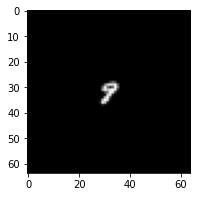

[8, 10, 10, 10, 10]


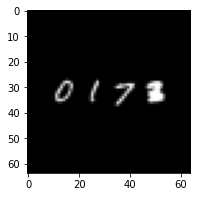

[2, 1, 7, 3, 10]


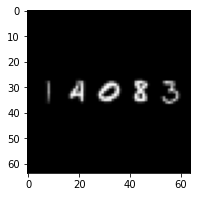

[4, 0, 8, 3, 10]


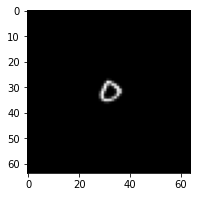

[0, 10, 10, 10, 10]


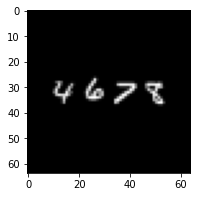

[4, 6, 7, 8, 10]


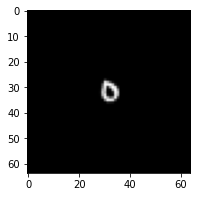

[0, 10, 10, 10, 10]


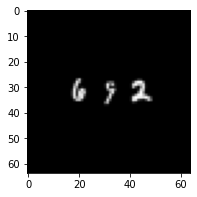

[6, 9, 2, 10, 10]


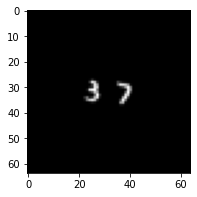

[3, 7, 10, 10, 10]


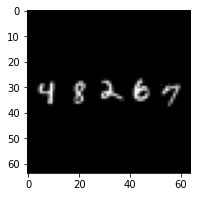

[4, 8, 2, 0, 7]


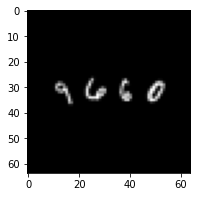

[8, 6, 6, 0, 10]


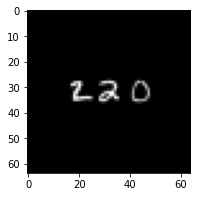

[6, 2, 0, 10, 10]


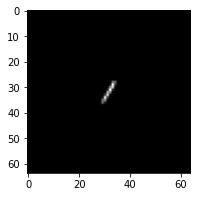

[1, 10, 10, 10, 10]


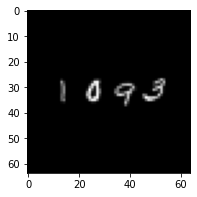

[6, 6, 8, 8, 10]


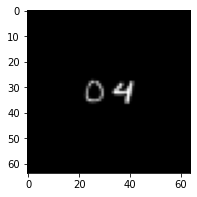

[2, 4, 10, 10, 10]


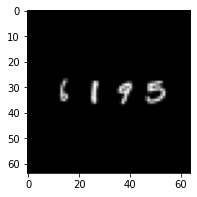

[6, 1, 9, 8, 10]


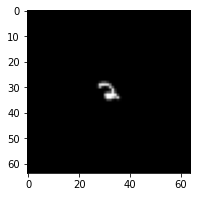

[2, 10, 10, 10, 10]


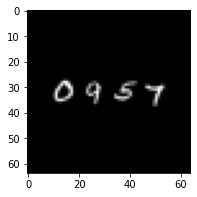

[9, 9, 5, 7, 10]


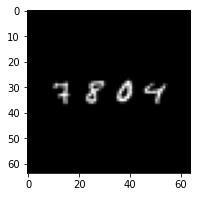

[7, 8, 0, 9, 10]


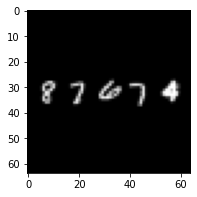

[8, 3, 9, 7, 9]


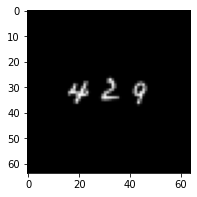

[4, 2, 9, 10, 10]


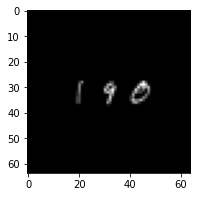

[6, 8, 8, 10, 10]


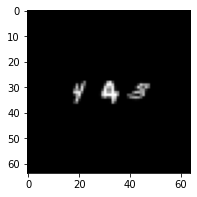

[8, 9, 3, 10, 10]


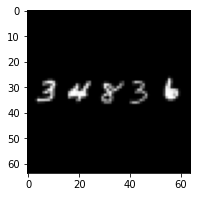

[3, 4, 8, 3, 6]


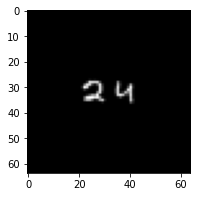

[2, 4, 10, 10, 10]


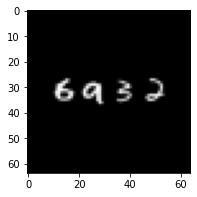

[6, 9, 3, 2, 10]


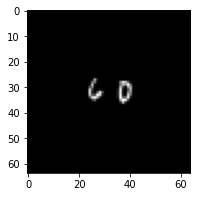

[6, 0, 10, 10, 10]


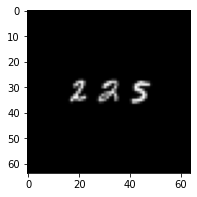

[8, 2, 5, 10, 10]


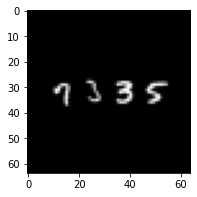

[8, 3, 3, 5, 10]


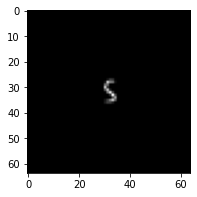

[8, 10, 10, 10, 10]


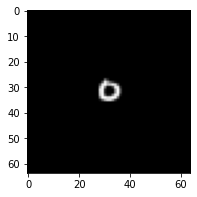

[0, 10, 10, 10, 10]


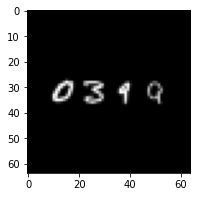

[0, 3, 4, 9, 10]


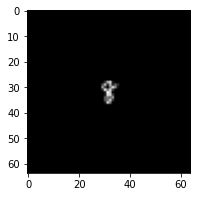

[8, 10, 10, 10, 10]


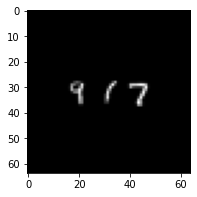

[8, 1, 7, 10, 10]


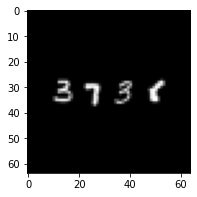

[3, 7, 3, 8, 10]


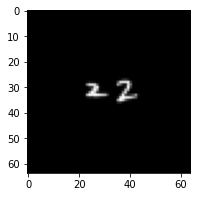

[2, 2, 10, 10, 10]


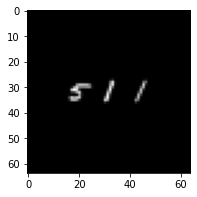

[5, 8, 1, 10, 10]


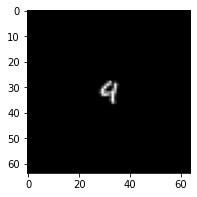

[8, 10, 10, 10, 10]


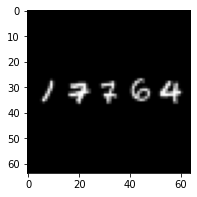

[1, 7, 7, 6, 4]


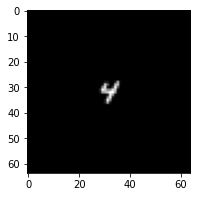

[8, 10, 10, 10, 10]


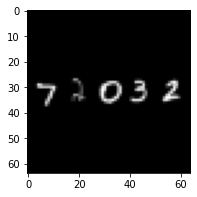

[7, 2, 0, 3, 2]


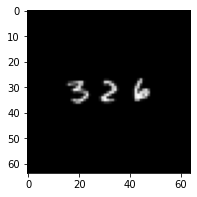

[3, 2, 6, 10, 10]


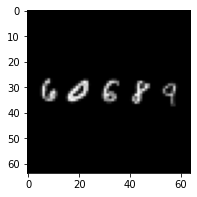

[6, 9, 6, 8, 9]


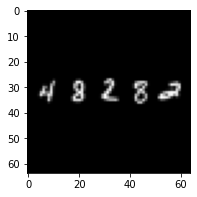

[4, 8, 2, 8, 2]


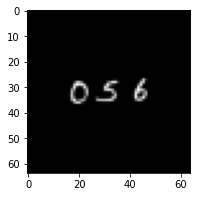

[0, 5, 6, 10, 10]


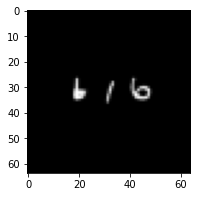

[6, 1, 6, 10, 10]


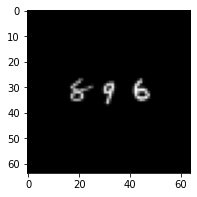

[8, 9, 6, 10, 10]


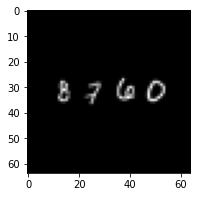

[8, 7, 6, 0, 10]


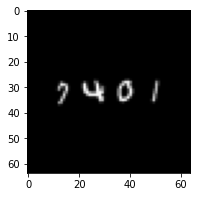

[7, 4, 0, 1, 10]


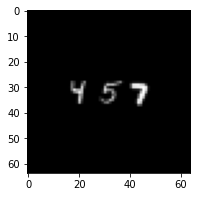

[8, 5, 7, 10, 10]


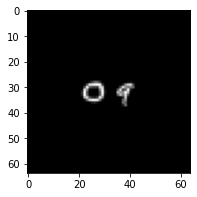

[9, 9, 10, 10, 10]


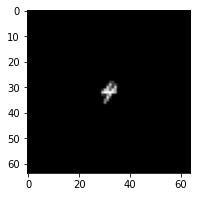

[8, 10, 10, 10, 10]


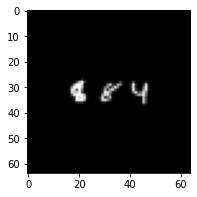

[8, 8, 4, 10, 10]


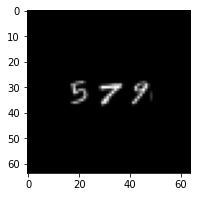

[5, 7, 8, 10, 10]


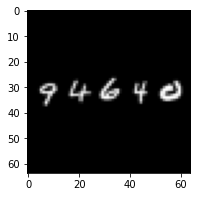

[8, 4, 6, 4, 5]


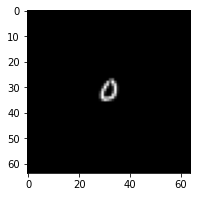

[0, 10, 10, 10, 10]


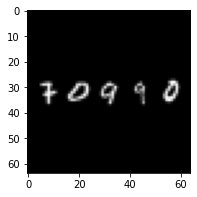

[7, 0, 9, 9, 0]


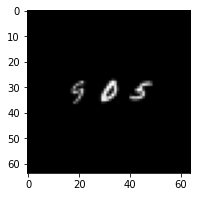

[9, 0, 5, 10, 10]


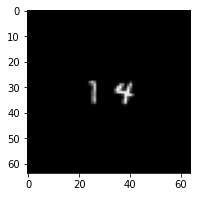

[1, 8, 10, 10, 10]


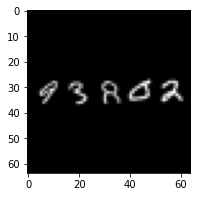

[8, 3, 8, 0, 2]


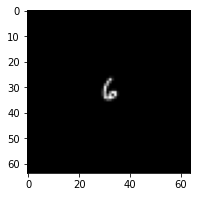

[6, 10, 10, 10, 10]


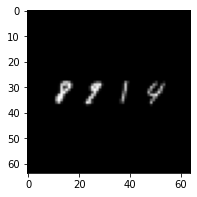

[8, 8, 1, 4, 10]


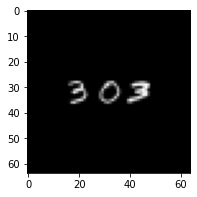

[3, 0, 8, 10, 10]


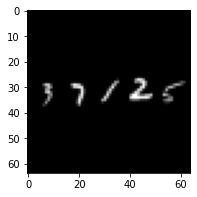

[8, 7, 1, 4, 8]


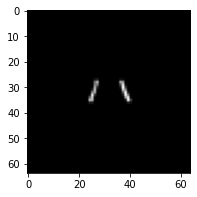

[0, 1, 10, 10, 10]


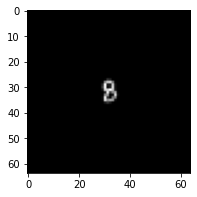

[8, 10, 10, 10, 10]


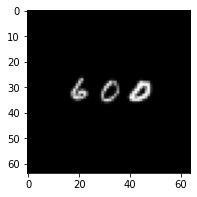

[6, 0, 6, 10, 10]


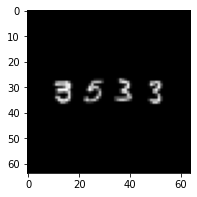

[3, 5, 3, 3, 10]


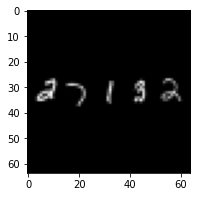

[4, 7, 1, 3, 2]


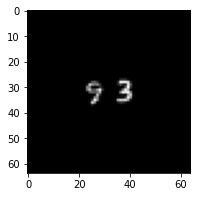

[9, 3, 10, 10, 10]


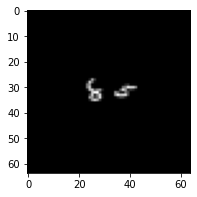

[8, 5, 10, 10, 10]


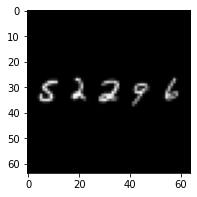

[8, 2, 2, 9, 6]


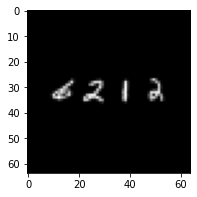

[6, 2, 1, 2, 10]


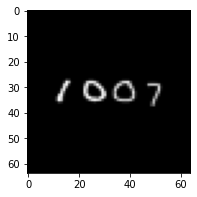

[6, 0, 3, 7, 10]


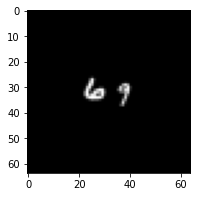

[6, 9, 10, 10, 10]


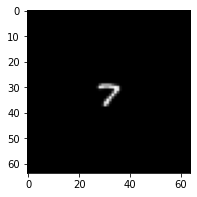

[7, 10, 10, 10, 10]


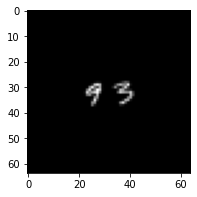

[8, 3, 10, 10, 10]


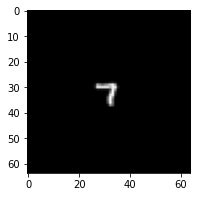

[7, 10, 10, 10, 10]


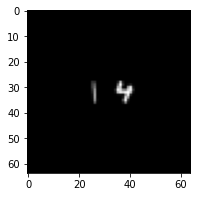

[1, 8, 10, 10, 10]


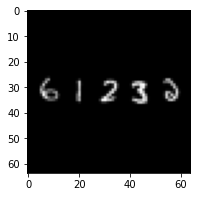

[6, 1, 2, 3, 2]


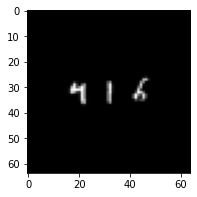

[4, 1, 8, 10, 10]


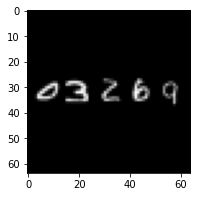

[0, 3, 2, 6, 9]


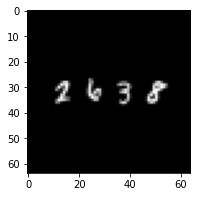

[2, 6, 3, 8, 10]


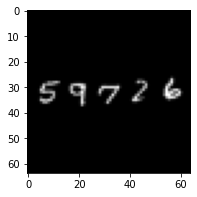

[5, 7, 7, 2, 6]


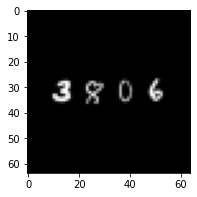

[3, 8, 0, 6, 10]


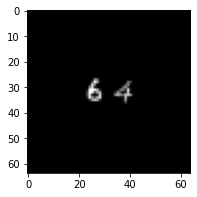

[6, 3, 10, 10, 10]


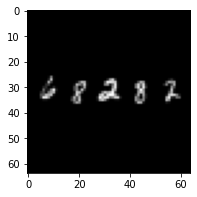

[2, 8, 2, 8, 2]


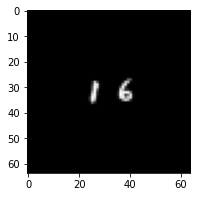

[1, 1, 10, 10, 10]


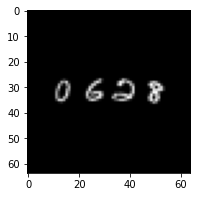

[8, 6, 2, 8, 10]


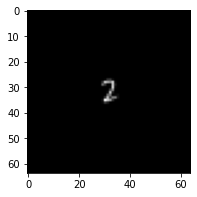

[2, 10, 10, 10, 10]


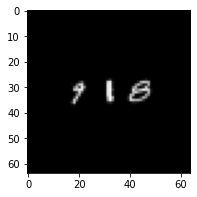

[8, 1, 8, 10, 10]


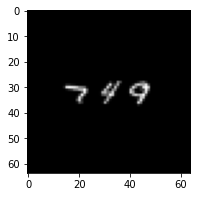

[7, 8, 9, 10, 10]


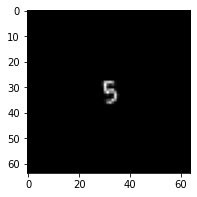

[5, 10, 10, 10, 10]


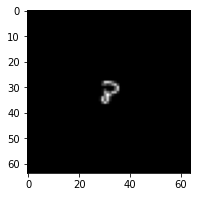

[8, 10, 10, 10, 10]


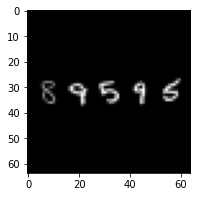

[8, 8, 7, 9, 6]


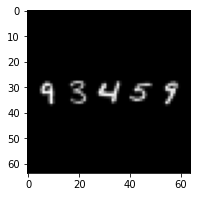

[8, 3, 4, 9, 8]


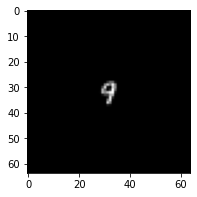

[8, 10, 10, 10, 10]


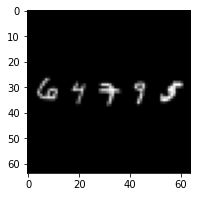

[6, 7, 7, 8, 3]


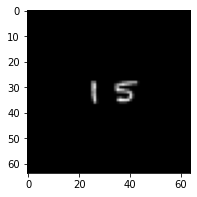

[1, 8, 10, 10, 10]


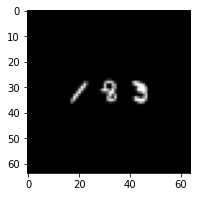

[1, 8, 3, 10, 10]


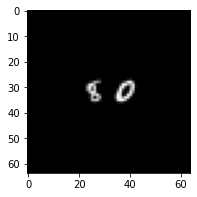

[8, 0, 10, 10, 10]


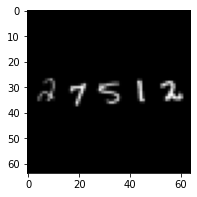

[2, 7, 3, 6, 2]


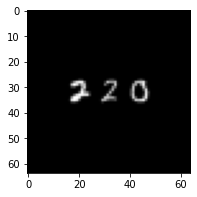

[2, 2, 0, 10, 10]


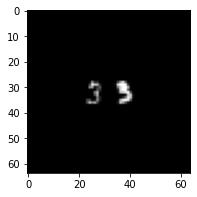

[3, 3, 10, 10, 10]


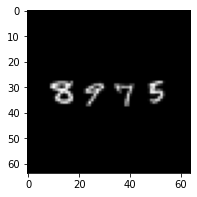

[3, 8, 7, 8, 10]


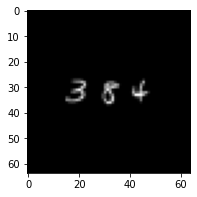

[3, 8, 4, 10, 10]


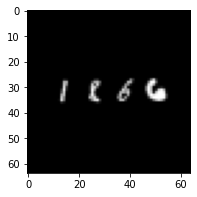

[8, 8, 6, 6, 10]


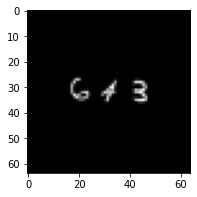

[6, 4, 3, 10, 10]


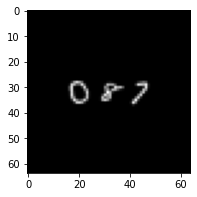

[0, 8, 8, 10, 10]


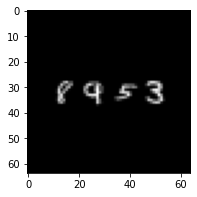

[8, 8, 5, 3, 10]


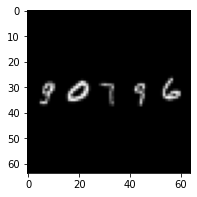

[8, 9, 7, 9, 6]


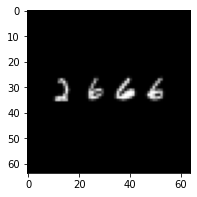

[2, 6, 6, 6, 10]


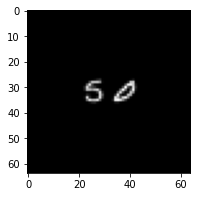

[5, 0, 10, 10, 10]


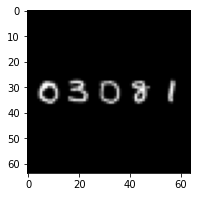

[0, 3, 0, 8, 1]


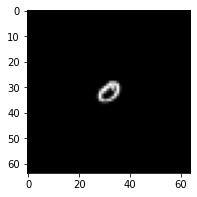

[0, 10, 10, 10, 10]


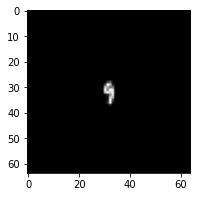

[9, 10, 10, 10, 10]


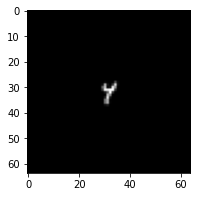

[8, 10, 10, 10, 10]


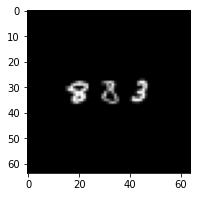

[8, 8, 3, 10, 10]


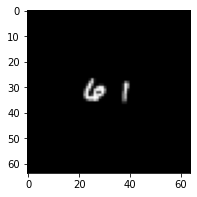

[7, 1, 10, 10, 10]


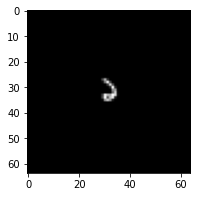

[2, 10, 10, 10, 10]


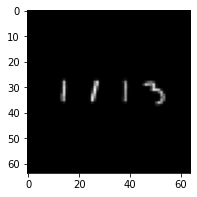

[5, 1, 7, 2, 10]


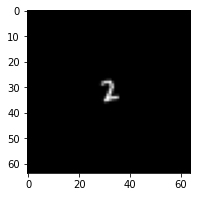

[2, 10, 10, 10, 10]


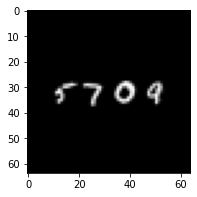

[8, 7, 0, 9, 10]


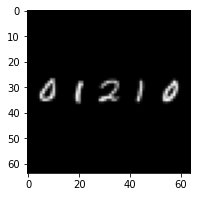

[2, 1, 2, 1, 8]


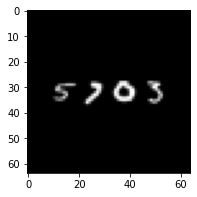

[8, 7, 9, 3, 10]


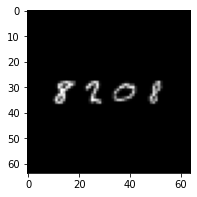

[8, 2, 0, 8, 10]


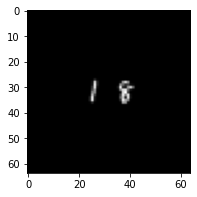

[4, 8, 10, 10, 10]


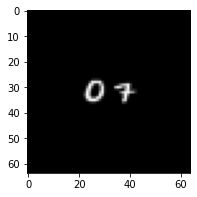

[0, 7, 10, 10, 10]


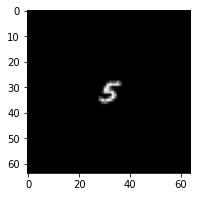

[5, 10, 10, 10, 10]


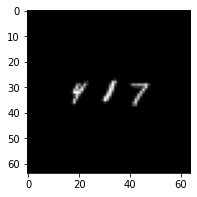

[8, 1, 7, 10, 10]


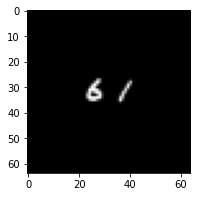

[6, 1, 10, 10, 10]


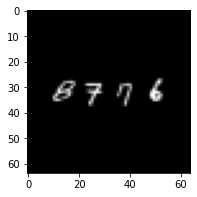

[4, 8, 7, 3, 10]


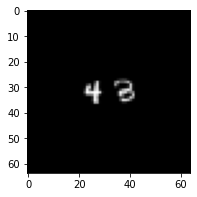

[4, 3, 10, 10, 10]


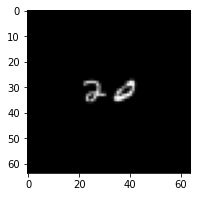

[2, 6, 10, 10, 10]


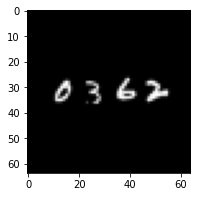

[0, 3, 6, 2, 10]


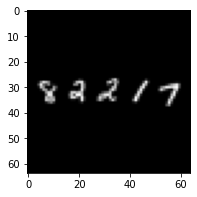

[8, 2, 2, 1, 7]


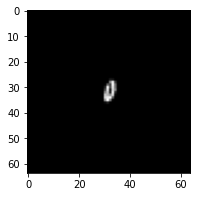

[8, 10, 10, 10, 10]


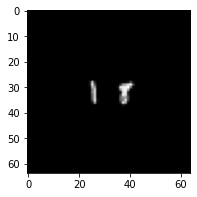

[8, 8, 10, 10, 10]


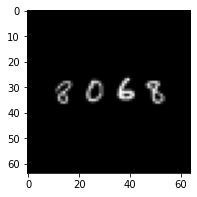

[8, 0, 6, 8, 10]


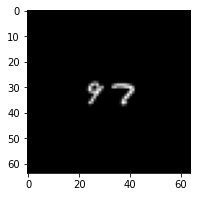

[8, 7, 10, 10, 10]


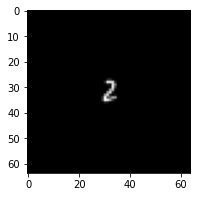

[2, 10, 10, 10, 10]


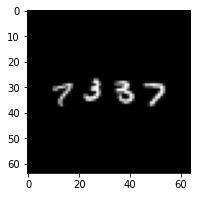

[8, 3, 3, 7, 10]


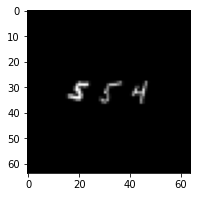

[5, 5, 4, 10, 10]


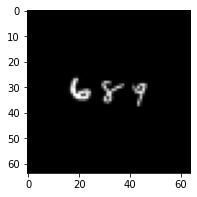

[6, 8, 9, 10, 10]


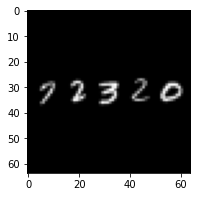

[7, 2, 3, 2, 0]


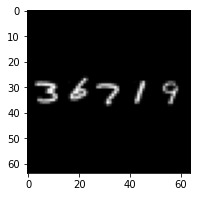

[3, 4, 7, 1, 8]


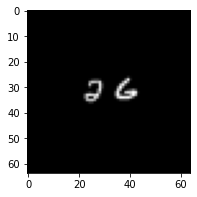

[2, 6, 10, 10, 10]


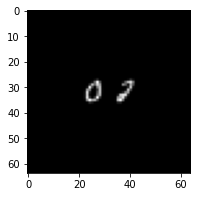

[0, 8, 10, 10, 10]


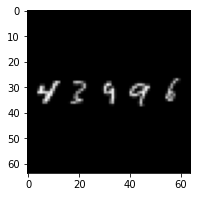

[8, 2, 9, 8, 6]


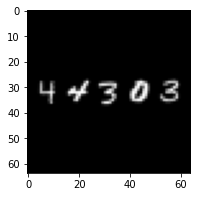

[4, 4, 3, 0, 3]


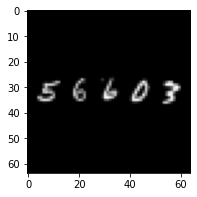

[5, 6, 6, 0, 3]


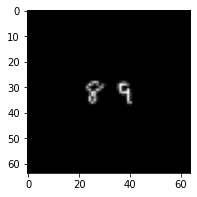

[8, 9, 10, 10, 10]


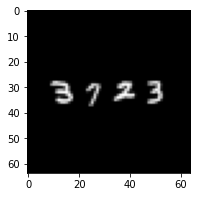

[3, 7, 2, 3, 10]


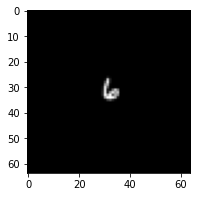

[6, 10, 10, 10, 10]


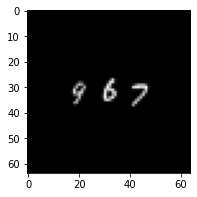

[8, 6, 7, 10, 10]


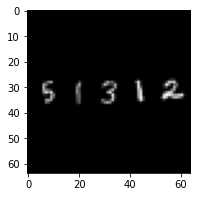

[8, 1, 3, 1, 2]


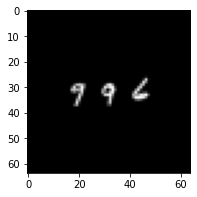

[8, 9, 6, 10, 10]


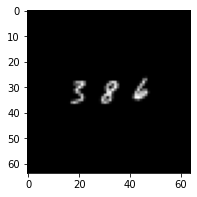

[3, 8, 6, 10, 10]


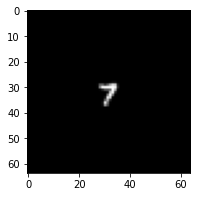

[7, 10, 10, 10, 10]


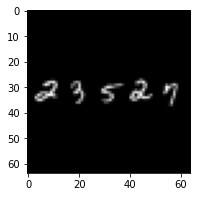

[4, 3, 5, 2, 7]


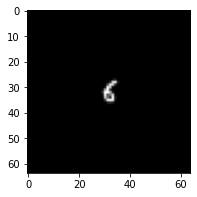

[6, 10, 10, 10, 10]


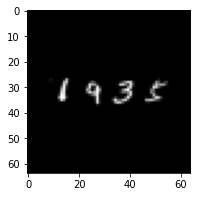

[6, 9, 3, 5, 10]


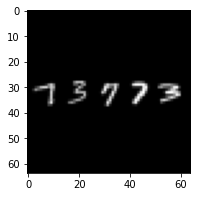

[7, 3, 7, 7, 3]


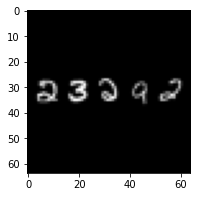

[2, 3, 2, 9, 2]


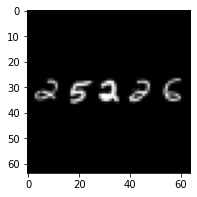

[2, 5, 2, 2, 6]


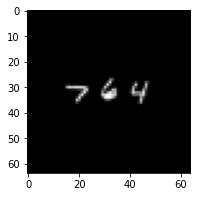

[7, 6, 4, 10, 10]


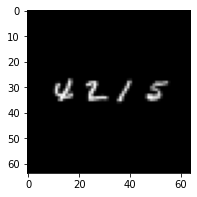

[6, 2, 1, 5, 10]


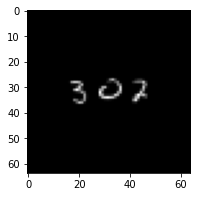

[3, 0, 2, 10, 10]


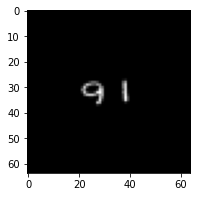

[7, 3, 10, 10, 10]


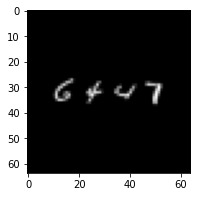

[6, 4, 4, 7, 10]


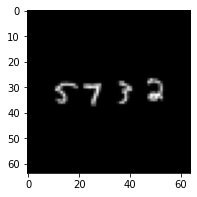

[8, 7, 3, 2, 10]


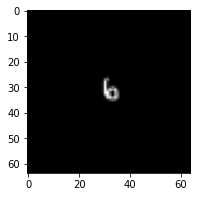

[6, 10, 10, 10, 10]


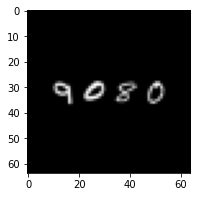

[7, 9, 8, 0, 10]


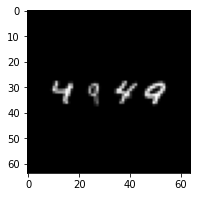

[7, 8, 8, 8, 10]


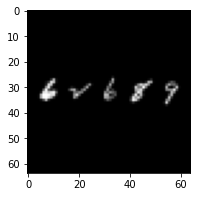

[6, 4, 6, 8, 9]


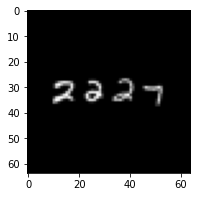

[2, 2, 2, 7, 10]


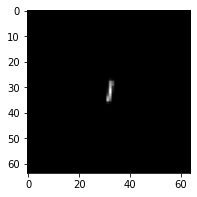

[1, 10, 10, 10, 10]


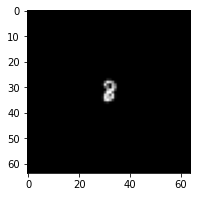

[8, 10, 10, 10, 10]


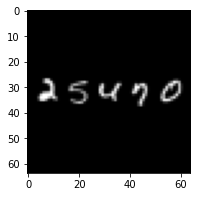

[2, 5, 4, 7, 6]


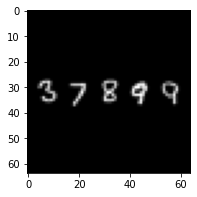

[3, 7, 8, 8, 8]


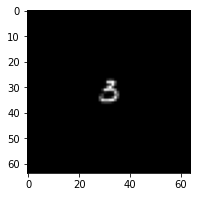

[3, 10, 10, 10, 10]


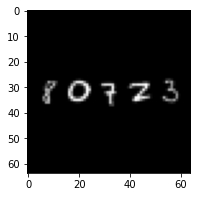

[8, 3, 3, 7, 2]


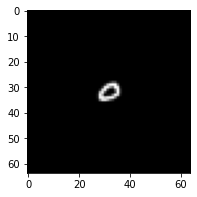

[0, 10, 10, 10, 10]


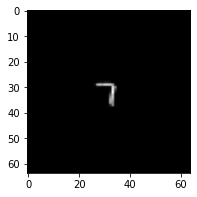

[3, 10, 10, 10, 10]


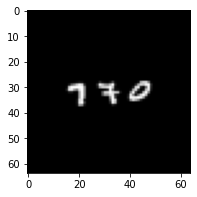

[7, 3, 8, 10, 10]


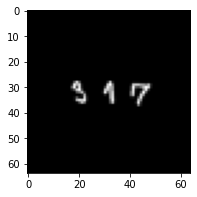

[3, 9, 7, 10, 10]


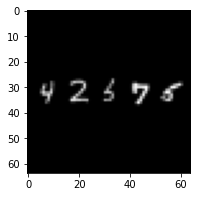

[4, 2, 5, 7, 5]


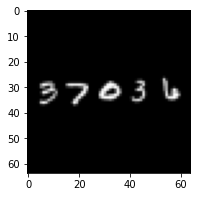

[7, 7, 9, 1, 2]


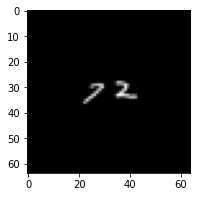

[2, 2, 10, 10, 10]


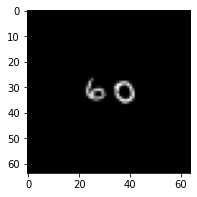

[6, 0, 10, 10, 10]


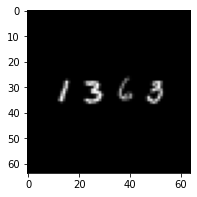

[1, 3, 6, 8, 10]


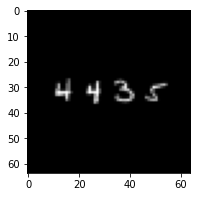

[4, 4, 3, 5, 10]


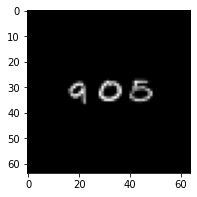

[9, 0, 5, 10, 10]


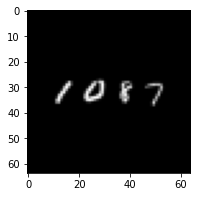

[8, 9, 8, 7, 10]


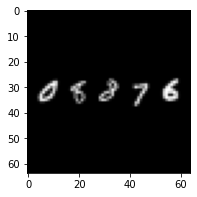

[9, 8, 8, 7, 6]


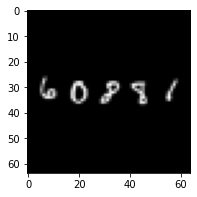

[6, 0, 8, 8, 1]


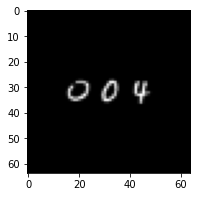

[2, 0, 4, 10, 10]


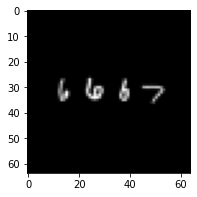

[6, 6, 8, 7, 10]


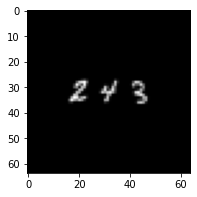

[8, 4, 3, 10, 10]


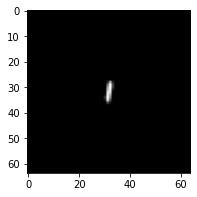

[1, 10, 10, 10, 10]


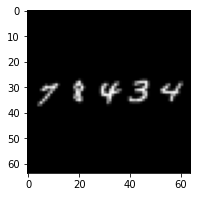

[8, 8, 8, 3, 4]


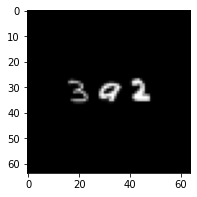

[3, 3, 2, 10, 10]


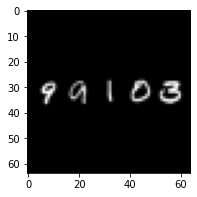

[8, 9, 1, 8, 2]


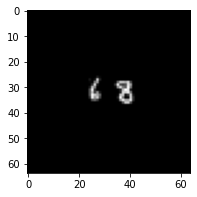

[6, 8, 10, 10, 10]


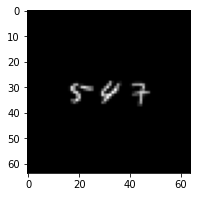

[7, 8, 8, 10, 10]


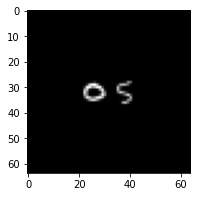

[7, 8, 10, 10, 10]


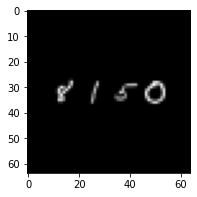

[8, 1, 5, 0, 10]


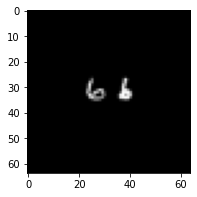

[6, 3, 10, 10, 10]


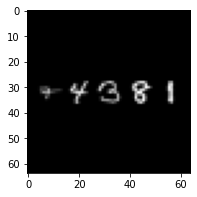

[7, 8, 3, 8, 1]


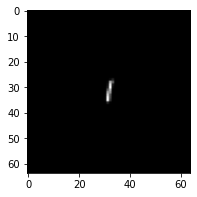

[1, 10, 10, 10, 10]


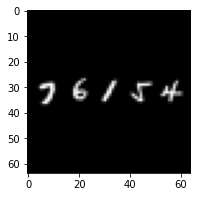

[7, 6, 1, 8, 4]


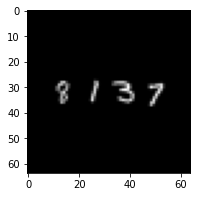

[7, 1, 3, 7, 10]


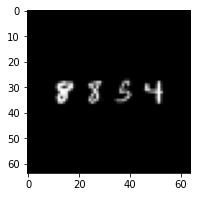

[8, 8, 3, 8, 10]


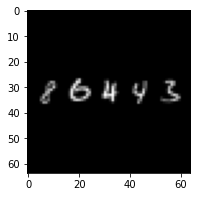

[8, 6, 4, 4, 3]


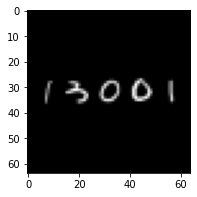

[1, 3, 0, 0, 1]


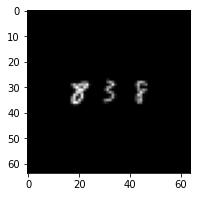

[8, 9, 8, 10, 10]


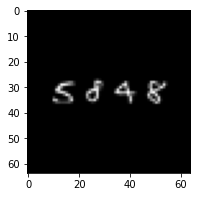

[5, 8, 8, 8, 10]


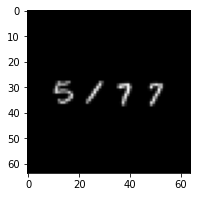

[3, 1, 7, 7, 10]


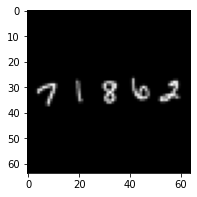

[7, 1, 8, 4, 2]


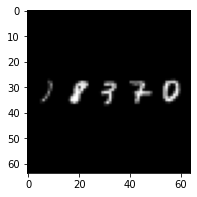

[1, 8, 3, 7, 0]


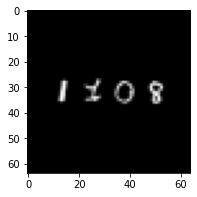

[8, 1, 0, 8, 10]


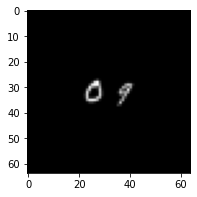

[2, 8, 10, 10, 10]


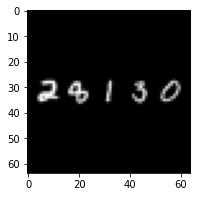

[2, 8, 1, 3, 0]


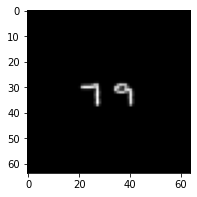

[7, 9, 10, 10, 10]


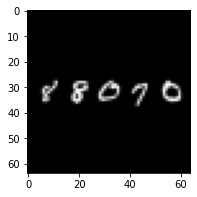

[8, 8, 2, 7, 6]


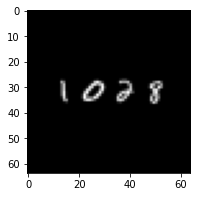

[1, 0, 2, 8, 10]


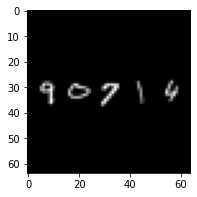

[8, 8, 8, 1, 4]


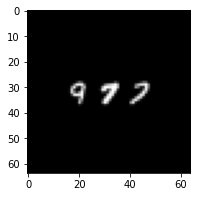

[9, 8, 8, 10, 10]


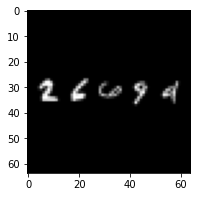

[2, 6, 6, 9, 6]


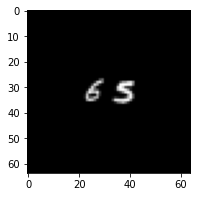

[8, 5, 10, 10, 10]


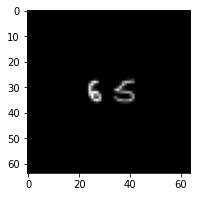

[8, 5, 10, 10, 10]


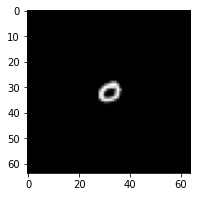

[0, 10, 10, 10, 10]


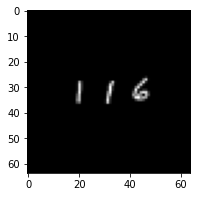

[8, 1, 6, 10, 10]


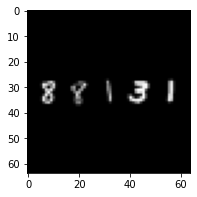

[8, 8, 1, 3, 7]


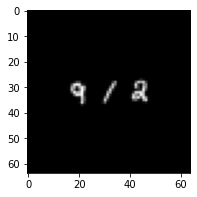

[9, 1, 2, 10, 10]


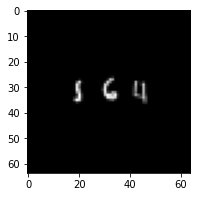

[5, 6, 4, 10, 10]


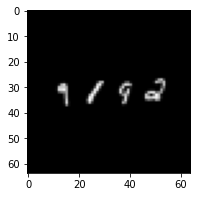

[9, 1, 8, 4, 10]


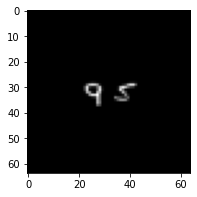

[8, 8, 10, 10, 10]


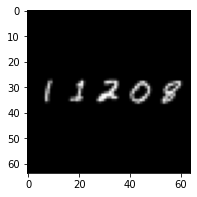

[0, 1, 2, 0, 8]


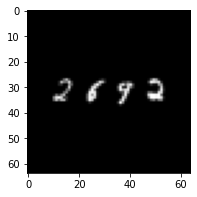

[2, 8, 8, 2, 10]


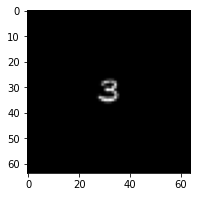

[3, 10, 10, 10, 10]


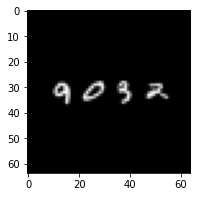

[9, 9, 3, 3, 10]


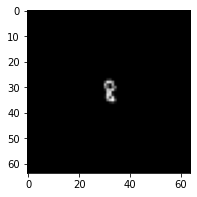

[8, 10, 10, 10, 10]


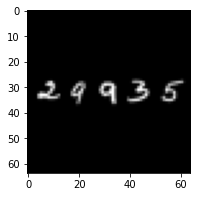

[2, 9, 9, 3, 5]


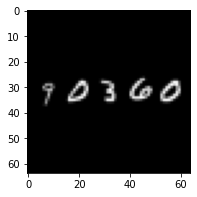

[8, 9, 3, 6, 6]


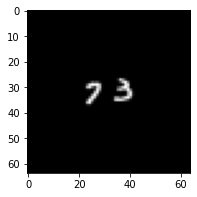

[7, 3, 10, 10, 10]


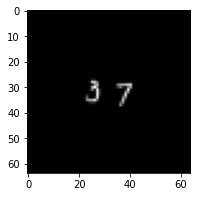

[1, 7, 10, 10, 10]


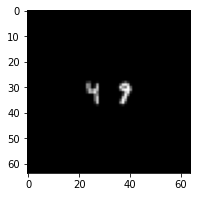

[7, 8, 10, 10, 10]


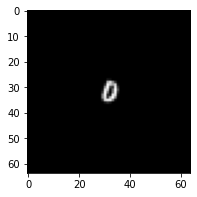

[0, 10, 10, 10, 10]


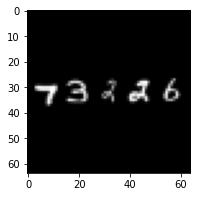

[7, 3, 3, 2, 6]


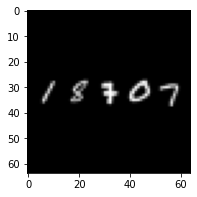

[4, 8, 8, 9, 7]


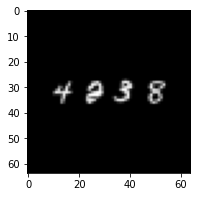

[4, 8, 3, 8, 10]


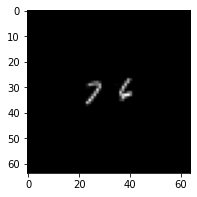

[7, 6, 10, 10, 10]


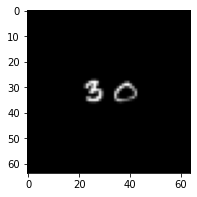

[3, 0, 10, 10, 10]


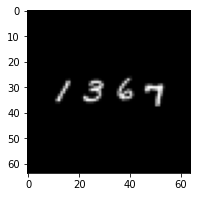

[8, 3, 6, 7, 10]


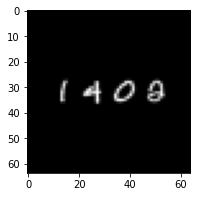

[0, 4, 0, 8, 10]


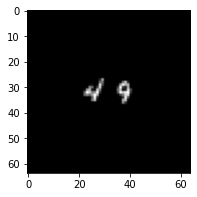

[4, 9, 10, 10, 10]


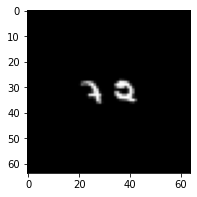

[3, 2, 10, 10, 10]


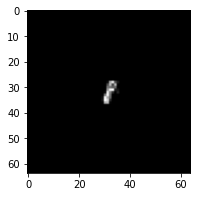

[8, 10, 10, 10, 10]


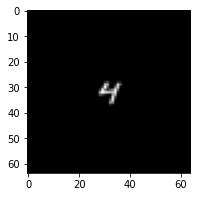

[4, 10, 10, 10, 10]


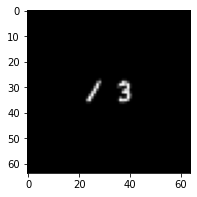

[8, 3, 10, 10, 10]


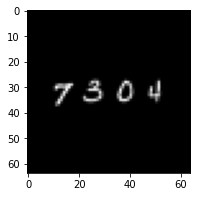

[8, 3, 0, 4, 10]


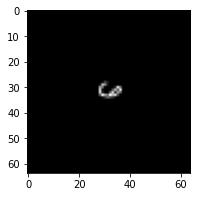

[8, 10, 10, 10, 10]


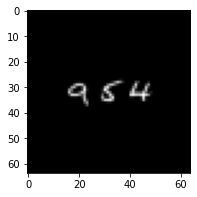

[8, 5, 4, 10, 10]


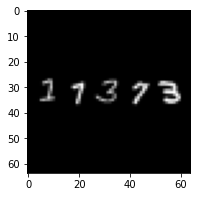

[3, 7, 3, 7, 3]


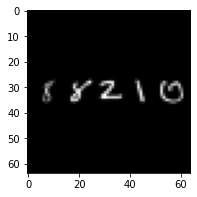

[8, 8, 2, 1, 5]


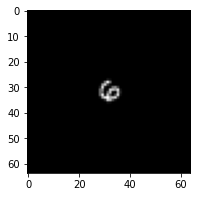

[6, 10, 10, 10, 10]


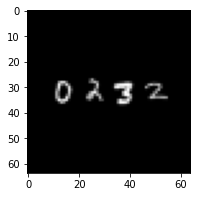

[6, 3, 3, 2, 10]


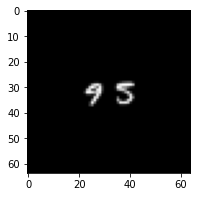

[8, 5, 10, 10, 10]


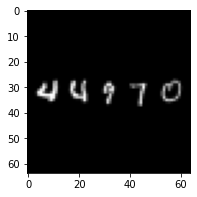

[4, 4, 8, 7, 5]


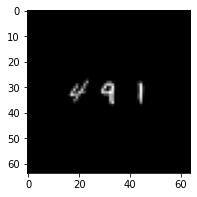

[8, 8, 4, 10, 10]


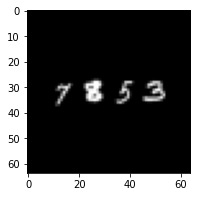

[8, 8, 5, 3, 10]


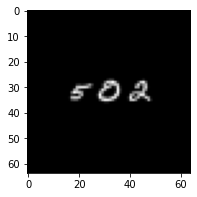

[5, 0, 2, 10, 10]


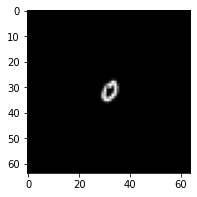

[0, 10, 10, 10, 10]


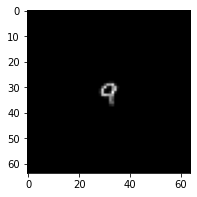

[8, 10, 10, 10, 10]


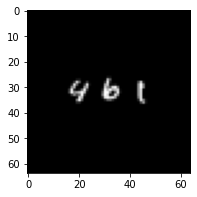

[8, 6, 1, 10, 10]


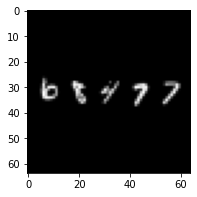

[8, 8, 4, 7, 7]


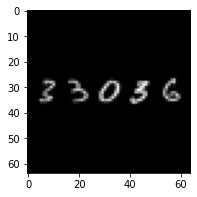

[3, 3, 0, 3, 6]


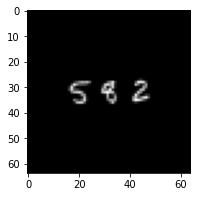

[8, 8, 2, 10, 10]


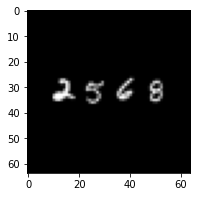

[2, 5, 6, 8, 10]


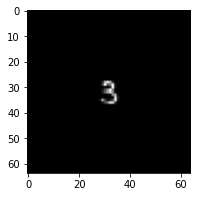

[3, 10, 10, 10, 10]


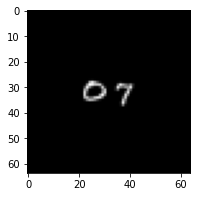

[2, 7, 10, 10, 10]


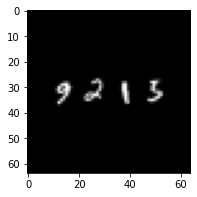

[8, 2, 1, 3, 10]


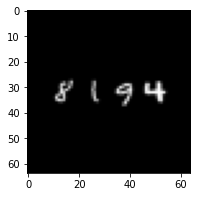

[8, 1, 9, 8, 10]


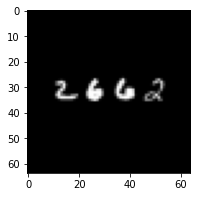

[4, 6, 6, 2, 10]


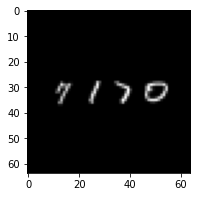

[7, 1, 7, 5, 10]


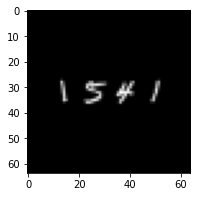

[8, 5, 4, 1, 10]


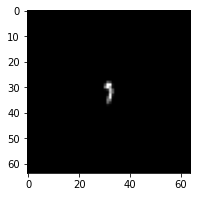

[1, 10, 10, 10, 10]


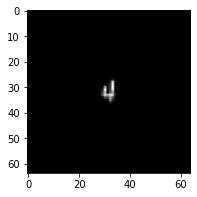

[4, 10, 10, 10, 10]


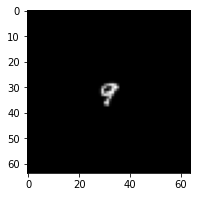

[8, 10, 10, 10, 10]


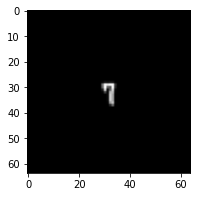

[1, 10, 10, 10, 10]


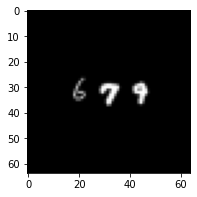

[9, 7, 9, 10, 10]


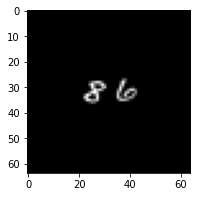

[8, 6, 10, 10, 10]


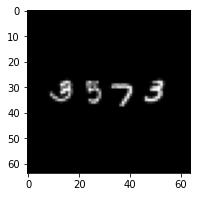

[3, 3, 7, 3, 10]


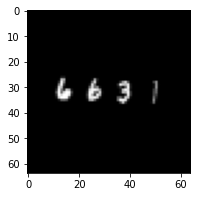

[6, 6, 3, 9, 10]


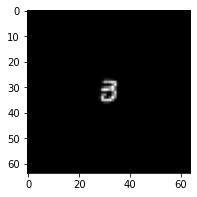

[3, 10, 10, 10, 10]


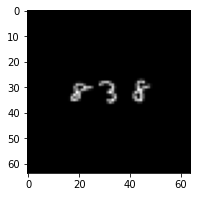

[8, 3, 8, 10, 10]


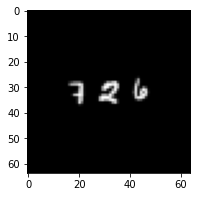

[7, 2, 6, 10, 10]


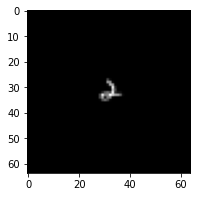

[2, 10, 10, 10, 10]


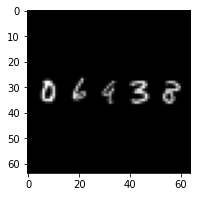

[0, 6, 9, 3, 8]


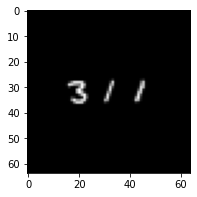

[3, 8, 7, 10, 10]


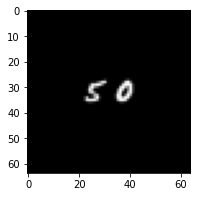

[5, 0, 10, 10, 10]


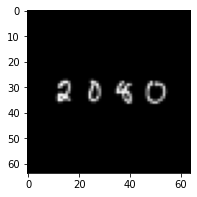

[2, 0, 8, 5, 10]


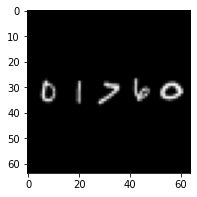

[0, 1, 7, 6, 0]


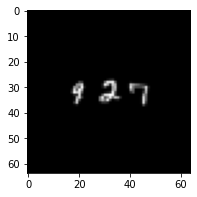

[8, 2, 7, 10, 10]


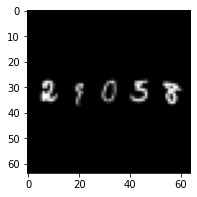

[6, 8, 6, 5, 8]


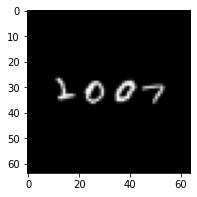

[2, 0, 0, 7, 10]


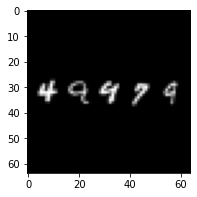

[8, 8, 8, 8, 9]


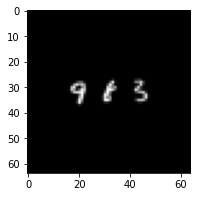

[9, 8, 3, 10, 10]


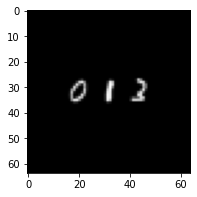

[0, 1, 2, 10, 10]


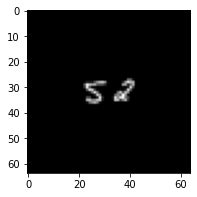

[5, 8, 10, 10, 10]


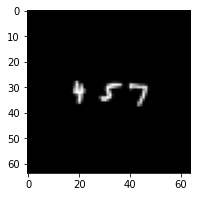

[8, 5, 7, 10, 10]


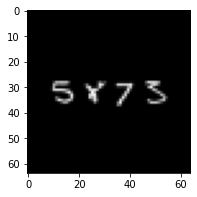

[3, 8, 7, 3, 10]


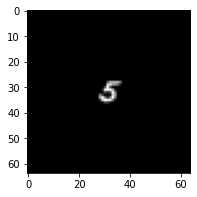

[5, 10, 10, 10, 10]


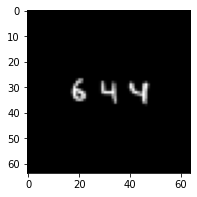

[8, 4, 4, 10, 10]


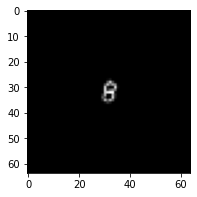

[8, 10, 10, 10, 10]


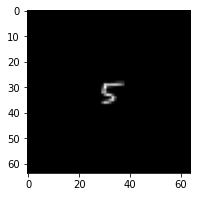

[5, 10, 10, 10, 10]


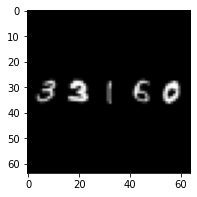

[3, 3, 1, 6, 0]


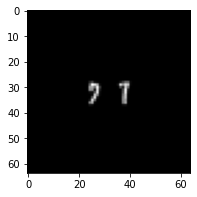

[7, 9, 10, 10, 10]


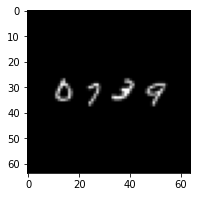

[0, 7, 3, 9, 10]


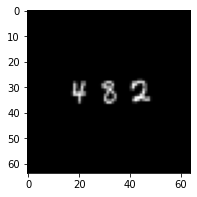

[4, 8, 2, 10, 10]


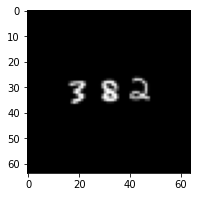

[3, 8, 2, 10, 10]


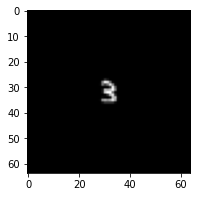

[3, 10, 10, 10, 10]


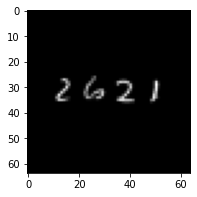

[8, 6, 2, 1, 10]


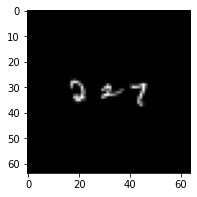

[2, 7, 7, 10, 10]


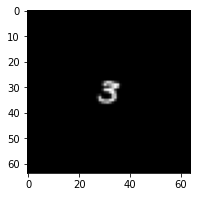

[3, 10, 10, 10, 10]


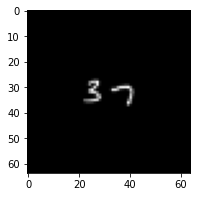

[3, 7, 10, 10, 10]


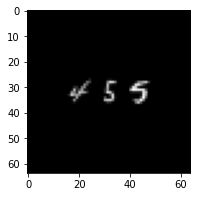

[8, 5, 9, 10, 10]


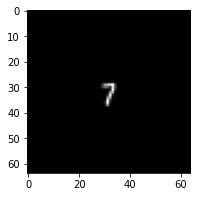

[1, 10, 10, 10, 10]


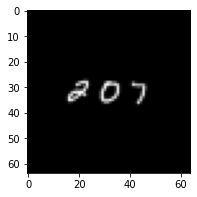

[2, 0, 7, 10, 10]


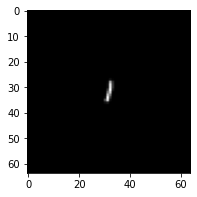

[1, 10, 10, 10, 10]


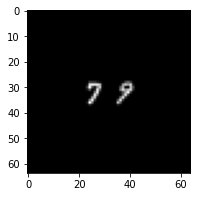

[7, 8, 10, 10, 10]


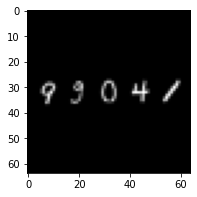

[8, 9, 0, 4, 8]


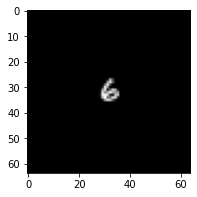

[6, 10, 10, 10, 10]


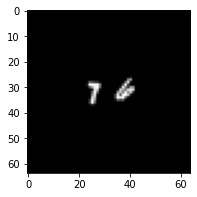

[8, 4, 10, 10, 10]


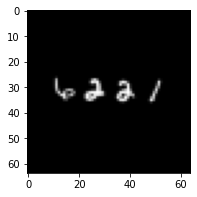

[6, 2, 2, 1, 10]


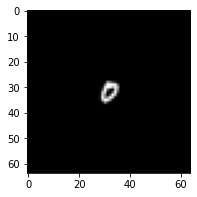

[8, 10, 10, 10, 10]


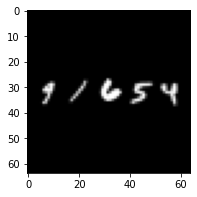

[8, 1, 6, 5, 8]


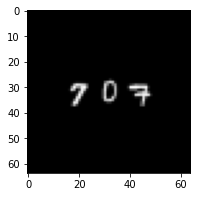

[7, 0, 3, 10, 10]


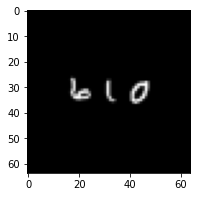

[6, 6, 0, 10, 10]


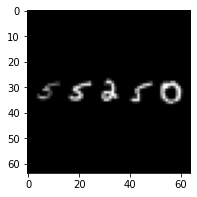

[5, 5, 2, 5, 0]


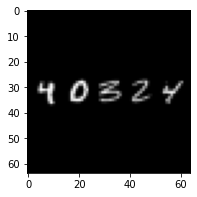

[8, 0, 8, 8, 4]


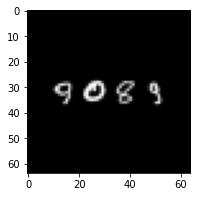

[8, 9, 8, 8, 10]


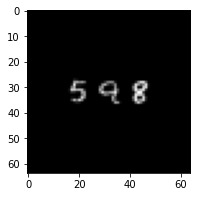

[7, 8, 8, 10, 10]


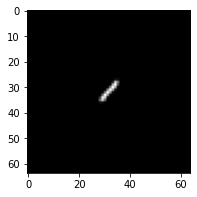

[1, 10, 10, 10, 10]


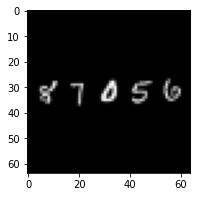

[8, 7, 0, 5, 6]


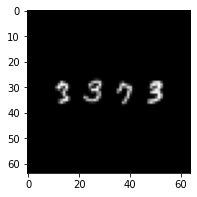

[3, 3, 7, 3, 10]


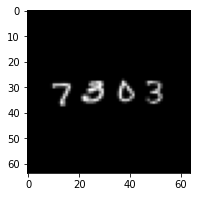

[7, 3, 0, 3, 10]


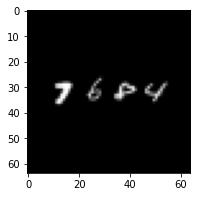

[8, 6, 8, 8, 10]


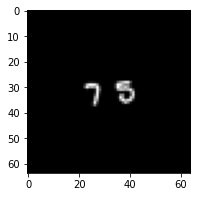

[7, 2, 10, 10, 10]


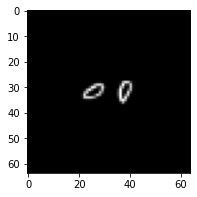

[9, 6, 10, 10, 10]


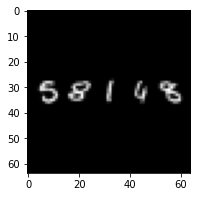

[3, 8, 1, 4, 8]


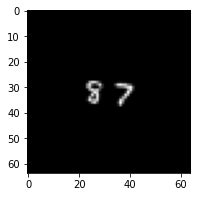

[8, 7, 10, 10, 10]


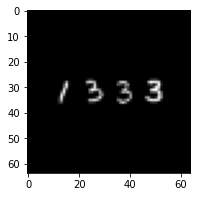

[1, 3, 3, 3, 10]


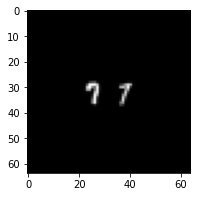

[7, 7, 10, 10, 10]


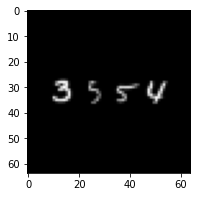

[3, 5, 5, 4, 10]


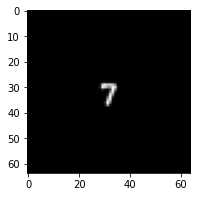

[3, 10, 10, 10, 10]


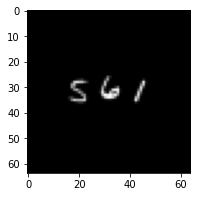

[5, 6, 1, 10, 10]


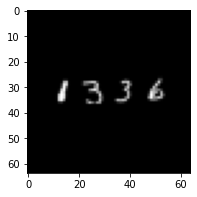

[8, 3, 3, 6, 10]


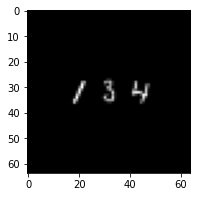

[4, 8, 4, 10, 10]


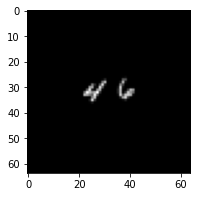

[4, 6, 10, 10, 10]


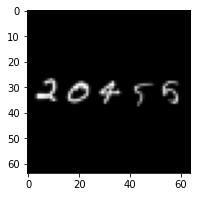

[2, 0, 8, 8, 5]


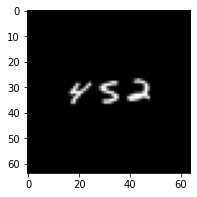

[4, 5, 2, 10, 10]


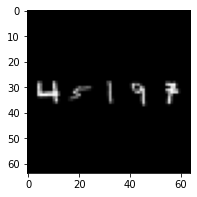

[4, 7, 1, 9, 8]


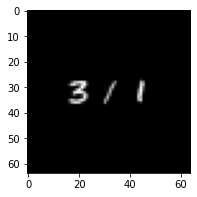

[3, 8, 1, 10, 10]


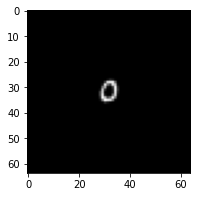

[0, 10, 10, 10, 10]


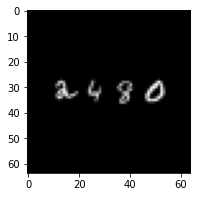

[4, 4, 8, 0, 10]


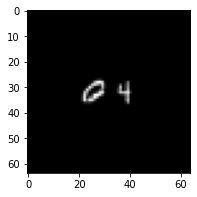

[2, 4, 10, 10, 10]


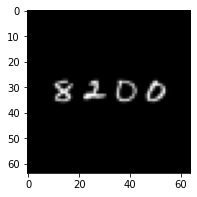

[8, 2, 0, 0, 10]


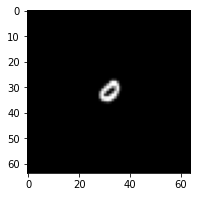

[0, 10, 10, 10, 10]


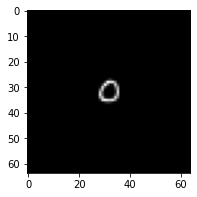

[0, 10, 10, 10, 10]


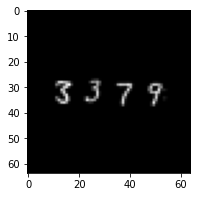

[3, 3, 7, 8, 10]


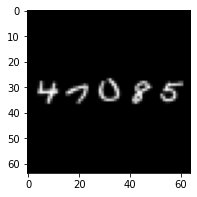

[4, 7, 0, 8, 5]


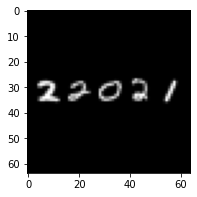

[2, 2, 2, 2, 1]


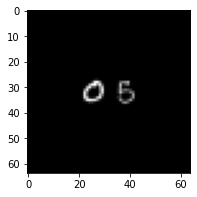

[2, 8, 10, 10, 10]


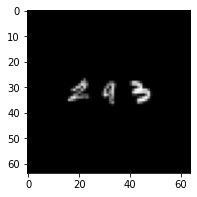

[2, 9, 3, 10, 10]


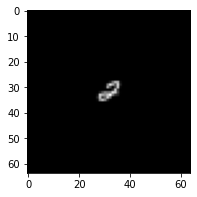

[2, 10, 10, 10, 10]


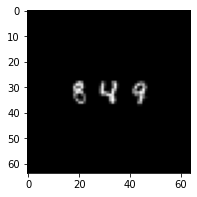

[8, 8, 8, 10, 10]


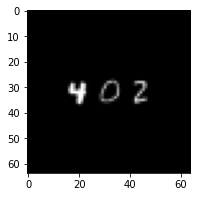

[4, 0, 2, 10, 10]


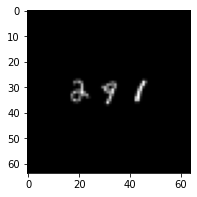

[2, 9, 1, 10, 10]


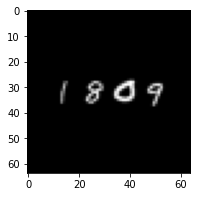

[6, 8, 9, 9, 10]


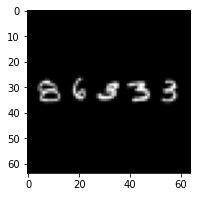

[8, 6, 3, 3, 3]


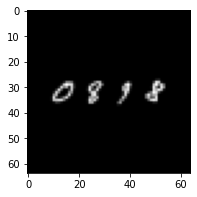

[0, 8, 1, 8, 10]


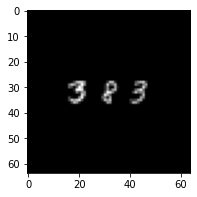

[3, 8, 3, 10, 10]


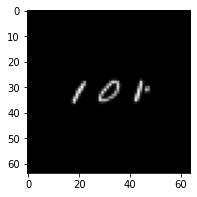

[8, 0, 8, 10, 10]


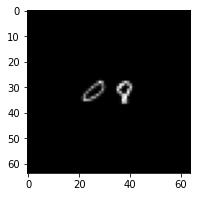

[2, 8, 10, 10, 10]


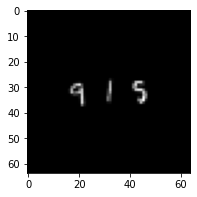

[7, 1, 5, 10, 10]


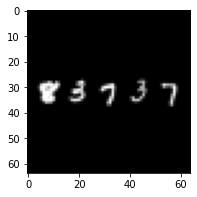

[8, 3, 7, 3, 9]


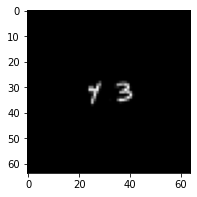

[8, 3, 10, 10, 10]


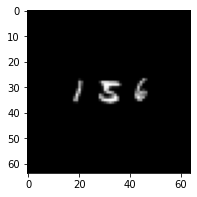

[1, 5, 6, 10, 10]


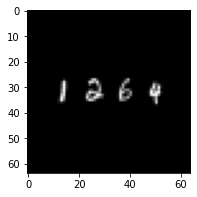

[1, 2, 6, 3, 10]


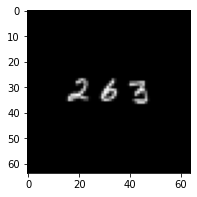

[2, 6, 2, 10, 10]


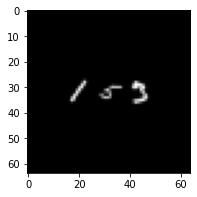

[8, 5, 3, 10, 10]


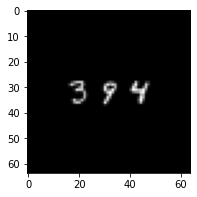

[3, 8, 7, 10, 10]


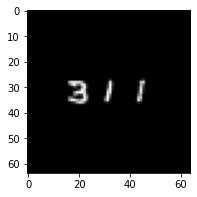

[3, 1, 4, 10, 10]


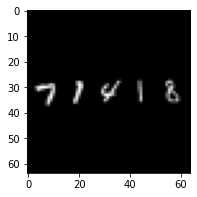

[7, 1, 8, 1, 3]


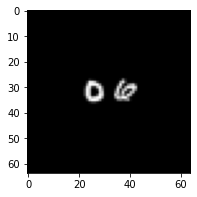

[0, 6, 10, 10, 10]


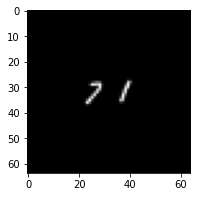

[2, 1, 10, 10, 10]


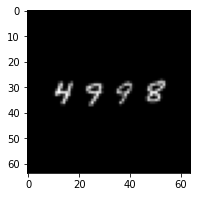

[4, 8, 8, 8, 10]


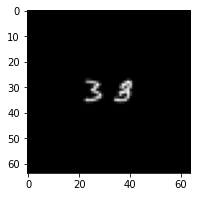

[3, 3, 10, 10, 10]


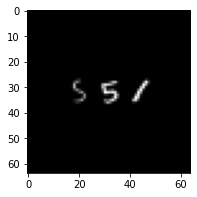

[5, 5, 1, 10, 10]


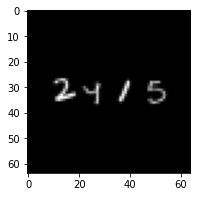

[2, 4, 1, 5, 10]


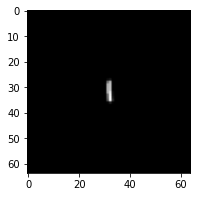

[1, 10, 10, 10, 10]


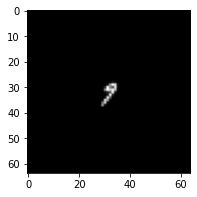

[8, 10, 10, 10, 10]


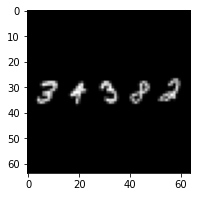

[7, 4, 3, 8, 2]


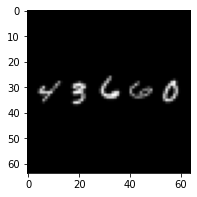

[4, 3, 6, 6, 0]


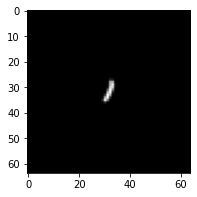

[1, 10, 10, 10, 10]


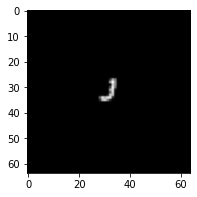

[3, 10, 10, 10, 10]


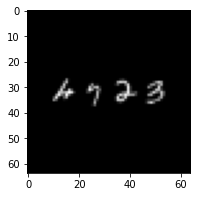

[4, 7, 2, 3, 10]


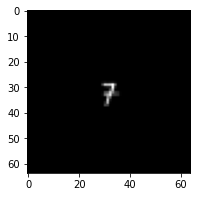

[8, 10, 10, 10, 10]


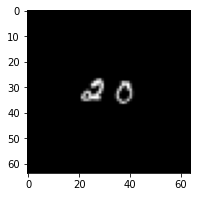

[2, 0, 10, 10, 10]


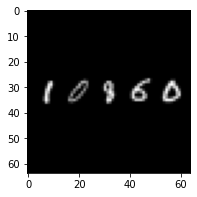

[8, 8, 8, 6, 0]


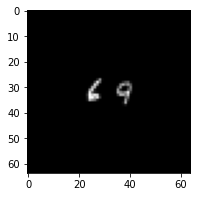

[6, 9, 10, 10, 10]


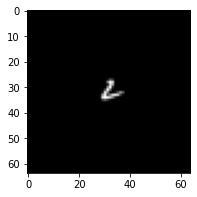

[2, 10, 10, 10, 10]


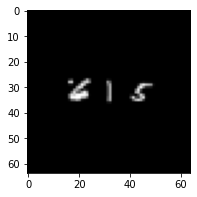

[6, 1, 5, 10, 10]


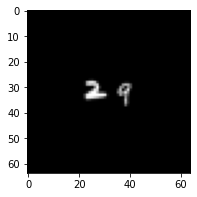

[2, 8, 10, 10, 10]


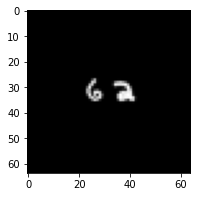

[6, 2, 10, 10, 10]


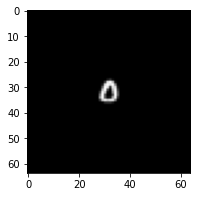

[0, 10, 10, 10, 10]


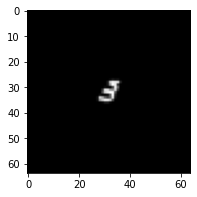

[3, 10, 10, 10, 10]


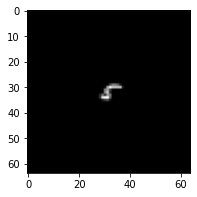

[5, 10, 10, 10, 10]


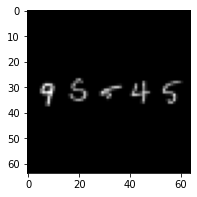

[8, 3, 5, 4, 8]


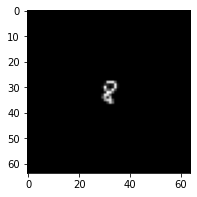

[8, 10, 10, 10, 10]


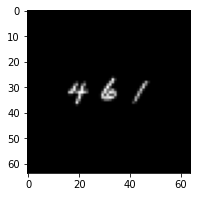

[4, 6, 1, 10, 10]


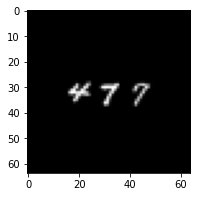

[8, 7, 8, 10, 10]


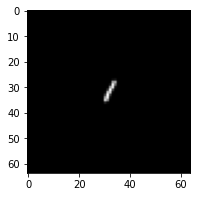

[1, 10, 10, 10, 10]


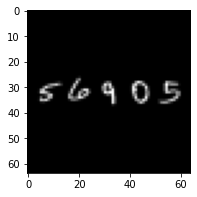

[5, 6, 9, 0, 5]


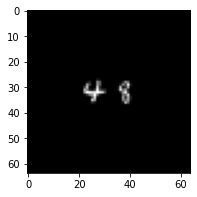

[8, 8, 10, 10, 10]


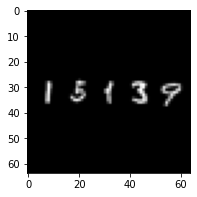

[6, 3, 1, 3, 8]


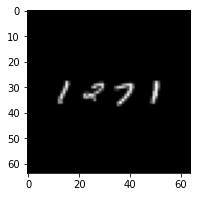

[8, 8, 7, 1, 10]


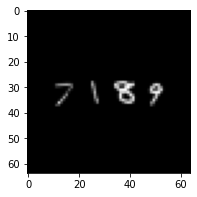

[2, 1, 8, 9, 10]


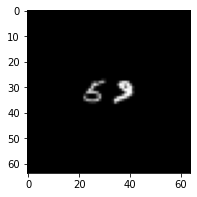

[5, 2, 10, 10, 10]


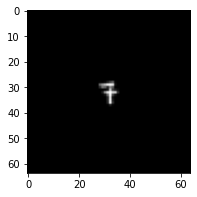

[8, 10, 10, 10, 10]


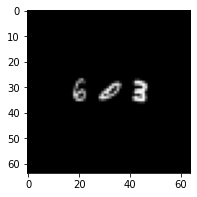

[6, 8, 3, 10, 10]


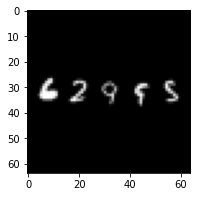

[6, 2, 8, 8, 3]


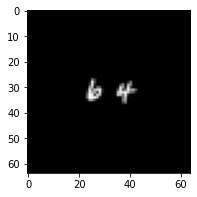

[6, 4, 10, 10, 10]


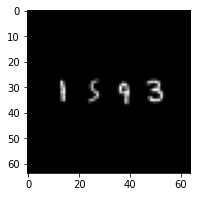

[8, 5, 9, 2, 10]


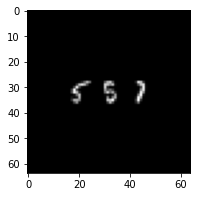

[8, 5, 7, 10, 10]


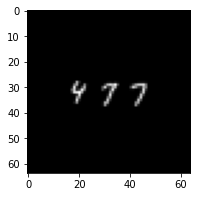

[8, 7, 7, 10, 10]


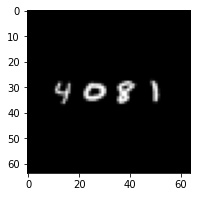

[4, 9, 8, 1, 10]


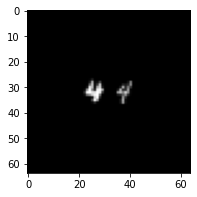

[4, 4, 10, 10, 10]


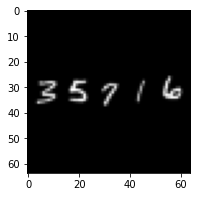

[3, 5, 7, 1, 6]


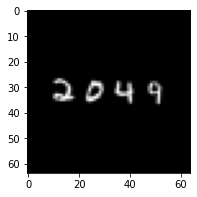

[2, 0, 4, 9, 10]


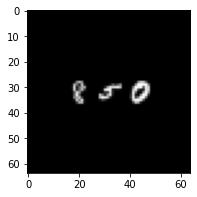

[8, 5, 8, 10, 10]


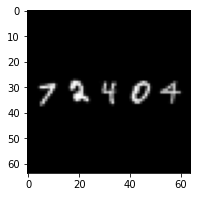

[8, 2, 4, 0, 9]


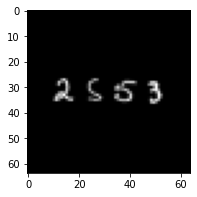

[2, 5, 5, 3, 10]


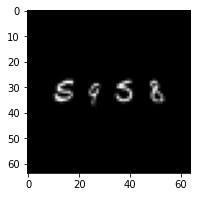

[8, 9, 5, 8, 10]


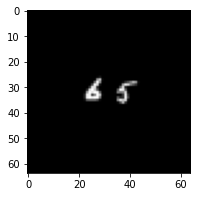

[6, 5, 10, 10, 10]


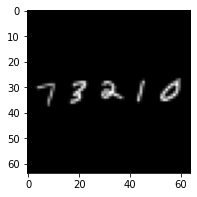

[7, 3, 8, 1, 8]


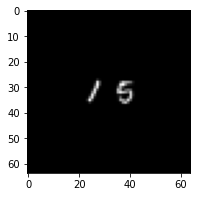

[1, 5, 10, 10, 10]


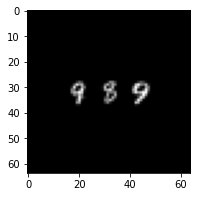

[8, 8, 8, 10, 10]


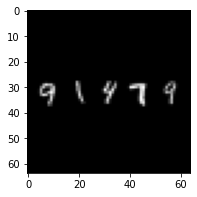

[7, 1, 8, 7, 3]


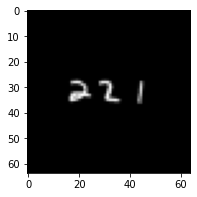

[2, 2, 1, 10, 10]


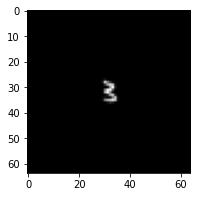

[3, 10, 10, 10, 10]


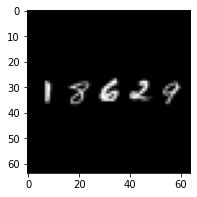

[8, 8, 6, 2, 9]


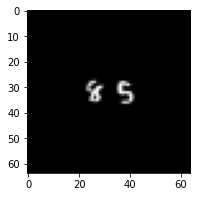

[8, 8, 10, 10, 10]


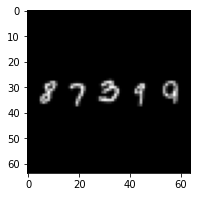

[8, 7, 3, 8, 8]


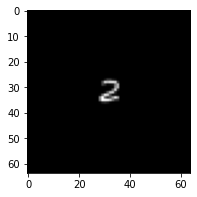

[2, 10, 10, 10, 10]


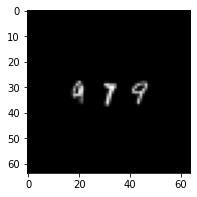

[9, 7, 8, 10, 10]


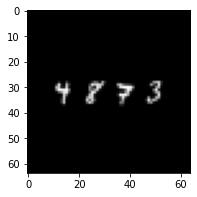

[8, 8, 7, 3, 10]


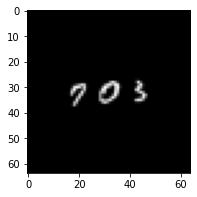

[7, 0, 3, 10, 10]


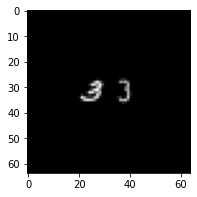

[3, 3, 10, 10, 10]


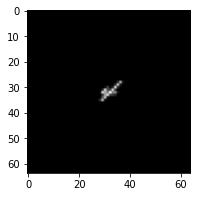

[4, 10, 10, 10, 10]


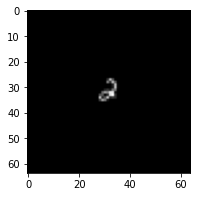

[2, 10, 10, 10, 10]


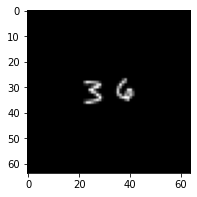

[3, 6, 10, 10, 10]


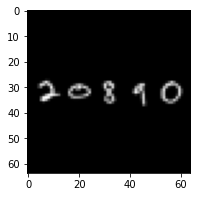

[2, 7, 8, 9, 0]


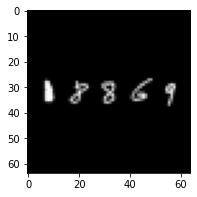

[8, 8, 8, 6, 9]


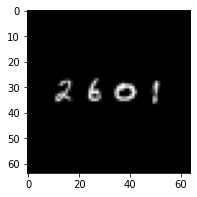

[2, 6, 0, 1, 10]


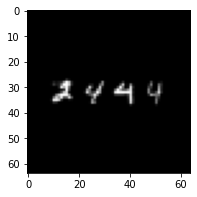

[2, 4, 4, 4, 10]


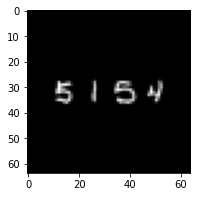

[7, 1, 5, 4, 10]


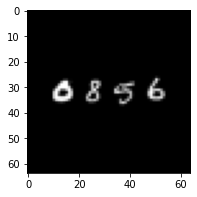

[0, 8, 5, 6, 10]


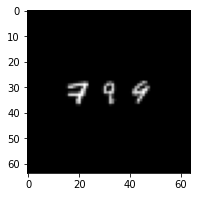

[8, 8, 8, 10, 10]


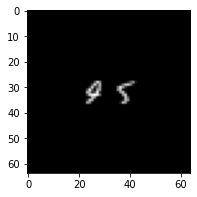

[8, 8, 10, 10, 10]


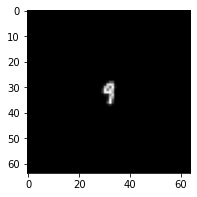

[9, 10, 10, 10, 10]


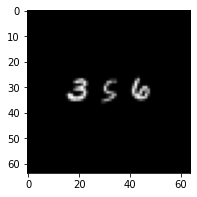

[3, 5, 6, 10, 10]


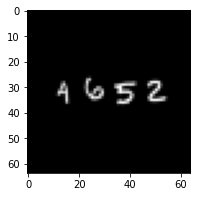

[4, 6, 5, 2, 10]


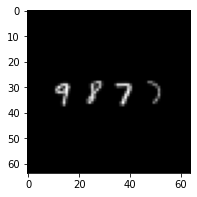

[8, 8, 7, 9, 10]


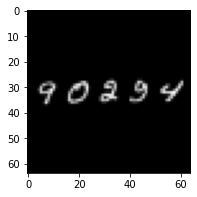

[9, 0, 2, 9, 4]


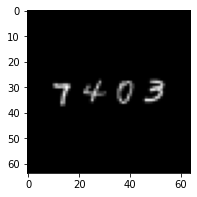

[7, 4, 0, 3, 10]


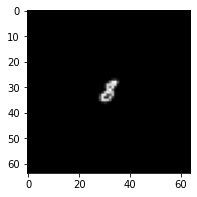

[8, 10, 10, 10, 10]


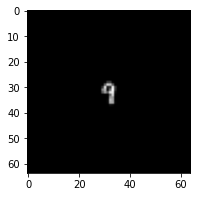

[9, 10, 10, 10, 10]


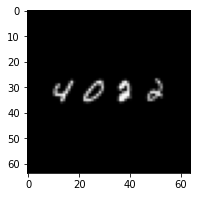

[4, 0, 8, 2, 10]


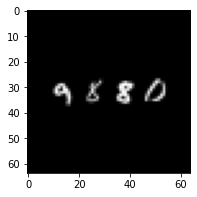

[7, 8, 8, 6, 10]


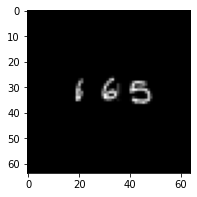

[6, 6, 5, 10, 10]


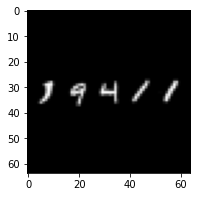

[1, 8, 4, 1, 1]


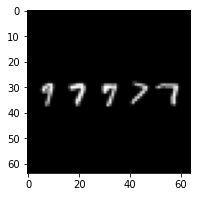

[8, 7, 7, 7, 9]


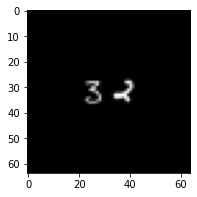

[3, 2, 10, 10, 10]


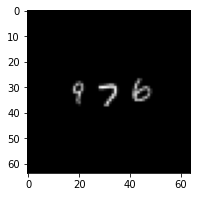

[8, 7, 6, 10, 10]


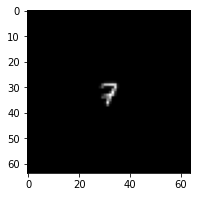

[1, 10, 10, 10, 10]


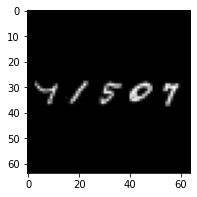

[7, 1, 5, 9, 7]


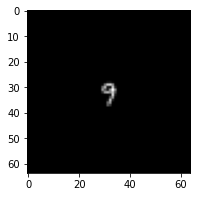

[7, 10, 10, 10, 10]


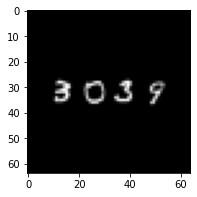

[3, 0, 3, 9, 10]


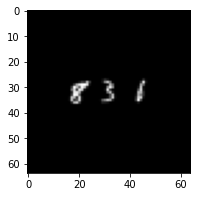

[8, 3, 4, 10, 10]


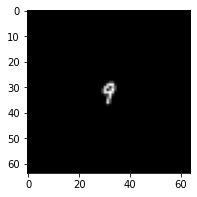

[8, 10, 10, 10, 10]


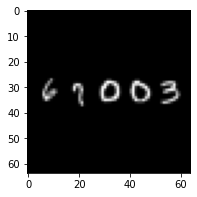

[8, 8, 0, 9, 3]


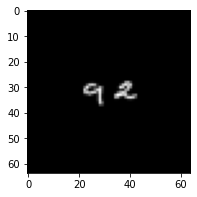

[7, 2, 10, 10, 10]


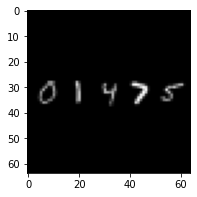

[0, 1, 8, 7, 5]


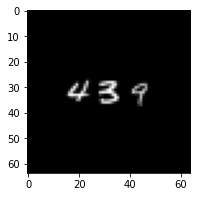

[4, 3, 8, 10, 10]


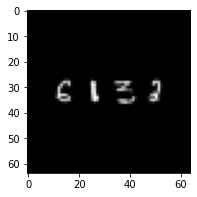

[8, 1, 3, 8, 10]


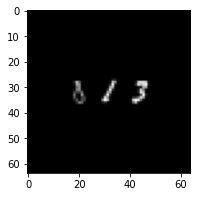

[5, 1, 3, 10, 10]


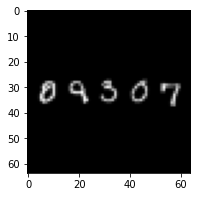

[7, 8, 3, 0, 7]


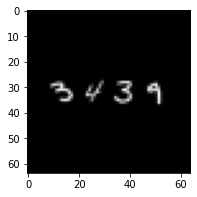

[7, 4, 3, 9, 10]


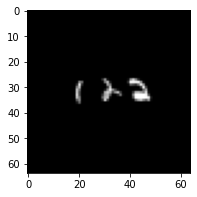

[0, 2, 2, 10, 10]


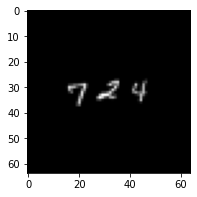

[7, 2, 4, 10, 10]


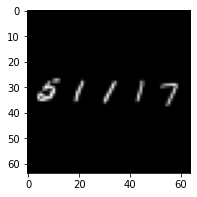

[9, 6, 1, 1, 7]


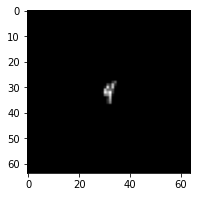

[4, 10, 10, 10, 10]


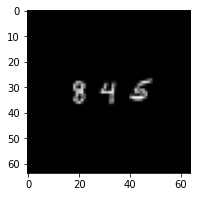

[8, 4, 5, 10, 10]


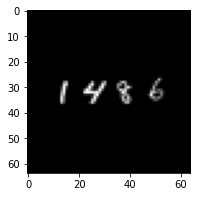

[8, 4, 8, 6, 10]


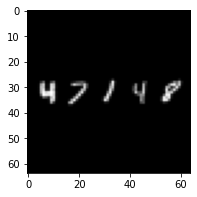

[4, 7, 1, 4, 8]


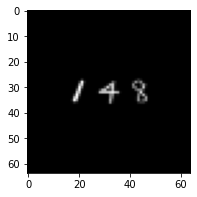

[8, 4, 8, 10, 10]


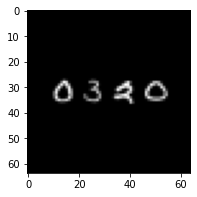

[0, 3, 2, 0, 10]


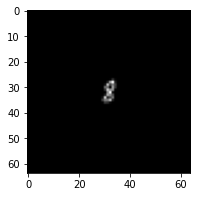

[8, 10, 10, 10, 10]


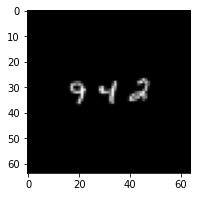

[9, 4, 2, 10, 10]


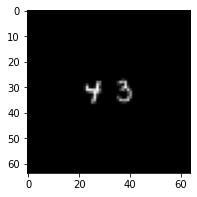

[4, 3, 10, 10, 10]


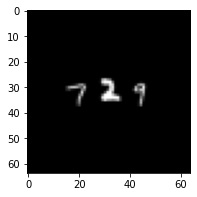

[7, 2, 9, 10, 10]


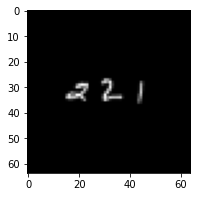

[2, 2, 7, 10, 10]


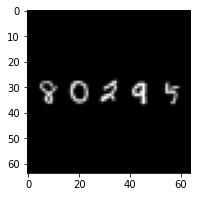

[8, 0, 2, 8, 8]


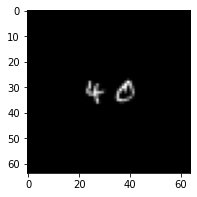

[8, 8, 10, 10, 10]


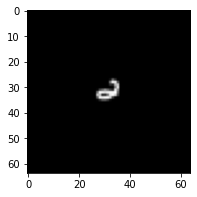

[2, 10, 10, 10, 10]


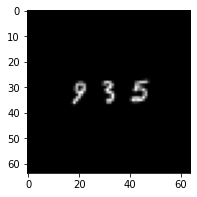

[8, 3, 5, 10, 10]


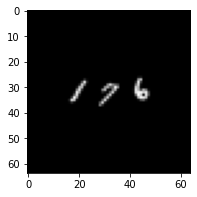

[8, 8, 4, 10, 10]


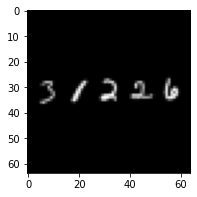

[3, 1, 2, 2, 6]


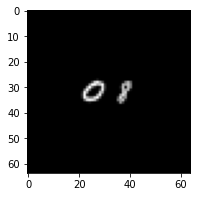

[2, 8, 10, 10, 10]


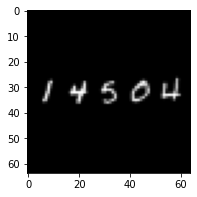

[1, 4, 5, 0, 4]


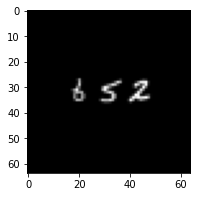

[6, 5, 2, 10, 10]


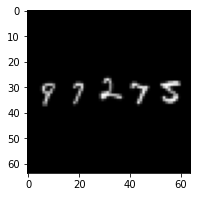

[8, 7, 2, 7, 3]


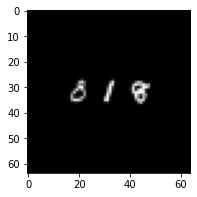

[8, 1, 8, 10, 10]


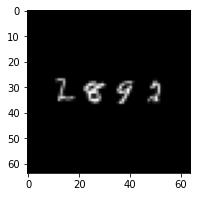

[2, 8, 9, 7, 10]


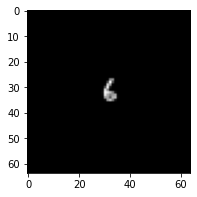

[6, 10, 10, 10, 10]


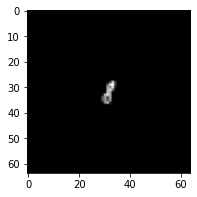

[8, 10, 10, 10, 10]


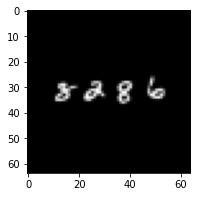

[8, 2, 8, 6, 10]


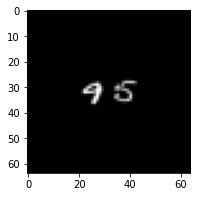

[8, 6, 10, 10, 10]


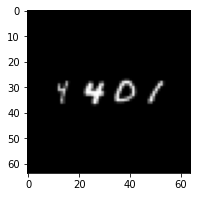

[8, 4, 0, 1, 10]


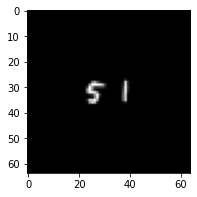

[8, 1, 10, 10, 10]


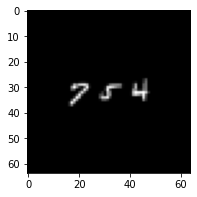

[7, 5, 4, 10, 10]


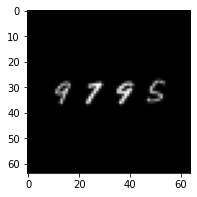

[9, 7, 9, 5, 10]


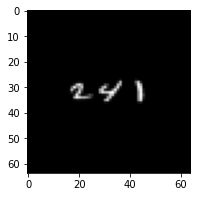

[4, 8, 1, 10, 10]


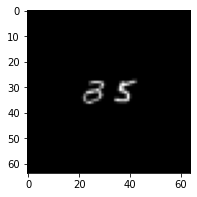

[3, 5, 10, 10, 10]


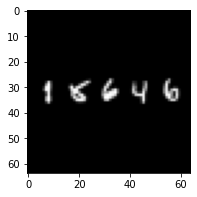

[1, 8, 6, 4, 6]


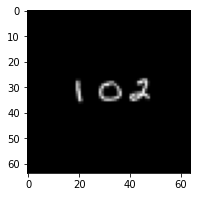

[8, 0, 2, 10, 10]


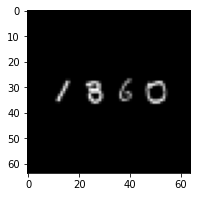

[8, 8, 6, 5, 10]


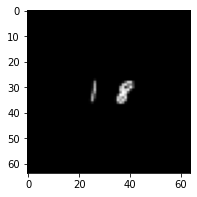

[4, 8, 10, 10, 10]


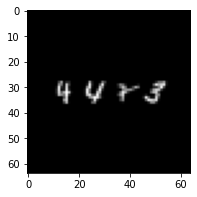

[8, 8, 7, 3, 10]


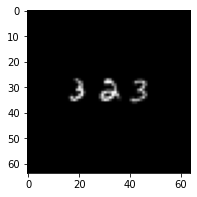

[3, 2, 3, 10, 10]


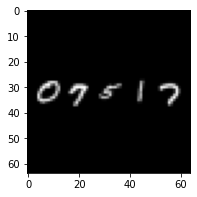

[2, 7, 5, 1, 7]


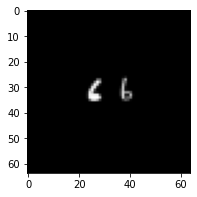

[6, 1, 10, 10, 10]


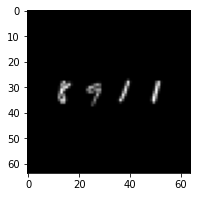

[8, 8, 1, 4, 10]


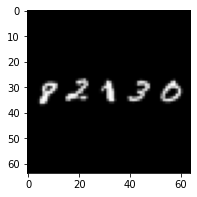

[8, 2, 8, 3, 0]


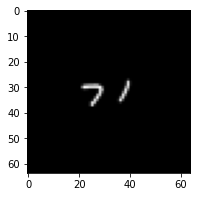

[7, 1, 10, 10, 10]


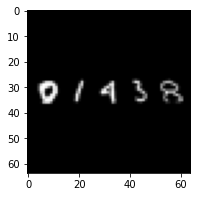

[0, 1, 4, 3, 8]


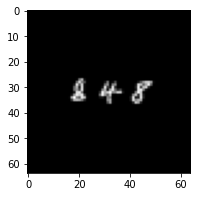

[8, 4, 8, 10, 10]


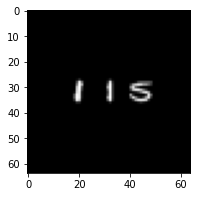

[8, 1, 5, 10, 10]


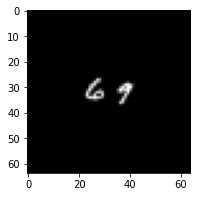

[6, 3, 10, 10, 10]


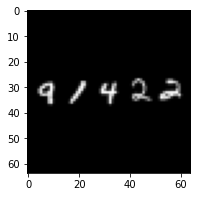

[9, 3, 4, 2, 2]


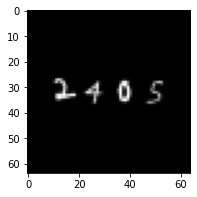

[2, 4, 8, 3, 10]


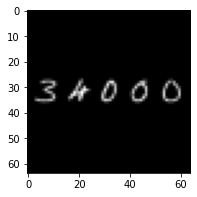

[3, 4, 0, 0, 0]


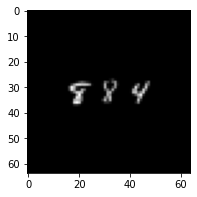

[8, 8, 4, 10, 10]


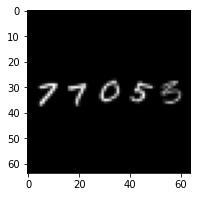

[8, 7, 0, 5, 8]


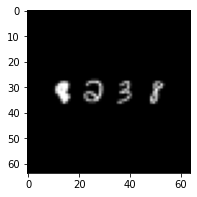

[8, 2, 3, 8, 10]


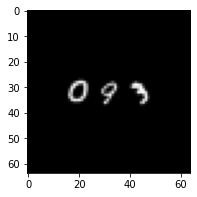

[0, 9, 3, 10, 10]


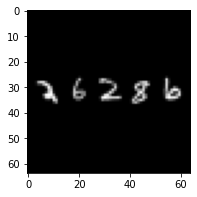

[2, 6, 2, 8, 6]


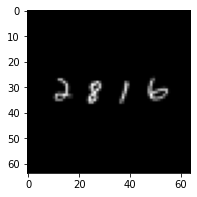

[2, 8, 1, 6, 10]


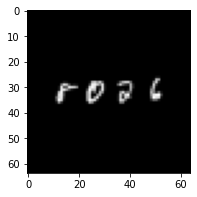

[8, 0, 2, 6, 10]


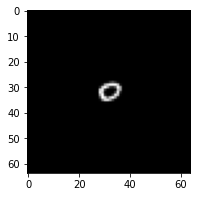

[0, 10, 10, 10, 10]


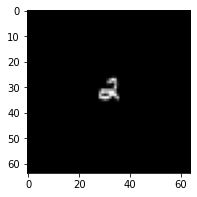

[2, 10, 10, 10, 10]


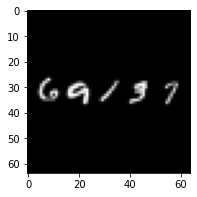

[6, 9, 1, 3, 9]


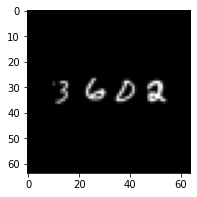

[3, 6, 0, 2, 10]


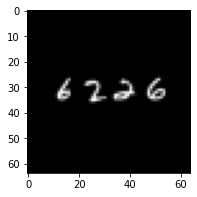

[6, 2, 2, 6, 10]


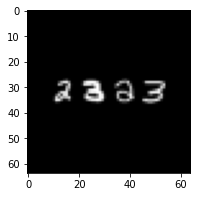

[2, 3, 2, 3, 10]


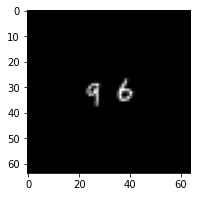

[9, 6, 10, 10, 10]


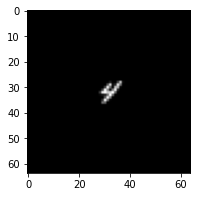

[8, 10, 10, 10, 10]


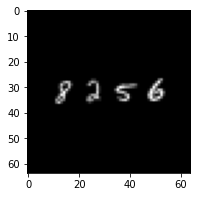

[8, 2, 5, 6, 10]


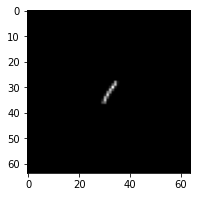

[1, 10, 10, 10, 10]


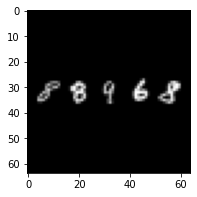

[8, 8, 9, 6, 8]


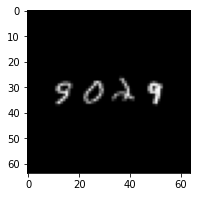

[9, 0, 2, 9, 10]


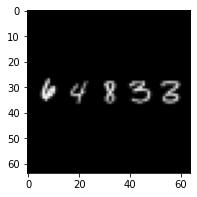

[8, 4, 8, 3, 8]


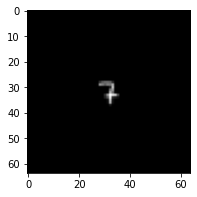

[7, 10, 10, 10, 10]


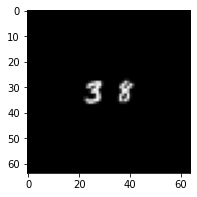

[3, 8, 10, 10, 10]


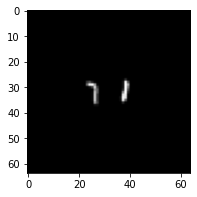

[7, 9, 10, 10, 10]


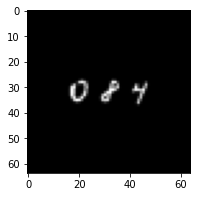

[0, 8, 7, 10, 10]


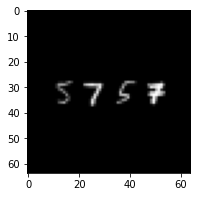

[5, 7, 5, 8, 10]


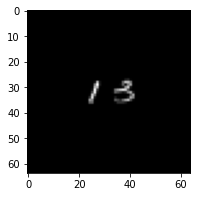

[1, 3, 10, 10, 10]


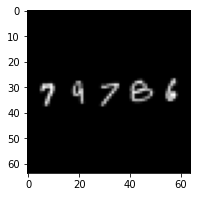

[7, 9, 7, 7, 6]


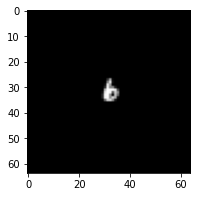

[6, 10, 10, 10, 10]


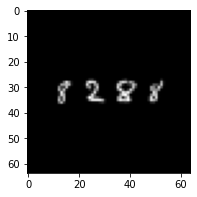

[8, 2, 8, 8, 10]


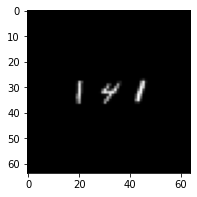

[8, 4, 1, 10, 10]


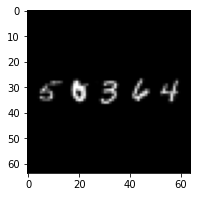

[8, 8, 3, 6, 4]


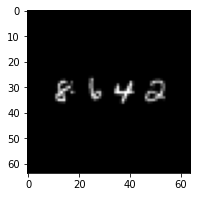

[8, 6, 4, 2, 10]


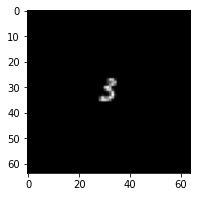

[3, 10, 10, 10, 10]


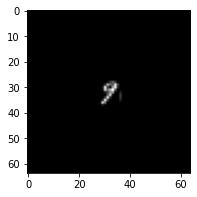

[8, 10, 10, 10, 10]


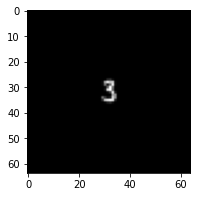

[3, 10, 10, 10, 10]


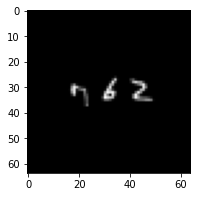

[7, 6, 3, 10, 10]


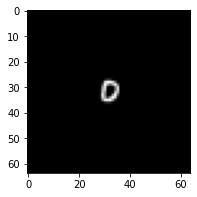

[0, 10, 10, 10, 10]


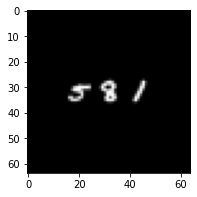

[5, 8, 1, 10, 10]


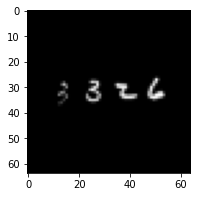

[7, 3, 2, 6, 10]


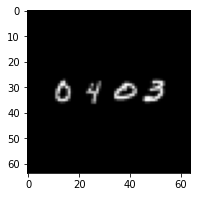

[0, 4, 0, 3, 10]


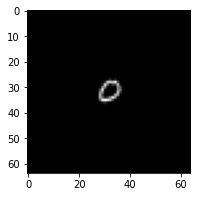

[0, 10, 10, 10, 10]


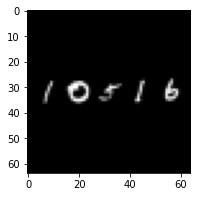

[8, 8, 5, 1, 6]


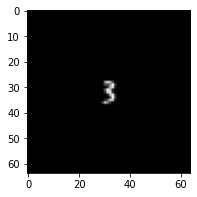

[3, 10, 10, 10, 10]


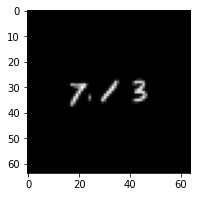

[7, 8, 3, 10, 10]


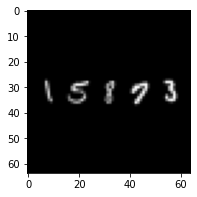

[8, 5, 8, 7, 3]


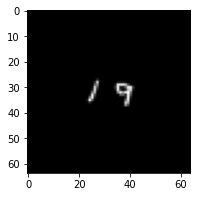

[1, 9, 10, 10, 10]


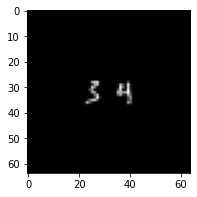

[5, 4, 10, 10, 10]


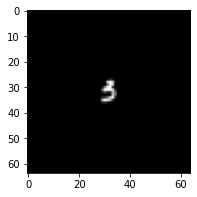

[3, 10, 10, 10, 10]


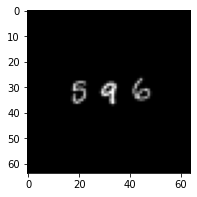

[0, 8, 8, 10, 10]


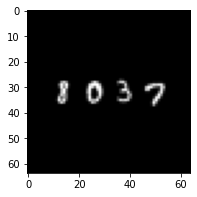

[8, 0, 3, 7, 10]


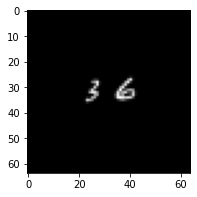

[3, 6, 10, 10, 10]


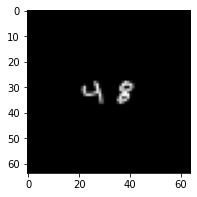

[4, 8, 10, 10, 10]


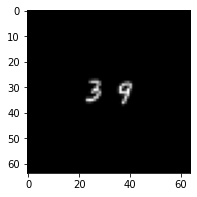

[3, 9, 10, 10, 10]


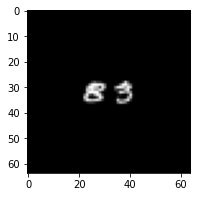

[8, 3, 10, 10, 10]


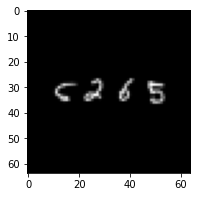

[5, 2, 6, 8, 10]


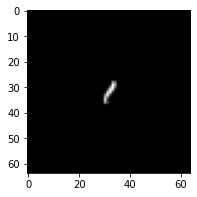

[8, 10, 10, 10, 10]


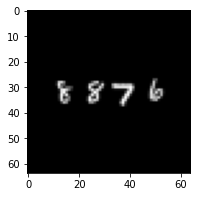

[8, 8, 7, 6, 10]


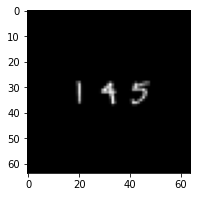

[5, 9, 9, 10, 10]


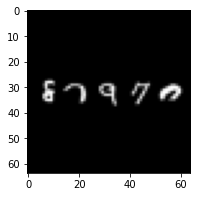

[8, 7, 8, 7, 0]


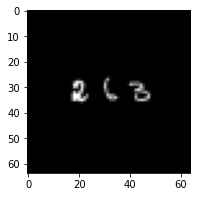

[2, 6, 3, 10, 10]


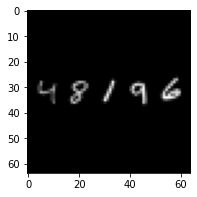

[4, 8, 1, 9, 6]


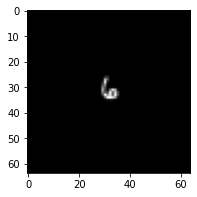

[6, 10, 10, 10, 10]


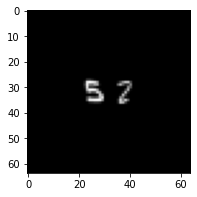

[5, 2, 10, 10, 10]


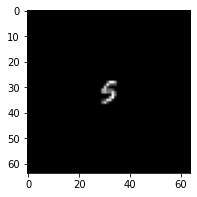

[5, 10, 10, 10, 10]


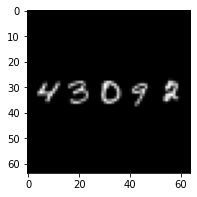

[8, 3, 0, 8, 8]


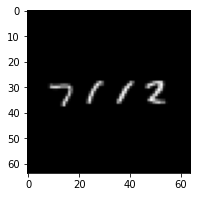

[7, 8, 1, 8, 10]


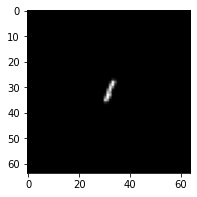

[1, 10, 10, 10, 10]


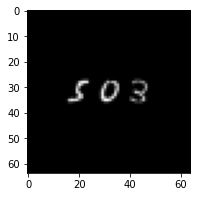

[5, 0, 3, 10, 10]


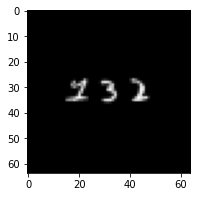

[1, 3, 2, 10, 10]


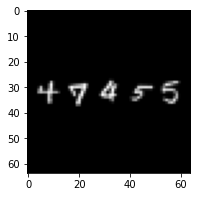

[8, 7, 9, 5, 5]


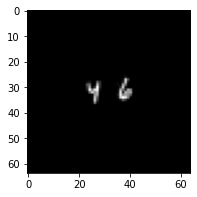

[4, 6, 10, 10, 10]


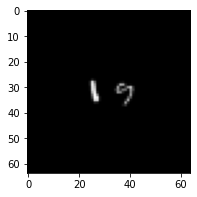

[5, 9, 10, 10, 10]


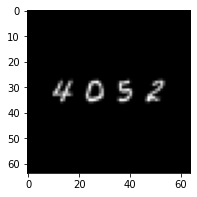

[8, 0, 5, 2, 10]


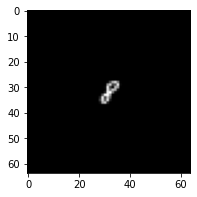

[8, 10, 10, 10, 10]


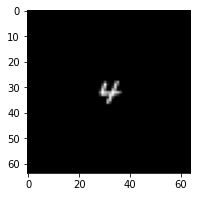

[4, 10, 10, 10, 10]


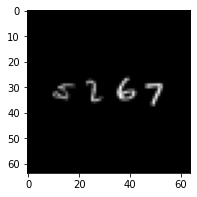

[5, 2, 6, 7, 10]


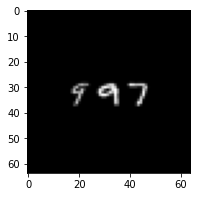

[8, 8, 2, 10, 10]


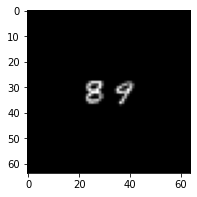

[3, 8, 10, 10, 10]


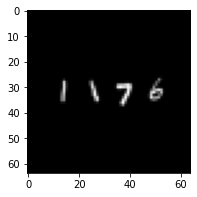

[6, 1, 7, 6, 10]


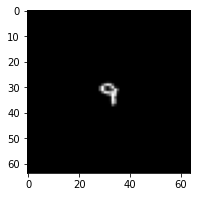

[7, 10, 10, 10, 10]


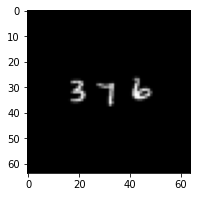

[9, 7, 8, 10, 10]


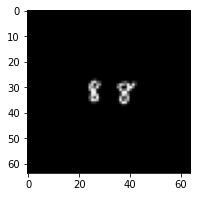

[8, 8, 10, 10, 10]


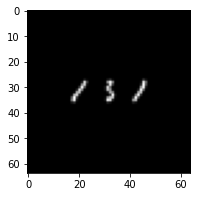

[4, 3, 7, 10, 10]


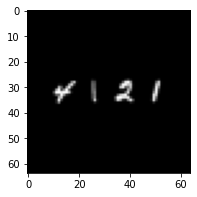

[4, 1, 2, 1, 10]


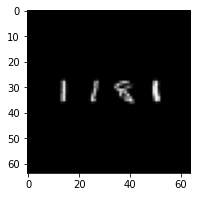

[8, 1, 8, 1, 10]


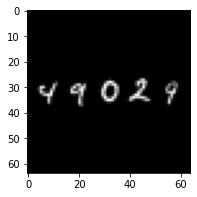

[8, 9, 9, 2, 8]


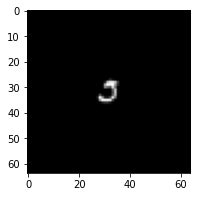

[5, 10, 10, 10, 10]


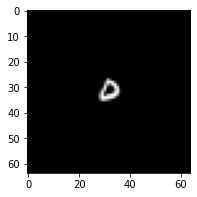

[0, 10, 10, 10, 10]


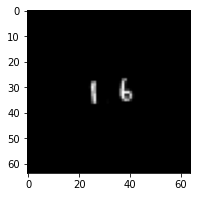

[8, 1, 10, 10, 10]


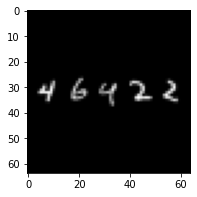

[8, 6, 8, 2, 3]


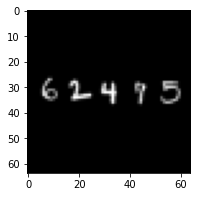

[6, 2, 4, 8, 5]


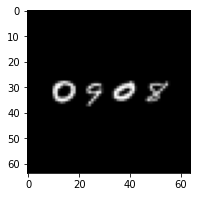

[7, 9, 9, 8, 10]


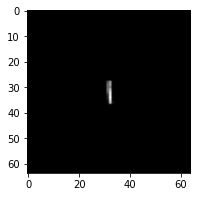

[1, 10, 10, 10, 10]


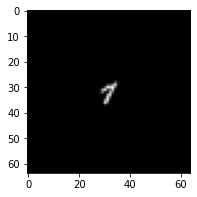

[8, 10, 10, 10, 10]


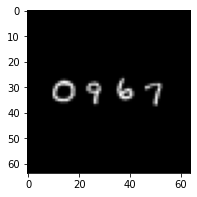

[2, 8, 6, 7, 10]


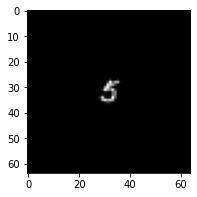

[5, 10, 10, 10, 10]


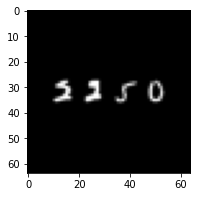

[2, 2, 5, 0, 10]


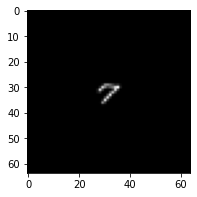

[7, 10, 10, 10, 10]


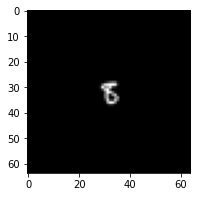

[8, 10, 10, 10, 10]


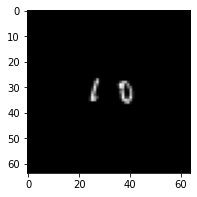

[6, 1, 10, 10, 10]


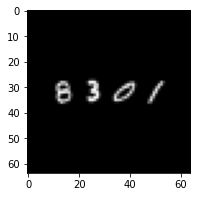

[8, 3, 0, 1, 10]


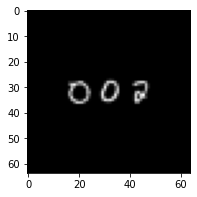

[0, 0, 2, 10, 10]


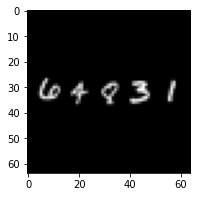

[6, 4, 8, 3, 1]


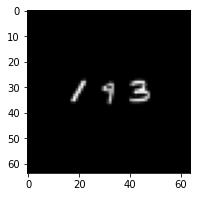

[8, 9, 3, 10, 10]


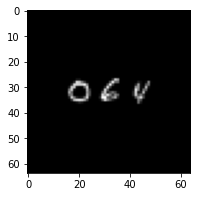

[0, 6, 4, 10, 10]


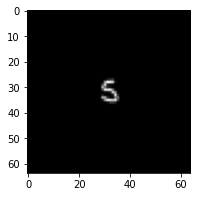

[5, 10, 10, 10, 10]


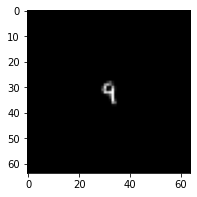

[8, 10, 10, 10, 10]


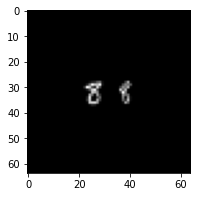

[8, 8, 10, 10, 10]


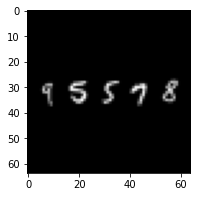

[8, 5, 5, 7, 8]


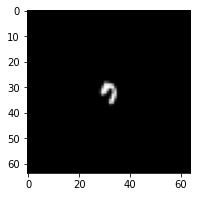

[9, 10, 10, 10, 10]


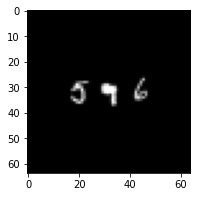

[3, 9, 6, 10, 10]


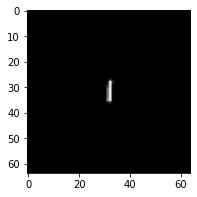

[1, 10, 10, 10, 10]


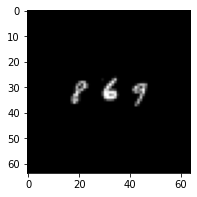

[8, 6, 9, 10, 10]


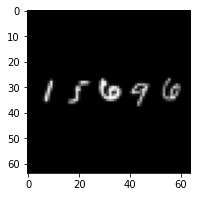

[1, 8, 8, 8, 4]


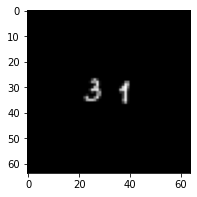

[3, 3, 10, 10, 10]


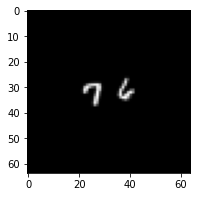

[7, 4, 10, 10, 10]


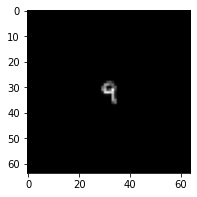

[8, 10, 10, 10, 10]


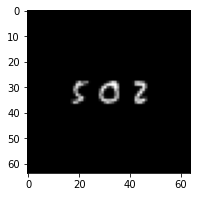

[5, 3, 3, 10, 10]


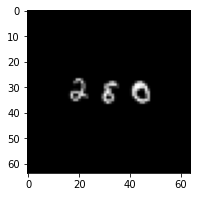

[2, 8, 8, 10, 10]


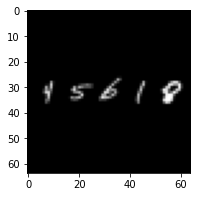

[8, 5, 6, 1, 8]


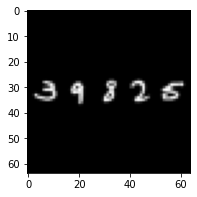

[3, 9, 8, 2, 5]


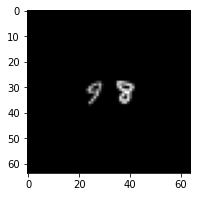

[8, 8, 10, 10, 10]


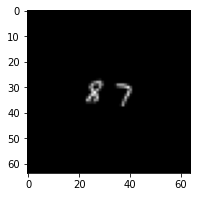

[8, 7, 10, 10, 10]


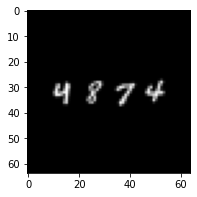

[4, 8, 7, 4, 10]


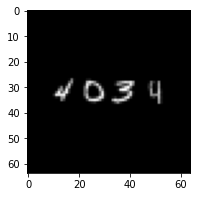

[4, 0, 3, 8, 10]


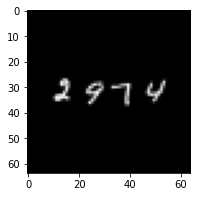

[2, 8, 7, 4, 10]


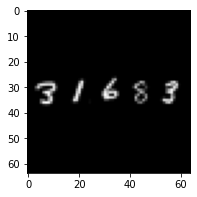

[3, 1, 6, 8, 3]


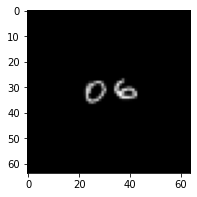

[0, 6, 10, 10, 10]


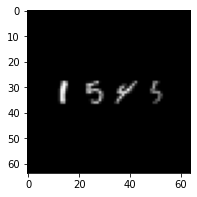

[6, 5, 8, 3, 10]


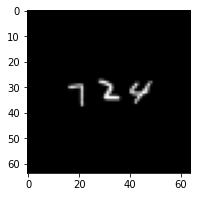

[7, 2, 8, 10, 10]


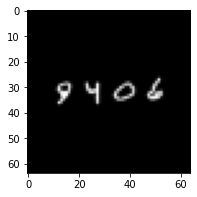

[8, 4, 0, 6, 10]


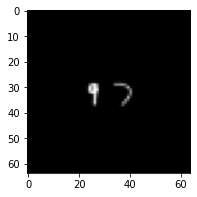

[8, 2, 10, 10, 10]


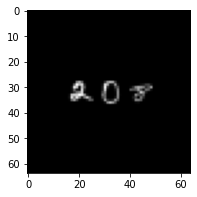

[2, 6, 8, 10, 10]


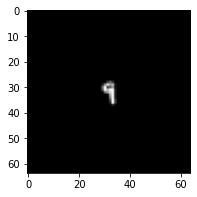

[8, 10, 10, 10, 10]


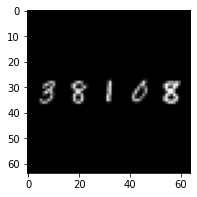

[3, 8, 1, 0, 8]


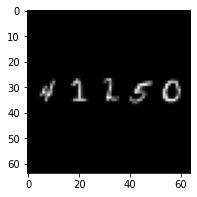

[4, 2, 2, 5, 0]


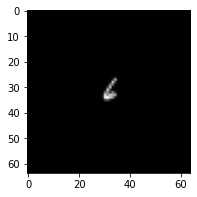

[6, 10, 10, 10, 10]


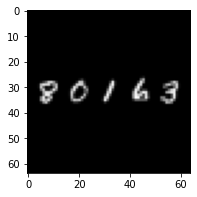

[8, 0, 1, 6, 3]


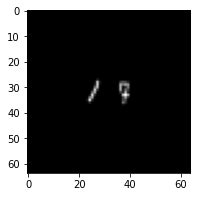

[4, 8, 10, 10, 10]


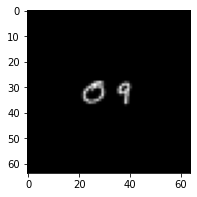

[2, 9, 10, 10, 10]


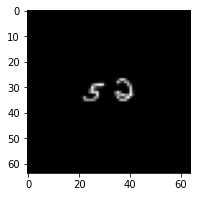

[5, 2, 10, 10, 10]


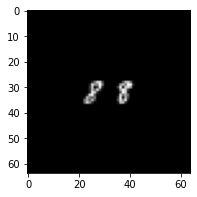

[8, 8, 10, 10, 10]


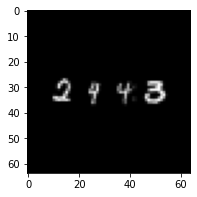

[2, 4, 4, 8, 10]


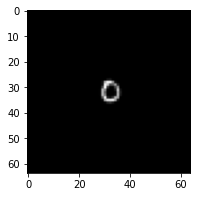

[0, 10, 10, 10, 10]


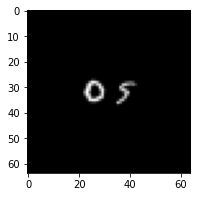

[0, 5, 10, 10, 10]


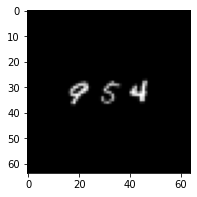

[8, 8, 4, 10, 10]


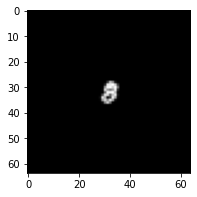

[8, 10, 10, 10, 10]


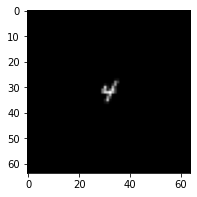

[4, 10, 10, 10, 10]


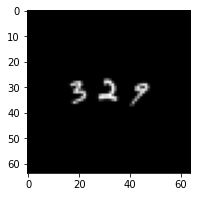

[7, 2, 8, 10, 10]


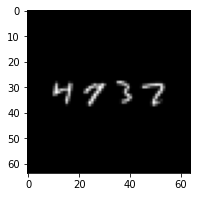

[7, 8, 3, 7, 10]


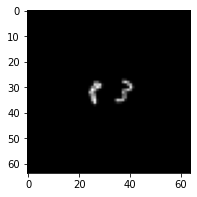

[8, 3, 10, 10, 10]


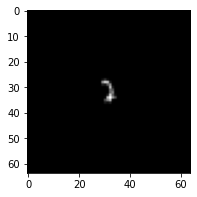

[2, 10, 10, 10, 10]


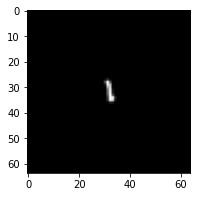

[1, 10, 10, 10, 10]


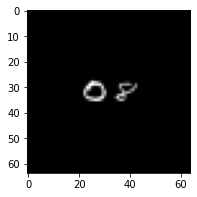

[2, 8, 10, 10, 10]


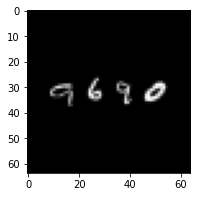

[7, 9, 8, 0, 10]


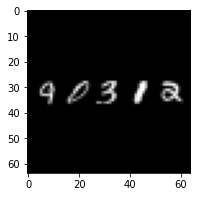

[8, 8, 3, 8, 8]


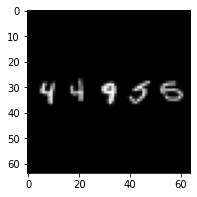

[8, 4, 9, 5, 5]


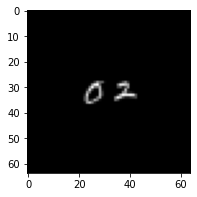

[0, 2, 10, 10, 10]


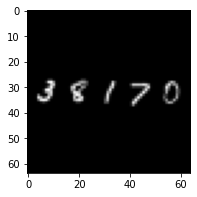

[1, 8, 1, 7, 0]


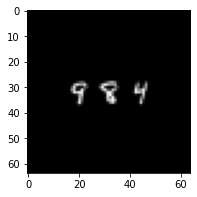

[8, 8, 8, 10, 10]


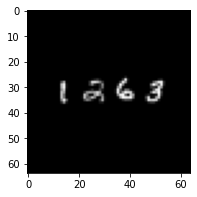

[6, 2, 6, 3, 10]


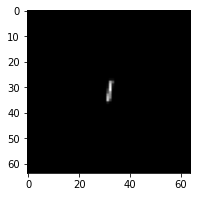

[1, 10, 10, 10, 10]


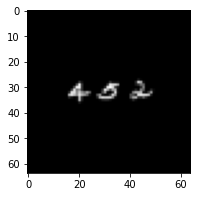

[4, 5, 2, 10, 10]


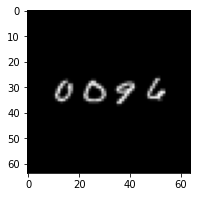

[0, 0, 9, 6, 10]


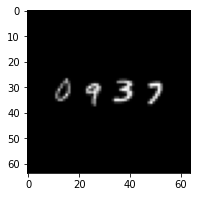

[9, 8, 3, 7, 10]


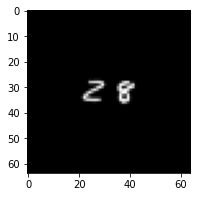

[3, 8, 10, 10, 10]


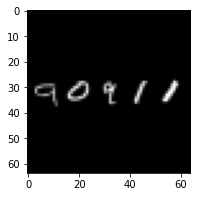

[7, 9, 8, 1, 8]


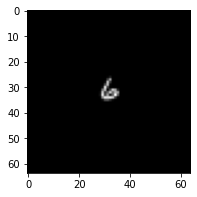

[6, 10, 10, 10, 10]


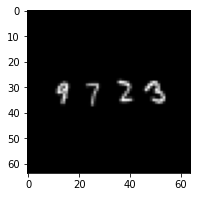

[8, 7, 2, 2, 10]


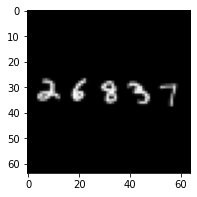

[2, 9, 8, 3, 7]


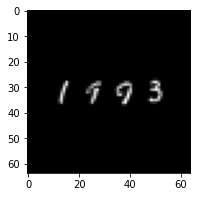

[6, 8, 8, 3, 10]


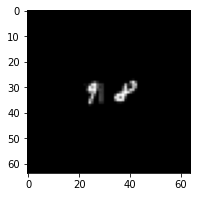

[8, 8, 10, 10, 10]


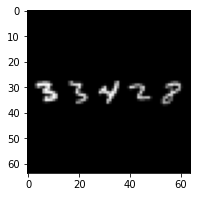

[3, 3, 4, 3, 8]


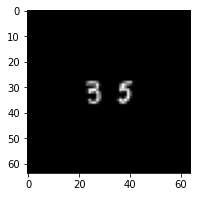

[3, 3, 10, 10, 10]


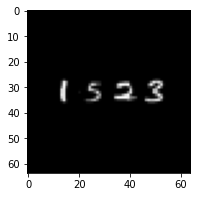

[6, 5, 2, 3, 10]


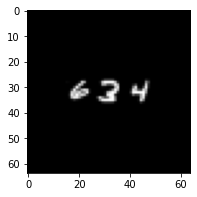

[6, 3, 4, 10, 10]


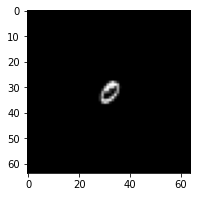

[8, 10, 10, 10, 10]


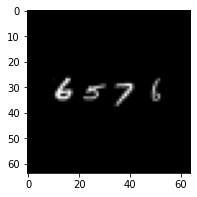

[9, 5, 7, 1, 10]


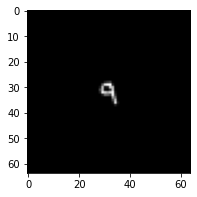

[8, 10, 10, 10, 10]


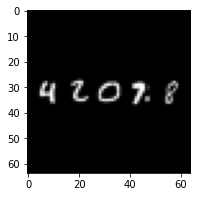

[4, 6, 0, 8, 8]


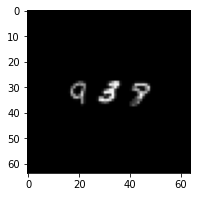

[8, 3, 8, 10, 10]


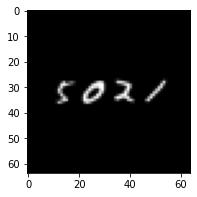

[5, 0, 2, 8, 10]


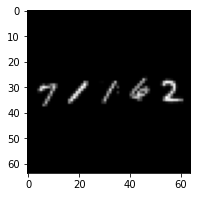

[7, 8, 1, 8, 2]


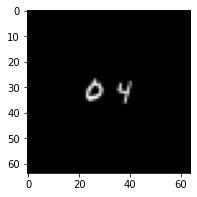

[0, 4, 10, 10, 10]


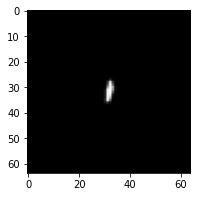

[1, 10, 10, 10, 10]


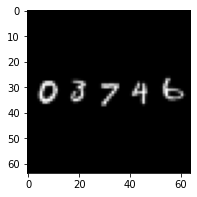

[0, 2, 7, 8, 5]


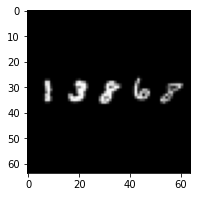

[8, 3, 8, 6, 8]


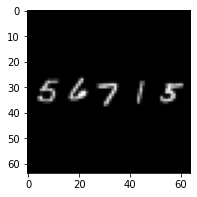

[2, 9, 7, 1, 5]


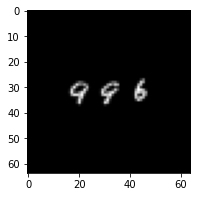

[9, 8, 3, 10, 10]


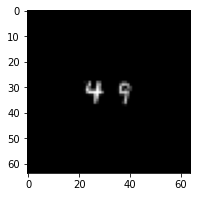

[8, 8, 10, 10, 10]


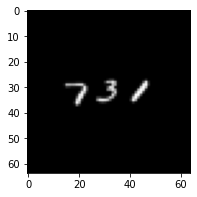

[7, 3, 1, 10, 10]


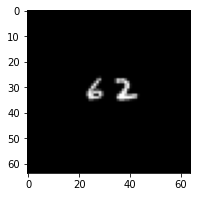

[6, 2, 10, 10, 10]


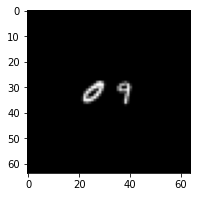

[8, 9, 10, 10, 10]


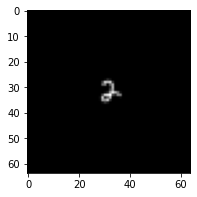

[2, 10, 10, 10, 10]


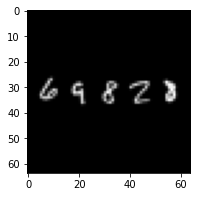

[6, 9, 8, 2, 3]


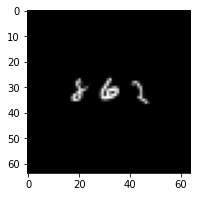

[8, 6, 2, 10, 10]


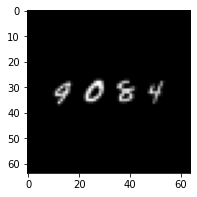

[4, 0, 8, 4, 10]


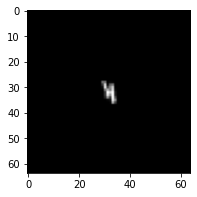

[8, 10, 10, 10, 10]


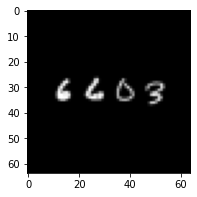

[9, 9, 0, 3, 10]


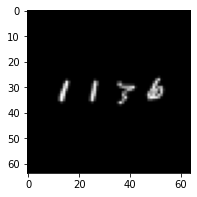

[8, 1, 3, 6, 10]


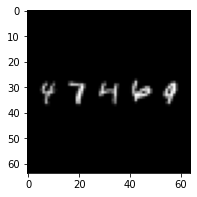

[4, 7, 4, 6, 3]


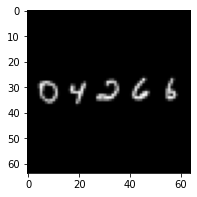

[0, 4, 2, 6, 6]


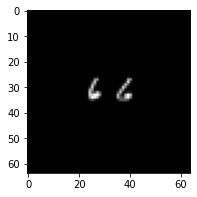

[6, 6, 10, 10, 10]


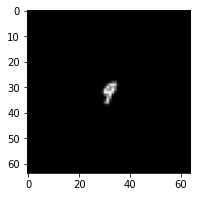

[8, 10, 10, 10, 10]


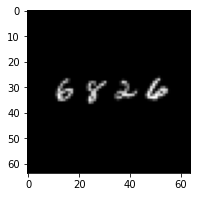

[6, 8, 2, 6, 10]


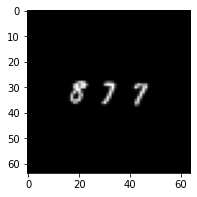

[8, 7, 7, 10, 10]


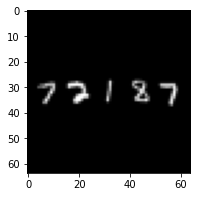

[7, 2, 1, 3, 7]


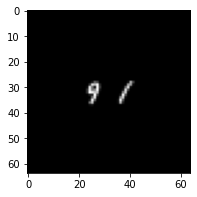

[8, 1, 10, 10, 10]


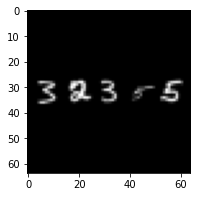

[3, 2, 3, 5, 5]


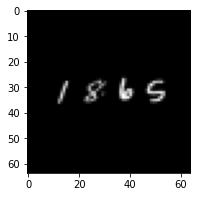

[8, 8, 6, 8, 10]


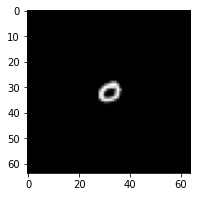

[0, 10, 10, 10, 10]


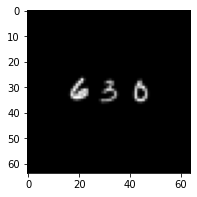

[6, 3, 6, 10, 10]


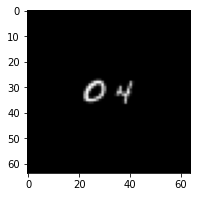

[0, 4, 10, 10, 10]


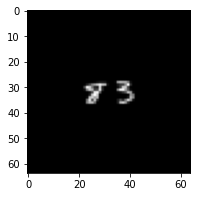

[8, 3, 10, 10, 10]


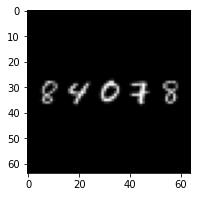

[8, 4, 0, 7, 8]


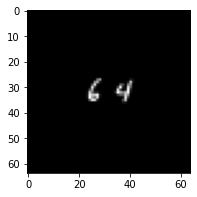

[6, 4, 10, 10, 10]


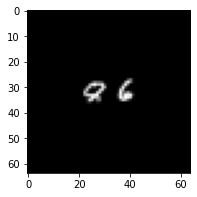

[8, 6, 10, 10, 10]


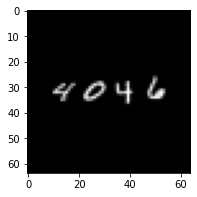

[8, 0, 4, 6, 10]


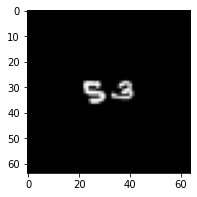

[3, 8, 10, 10, 10]


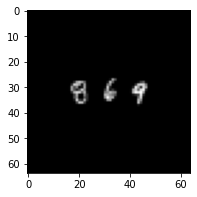

[8, 6, 9, 10, 10]


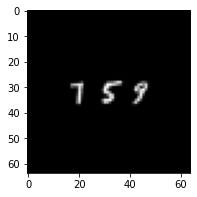

[1, 5, 8, 10, 10]


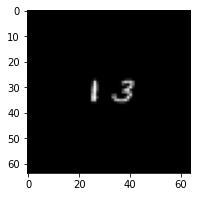

[1, 5, 10, 10, 10]


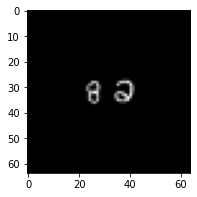

[8, 2, 10, 10, 10]


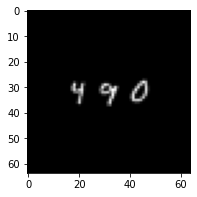

[8, 8, 0, 10, 10]


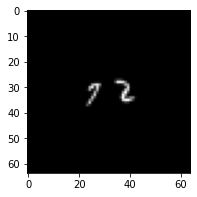

[8, 1, 10, 10, 10]


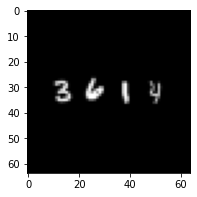

[3, 6, 8, 3, 10]


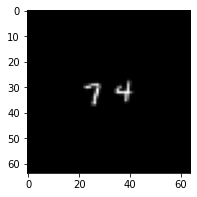

[7, 8, 10, 10, 10]


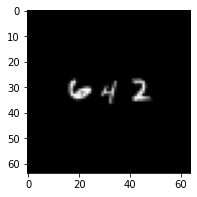

[6, 4, 2, 10, 10]


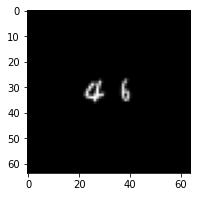

[8, 1, 10, 10, 10]


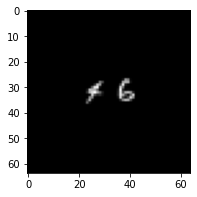

[8, 6, 10, 10, 10]


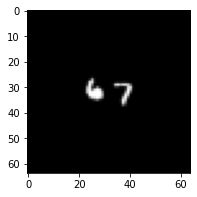

[4, 7, 10, 10, 10]


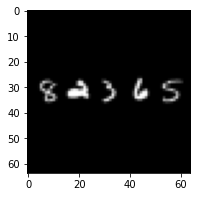

[8, 2, 3, 6, 5]


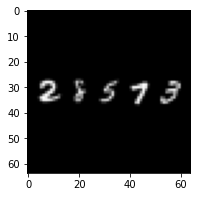

[2, 8, 5, 7, 3]


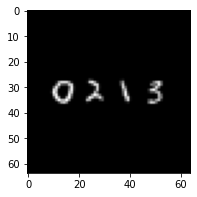

[2, 2, 1, 3, 10]


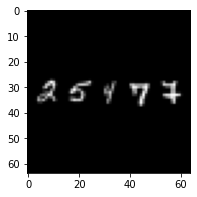

[3, 5, 4, 7, 3]


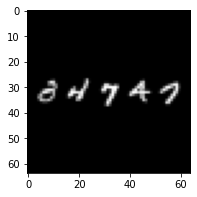

[3, 4, 7, 8, 7]


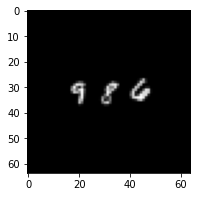

[9, 8, 6, 10, 10]


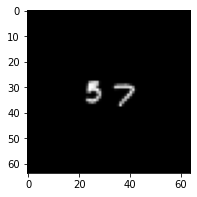

[7, 7, 10, 10, 10]


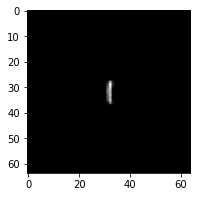

[1, 10, 10, 10, 10]


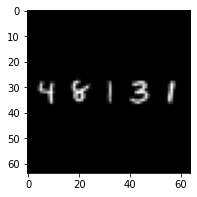

[4, 8, 1, 3, 1]


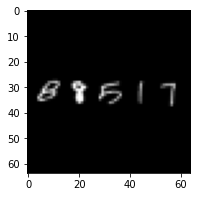

[4, 8, 5, 1, 8]


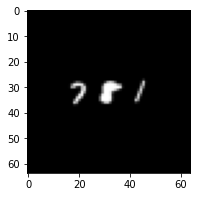

[7, 8, 1, 10, 10]


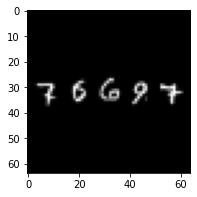

[7, 6, 6, 8, 7]


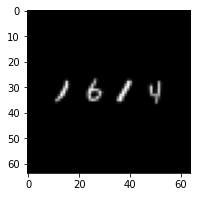

[1, 6, 1, 1, 10]


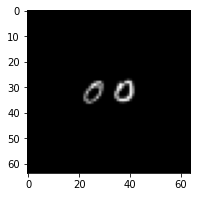

[7, 0, 10, 10, 10]


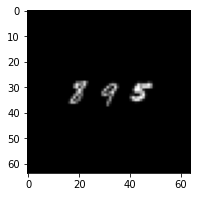

[8, 9, 5, 10, 10]


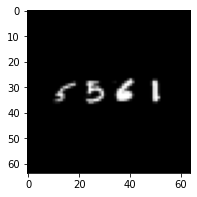

[0, 5, 6, 1, 10]


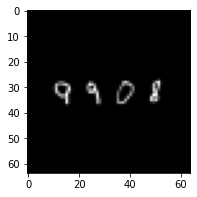

[9, 9, 2, 8, 10]


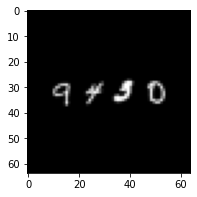

[8, 8, 3, 8, 10]


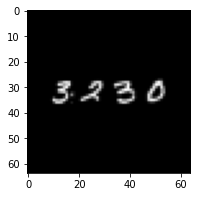

[3, 2, 3, 0, 10]


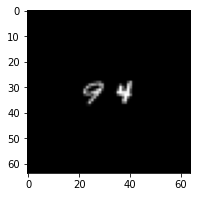

[8, 4, 10, 10, 10]


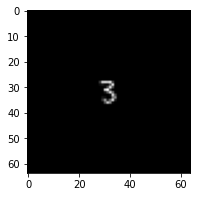

[3, 10, 10, 10, 10]


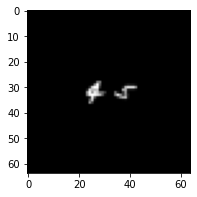

[8, 5, 10, 10, 10]


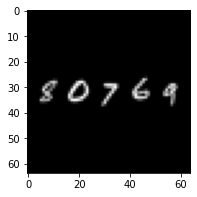

[8, 0, 7, 6, 9]


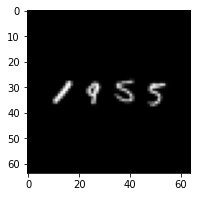

[8, 8, 3, 5, 10]


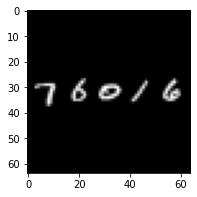

[7, 6, 9, 1, 6]


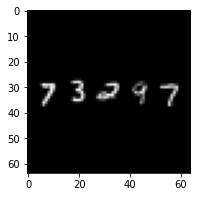

[7, 3, 2, 8, 7]


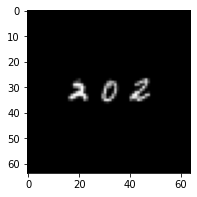

[2, 0, 2, 10, 10]


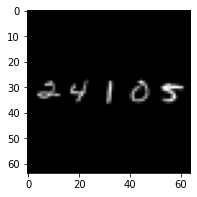

[2, 4, 1, 0, 5]


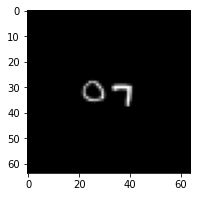

[0, 7, 10, 10, 10]


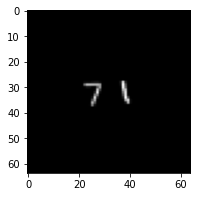

[7, 1, 10, 10, 10]


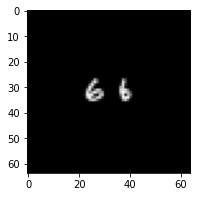

[2, 1, 10, 10, 10]


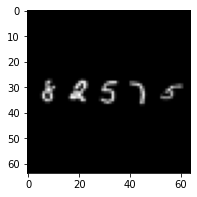

[8, 2, 5, 7, 5]


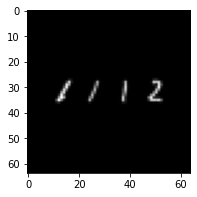

[8, 1, 1, 2, 10]


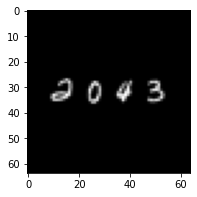

[2, 0, 4, 3, 10]


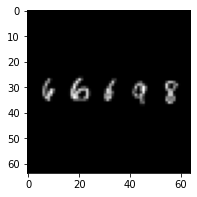

[8, 6, 6, 9, 8]


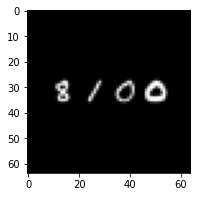

[8, 1, 0, 0, 10]


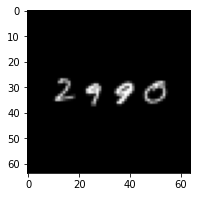

[4, 9, 8, 0, 10]


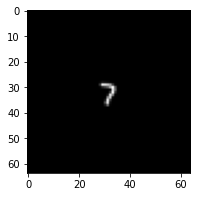

[3, 10, 10, 10, 10]


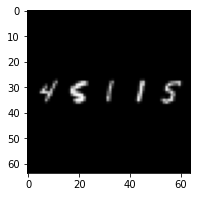

[8, 8, 1, 1, 5]


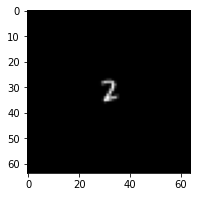

[2, 10, 10, 10, 10]


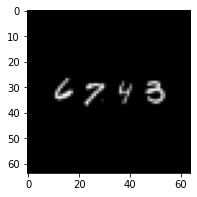

[9, 7, 4, 3, 10]


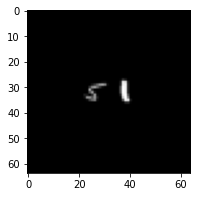

[5, 1, 10, 10, 10]


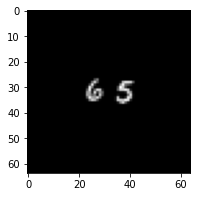

[6, 5, 10, 10, 10]


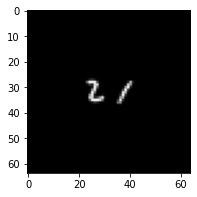

[2, 1, 10, 10, 10]


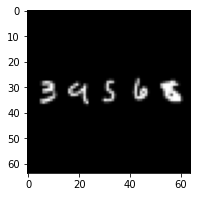

[3, 9, 5, 6, 8]


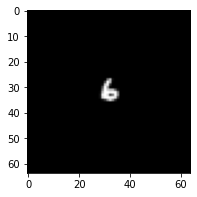

[6, 10, 10, 10, 10]


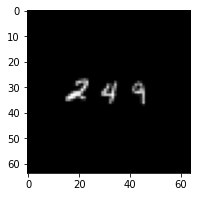

[2, 4, 9, 10, 10]


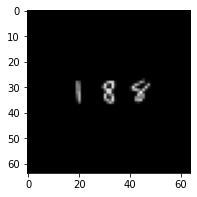

[8, 8, 8, 10, 10]


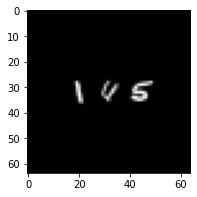

[8, 8, 5, 10, 10]


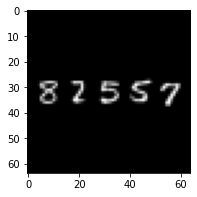

[3, 2, 5, 5, 7]


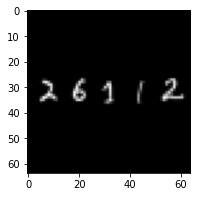

[2, 6, 1, 1, 2]


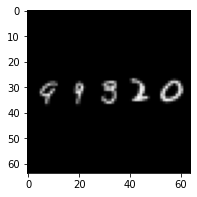

[2, 9, 3, 2, 0]


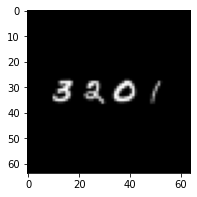

[3, 2, 0, 1, 10]


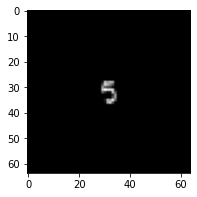

[3, 10, 10, 10, 10]


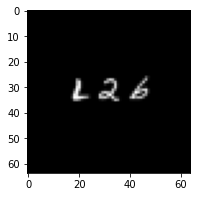

[2, 2, 8, 10, 10]


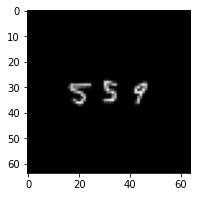

[5, 5, 8, 10, 10]


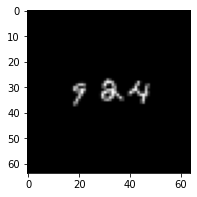

[8, 2, 4, 10, 10]


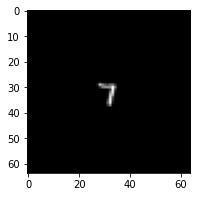

[7, 10, 10, 10, 10]


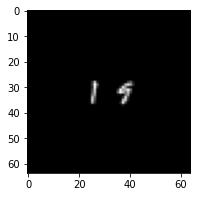

[6, 9, 10, 10, 10]


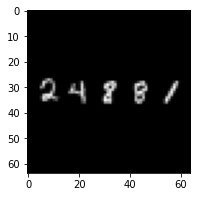

[2, 4, 8, 8, 7]


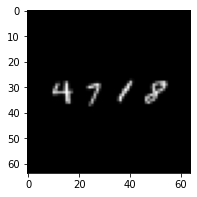

[4, 7, 8, 8, 10]


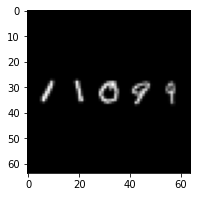

[8, 1, 0, 8, 9]


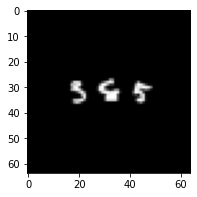

[5, 8, 8, 10, 10]


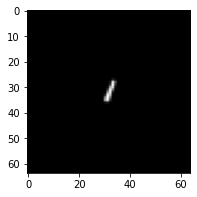

[1, 10, 10, 10, 10]


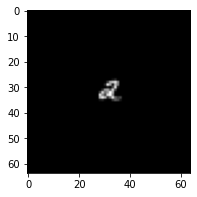

[2, 10, 10, 10, 10]


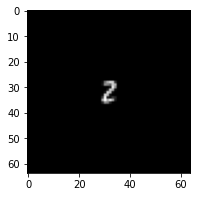

[2, 10, 10, 10, 10]


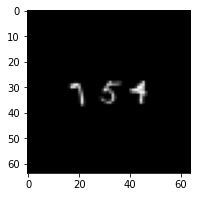

[1, 5, 9, 10, 10]


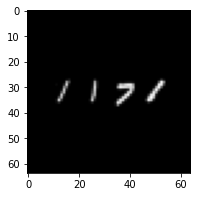

[6, 1, 7, 1, 10]


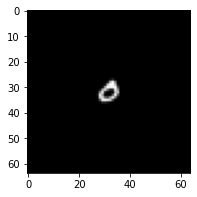

[0, 10, 10, 10, 10]


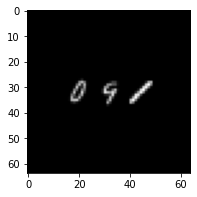

[2, 8, 8, 10, 10]


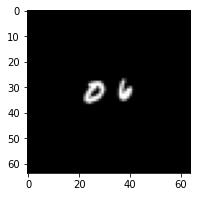

[0, 6, 10, 10, 10]


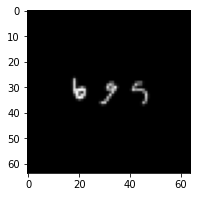

[7, 8, 5, 10, 10]


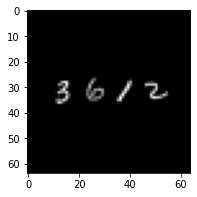

[3, 6, 1, 2, 10]


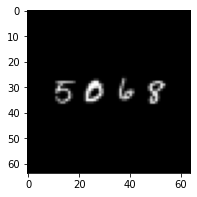

[5, 0, 6, 8, 10]


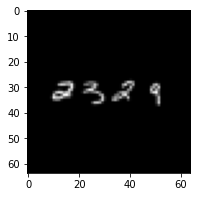

[2, 3, 5, 3, 10]


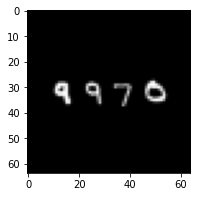

[8, 8, 7, 2, 10]


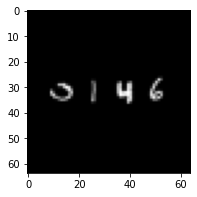

[3, 1, 4, 6, 10]


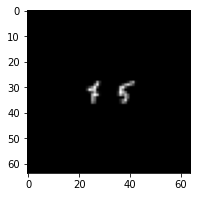

[8, 8, 10, 10, 10]


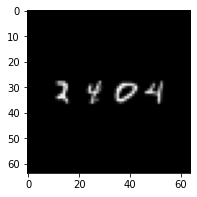

[2, 8, 8, 4, 10]


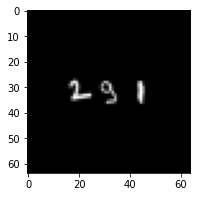

[2, 3, 1, 10, 10]


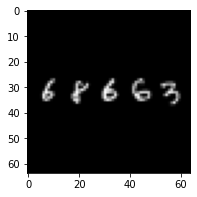

[6, 8, 6, 6, 3]


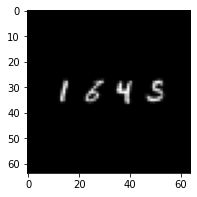

[8, 8, 4, 5, 10]


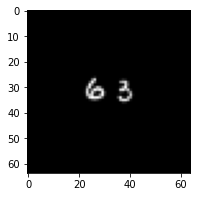

[6, 3, 10, 10, 10]


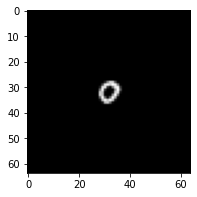

[0, 10, 10, 10, 10]


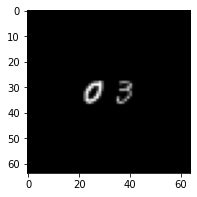

[9, 0, 10, 10, 10]


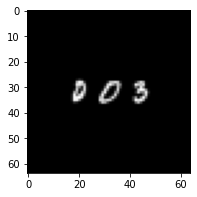

[8, 0, 3, 10, 10]


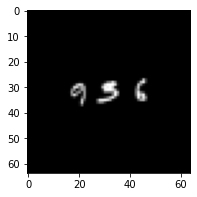

[8, 3, 1, 10, 10]


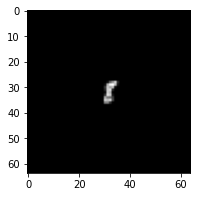

[8, 10, 10, 10, 10]


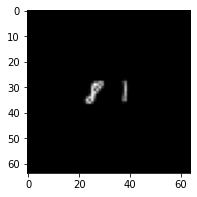

[8, 4, 10, 10, 10]


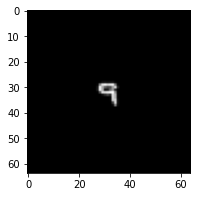

[3, 10, 10, 10, 10]


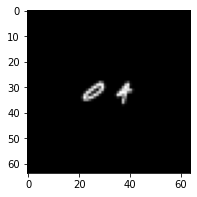

[9, 8, 10, 10, 10]


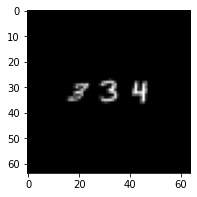

[3, 3, 4, 10, 10]


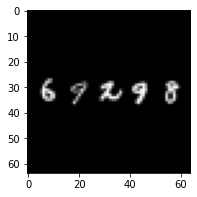

[8, 9, 2, 9, 8]


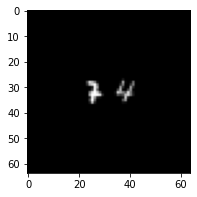

[8, 4, 10, 10, 10]


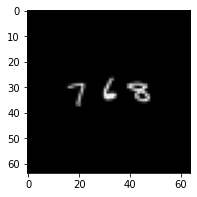

[7, 6, 8, 10, 10]


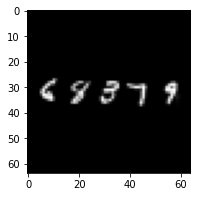

[5, 8, 3, 7, 9]


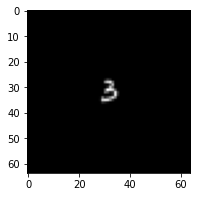

[3, 10, 10, 10, 10]


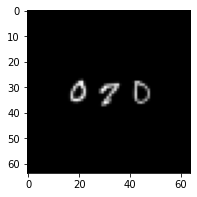

[2, 8, 1, 10, 10]


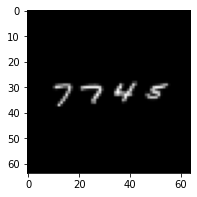

[7, 7, 4, 9, 10]


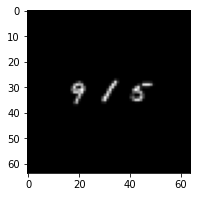

[9, 1, 5, 10, 10]


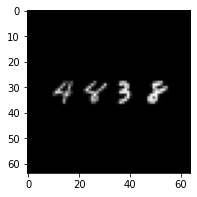

[8, 8, 7, 8, 10]


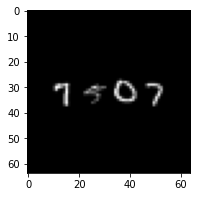

[7, 5, 0, 7, 10]


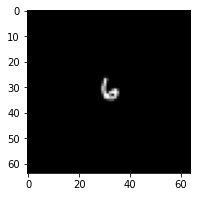

[6, 10, 10, 10, 10]


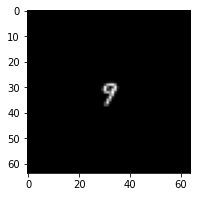

[8, 10, 10, 10, 10]


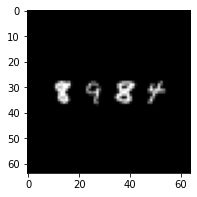

[8, 8, 8, 8, 10]


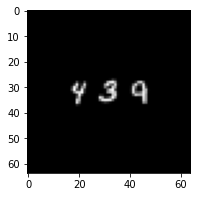

[4, 3, 9, 10, 10]


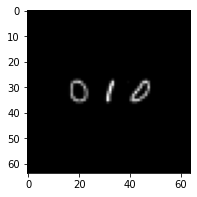

[3, 1, 6, 10, 10]


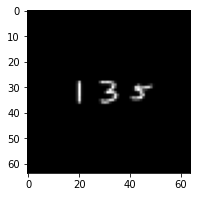

[1, 3, 5, 10, 10]


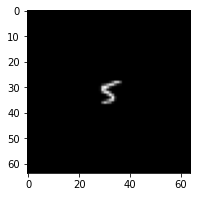

[5, 10, 10, 10, 10]


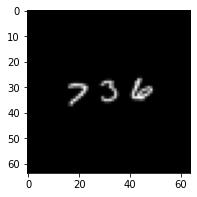

[7, 2, 8, 10, 10]


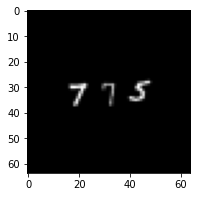

[7, 7, 2, 10, 10]


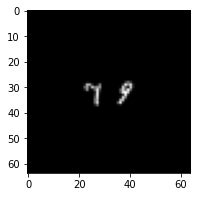

[7, 8, 10, 10, 10]


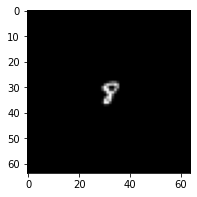

[8, 10, 10, 10, 10]


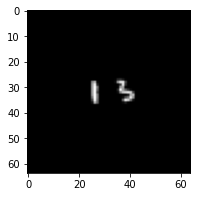

[8, 3, 10, 10, 10]


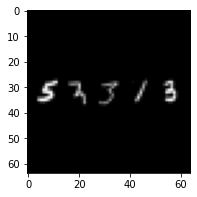

[5, 3, 3, 1, 3]


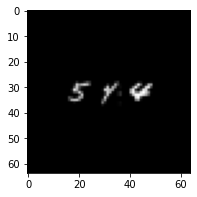

[5, 8, 8, 10, 10]


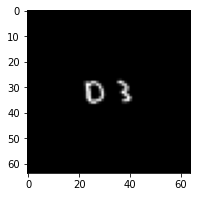

[0, 3, 10, 10, 10]


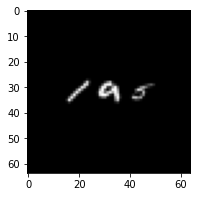

[8, 7, 5, 10, 10]


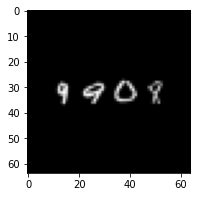

[9, 9, 0, 8, 10]


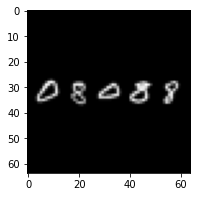

[2, 8, 9, 3, 8]


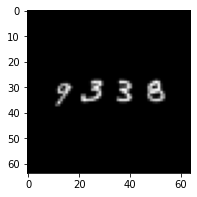

[8, 3, 3, 8, 10]


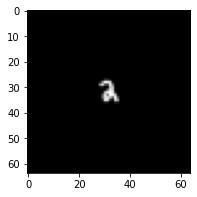

[2, 10, 10, 10, 10]


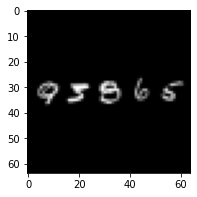

[8, 3, 8, 6, 5]


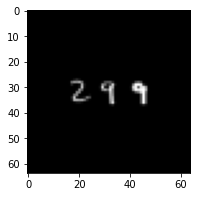

[6, 8, 9, 10, 10]


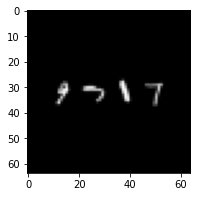

[8, 7, 1, 7, 10]


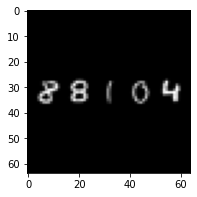

[8, 8, 1, 0, 4]


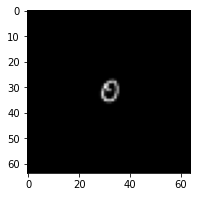

[9, 10, 10, 10, 10]


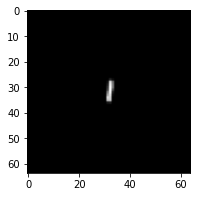

[1, 10, 10, 10, 10]


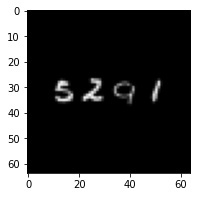

[5, 2, 7, 1, 10]


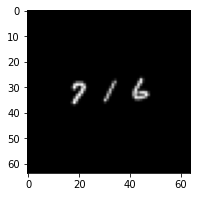

[2, 1, 6, 10, 10]


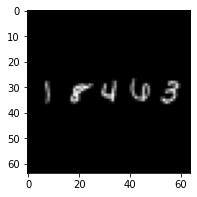

[8, 8, 4, 6, 3]


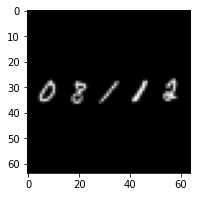

[0, 8, 1, 1, 2]


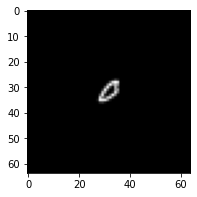

[0, 10, 10, 10, 10]


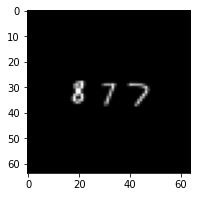

[8, 7, 7, 10, 10]


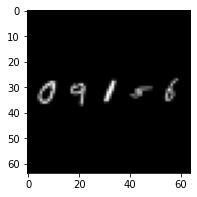

[2, 9, 1, 8, 6]


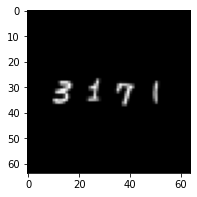

[3, 8, 7, 4, 10]


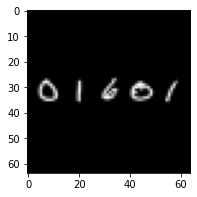

[0, 1, 6, 0, 1]


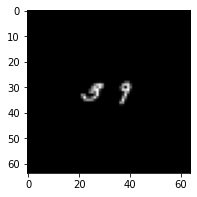

[2, 8, 10, 10, 10]


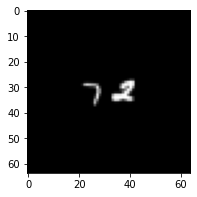

[7, 2, 10, 10, 10]


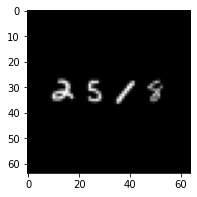

[2, 5, 1, 8, 10]


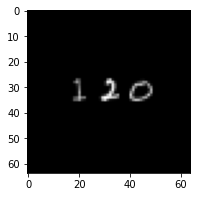

[5, 2, 0, 10, 10]


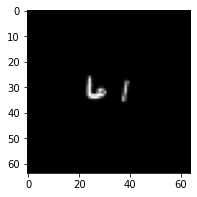

[6, 7, 10, 10, 10]


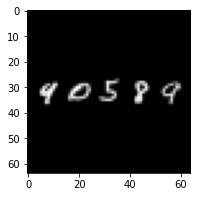

[8, 0, 5, 8, 8]


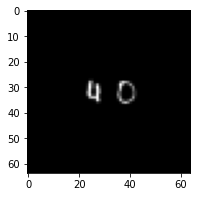

[4, 0, 10, 10, 10]


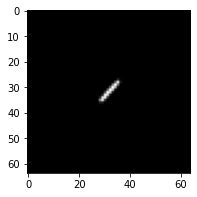

[1, 10, 10, 10, 10]


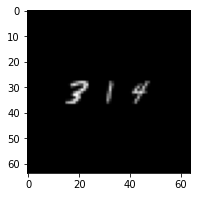

[8, 1, 4, 10, 10]


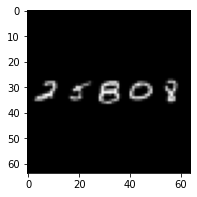

[2, 5, 8, 2, 8]


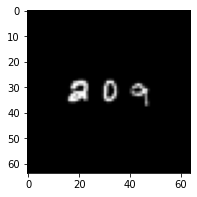

[2, 0, 9, 10, 10]


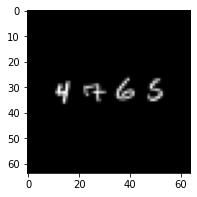

[8, 7, 6, 5, 10]


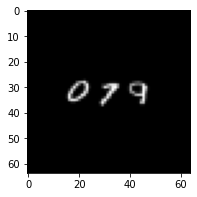

[2, 7, 9, 10, 10]


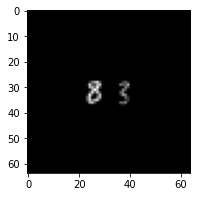

[8, 3, 10, 10, 10]


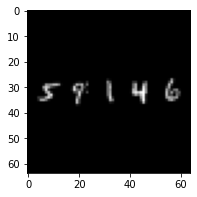

[5, 8, 1, 4, 6]


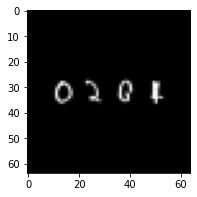

[0, 2, 8, 1, 10]


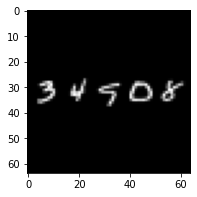

[3, 4, 5, 0, 8]


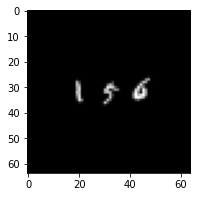

[6, 5, 6, 10, 10]


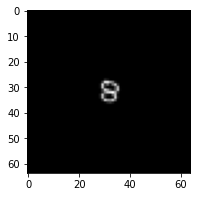

[3, 10, 10, 10, 10]


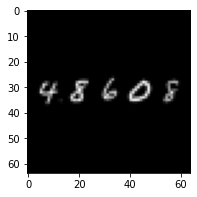

[4, 8, 6, 0, 8]


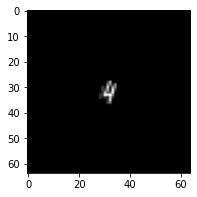

[8, 10, 10, 10, 10]


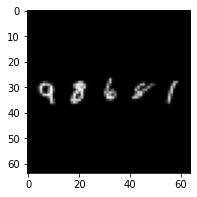

[9, 8, 6, 8, 1]


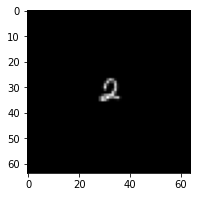

[2, 10, 10, 10, 10]


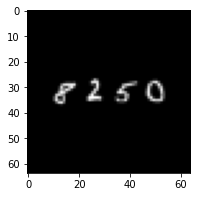

[8, 2, 5, 0, 10]


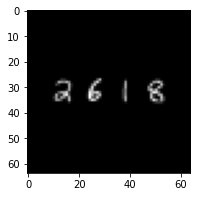

[2, 6, 1, 8, 10]


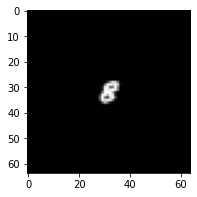

[8, 10, 10, 10, 10]


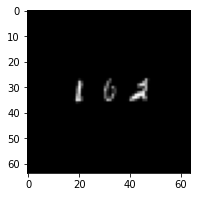

[6, 6, 2, 10, 10]


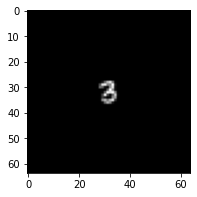

[3, 10, 10, 10, 10]


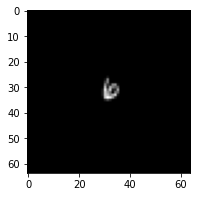

[0, 10, 10, 10, 10]


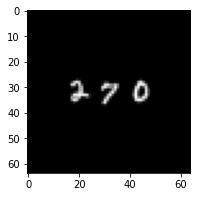

[2, 7, 0, 10, 10]


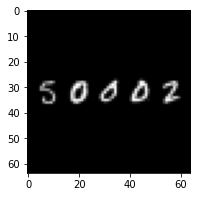

[8, 0, 0, 0, 2]


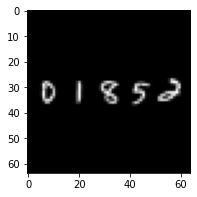

[2, 1, 8, 5, 8]


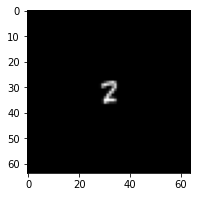

[2, 10, 10, 10, 10]


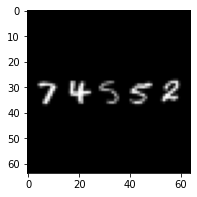

[7, 4, 5, 5, 8]


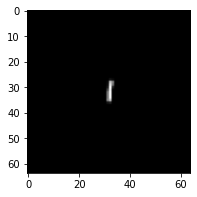

[1, 10, 10, 10, 10]


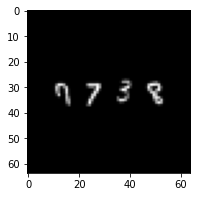

[7, 7, 3, 8, 10]


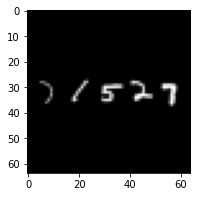

[2, 8, 5, 2, 7]


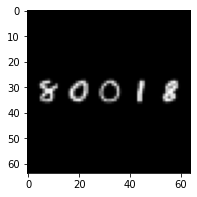

[8, 0, 0, 1, 8]


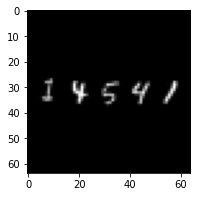

[5, 4, 5, 4, 7]


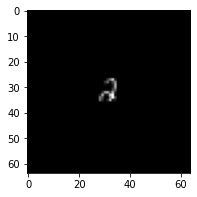

[2, 10, 10, 10, 10]


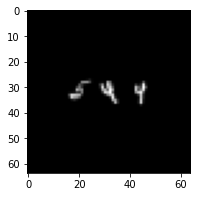

[4, 8, 8, 10, 10]


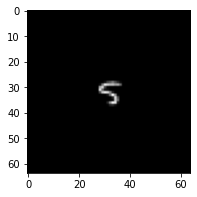

[5, 10, 10, 10, 10]


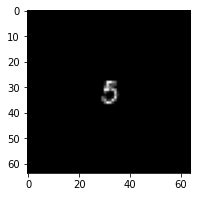

[5, 10, 10, 10, 10]


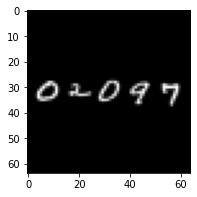

[0, 4, 0, 8, 7]


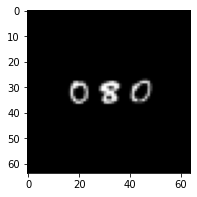

[0, 8, 0, 10, 10]


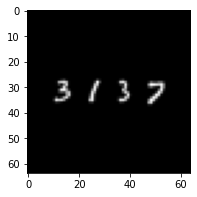

[3, 1, 3, 7, 10]


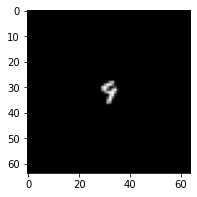

[8, 10, 10, 10, 10]


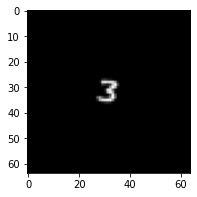

[3, 10, 10, 10, 10]


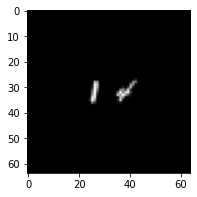

[1, 4, 10, 10, 10]


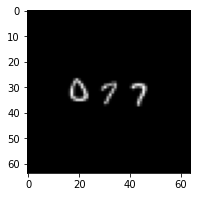

[0, 7, 9, 10, 10]


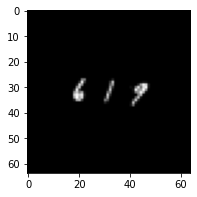

[6, 1, 8, 10, 10]


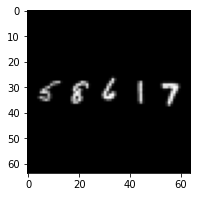

[5, 8, 9, 1, 7]


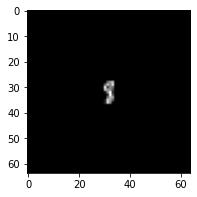

[8, 10, 10, 10, 10]


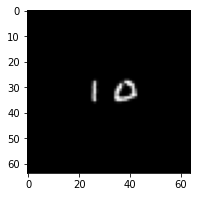

[1, 0, 10, 10, 10]


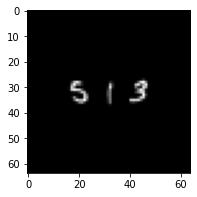

[5, 1, 5, 10, 10]


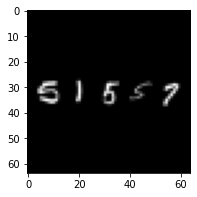

[3, 1, 5, 5, 7]


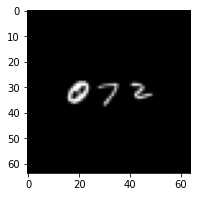

[8, 7, 7, 10, 10]


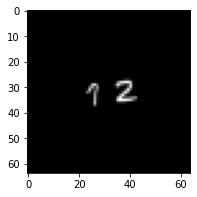

[8, 2, 10, 10, 10]


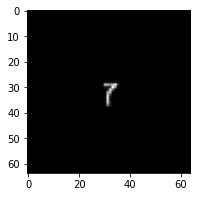

[6, 10, 10, 10, 10]


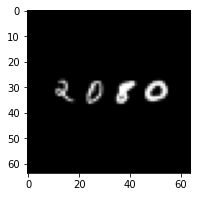

[2, 0, 8, 0, 10]


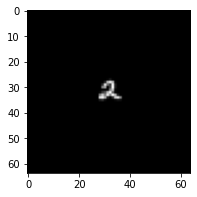

[2, 10, 10, 10, 10]


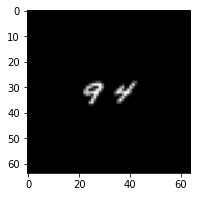

[8, 4, 10, 10, 10]


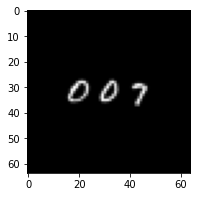

[2, 0, 7, 10, 10]


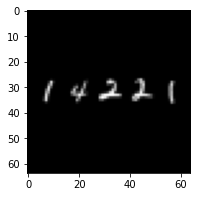

[0, 4, 2, 2, 1]


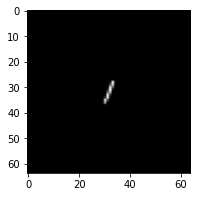

[1, 10, 10, 10, 10]


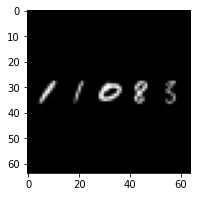

[8, 1, 9, 8, 3]


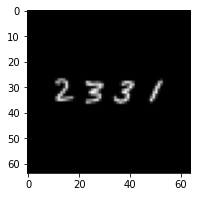

[2, 3, 3, 1, 10]


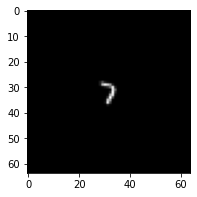

[7, 10, 10, 10, 10]


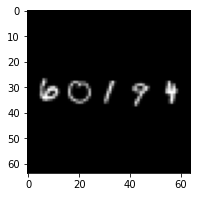

[0, 3, 6, 8, 8]


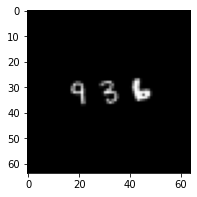

[9, 3, 6, 10, 10]


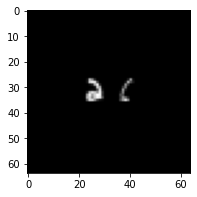

[2, 1, 10, 10, 10]


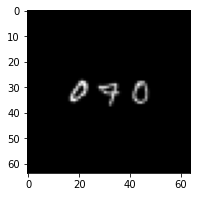

[9, 7, 0, 10, 10]


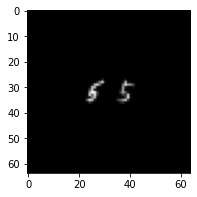

[8, 3, 10, 10, 10]


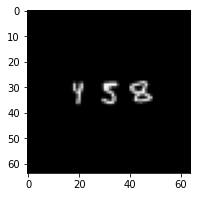

[8, 5, 8, 10, 10]


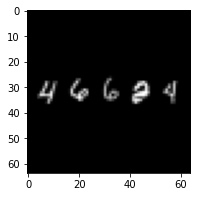

[4, 6, 6, 8, 4]


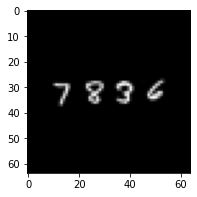

[7, 8, 3, 6, 10]


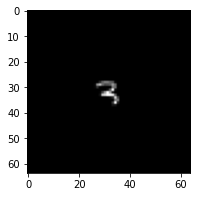

[3, 10, 10, 10, 10]


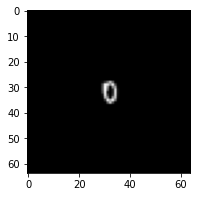

[0, 10, 10, 10, 10]


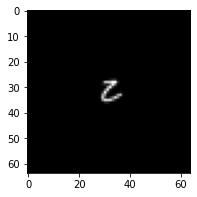

[2, 10, 10, 10, 10]


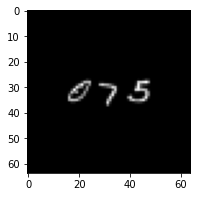

[8, 7, 5, 10, 10]


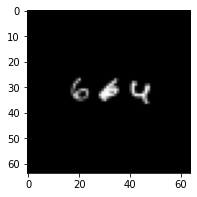

[6, 8, 4, 10, 10]


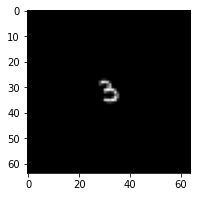

[3, 10, 10, 10, 10]


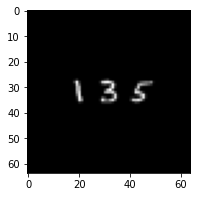

[8, 3, 5, 10, 10]


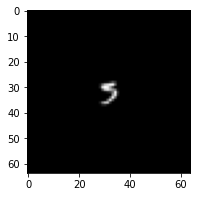

[3, 10, 10, 10, 10]


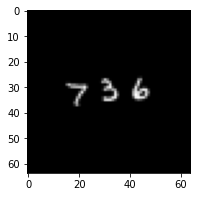

[7, 2, 6, 10, 10]


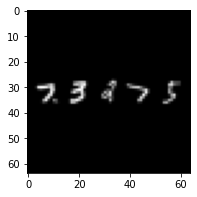

[2, 3, 8, 7, 3]


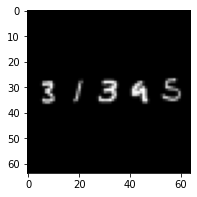

[5, 1, 3, 9, 5]


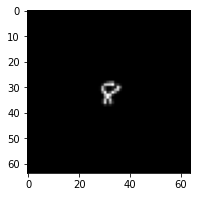

[8, 10, 10, 10, 10]


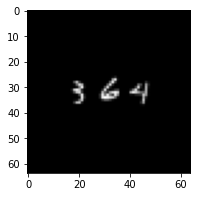

[3, 6, 4, 10, 10]


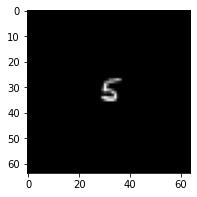

[5, 10, 10, 10, 10]


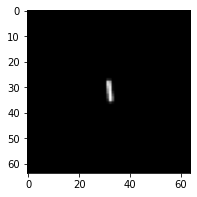

[1, 10, 10, 10, 10]


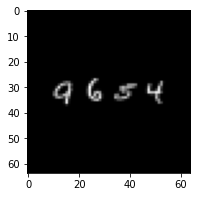

[9, 6, 5, 4, 10]


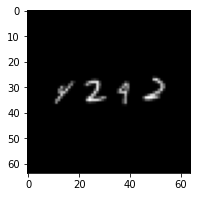

[8, 2, 4, 6, 10]


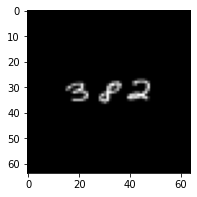

[3, 8, 2, 10, 10]


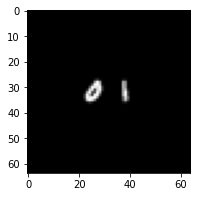

[8, 1, 10, 10, 10]


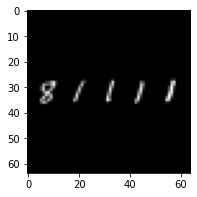

[8, 8, 1, 1, 7]


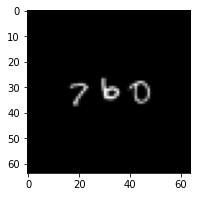

[7, 7, 8, 10, 10]


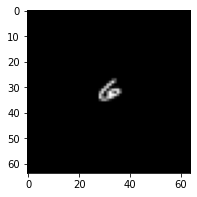

[6, 10, 10, 10, 10]


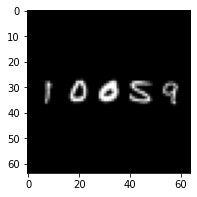

[0, 0, 0, 5, 9]


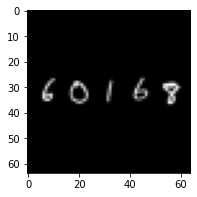

[6, 0, 1, 6, 8]


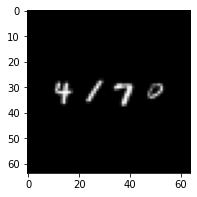

[8, 1, 7, 9, 10]


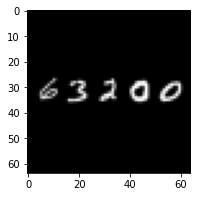

[6, 3, 2, 0, 6]


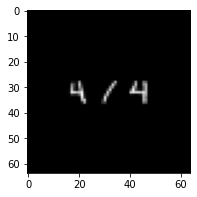

[8, 8, 8, 10, 10]


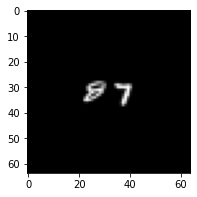

[8, 7, 10, 10, 10]


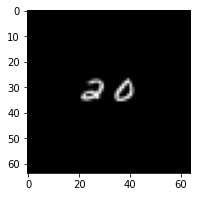

[2, 0, 10, 10, 10]


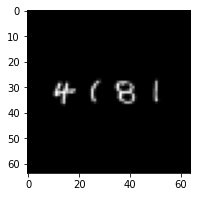

[8, 6, 8, 1, 10]


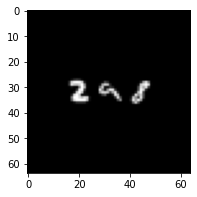

[2, 9, 8, 10, 10]


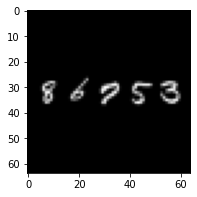

[8, 6, 7, 5, 3]


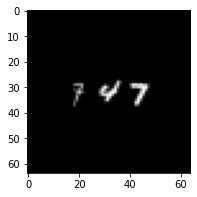

[8, 4, 7, 10, 10]


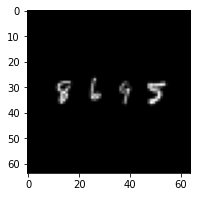

[8, 6, 9, 5, 10]


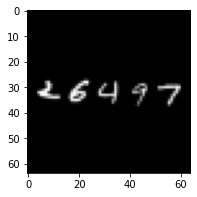

[4, 6, 4, 9, 7]


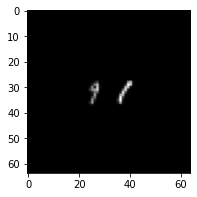

[8, 1, 10, 10, 10]


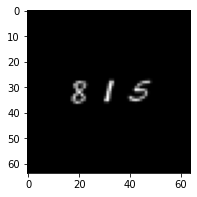

[8, 1, 3, 10, 10]


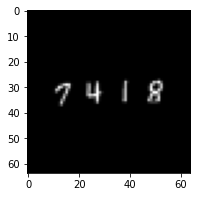

[7, 4, 1, 8, 10]


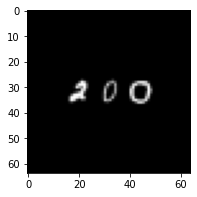

[2, 0, 0, 10, 10]


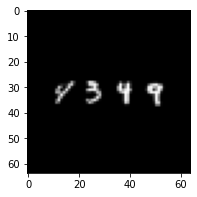

[8, 3, 8, 9, 10]


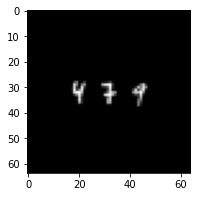

[8, 7, 9, 10, 10]


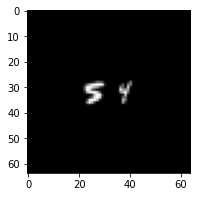

[8, 8, 10, 10, 10]


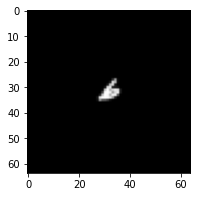

[6, 10, 10, 10, 10]


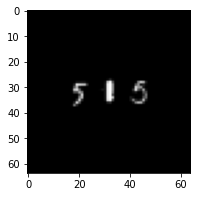

[8, 8, 8, 10, 10]


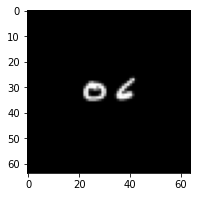

[0, 6, 10, 10, 10]


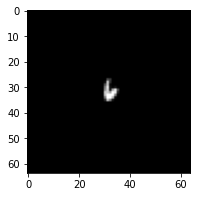

[6, 10, 10, 10, 10]


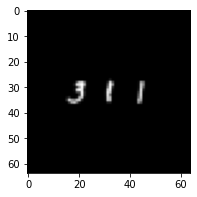

[1, 6, 4, 10, 10]


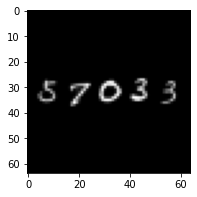

[3, 8, 0, 3, 3]


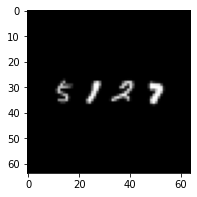

[5, 8, 3, 8, 10]


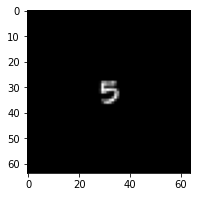

[5, 10, 10, 10, 10]


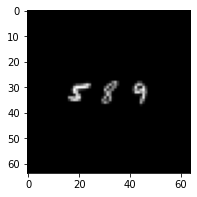

[5, 8, 9, 10, 10]


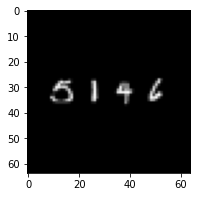

[5, 1, 4, 6, 10]


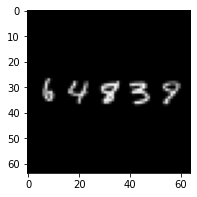

[6, 8, 8, 3, 8]


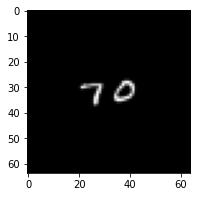

[7, 6, 10, 10, 10]


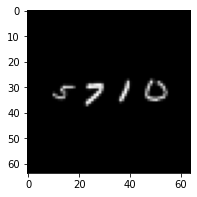

[5, 7, 1, 6, 10]


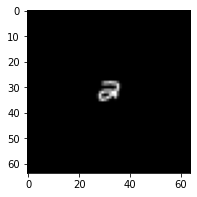

[2, 10, 10, 10, 10]


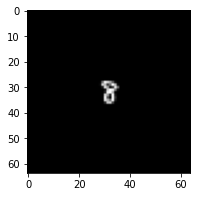

[8, 10, 10, 10, 10]


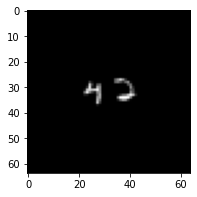

[4, 2, 10, 10, 10]


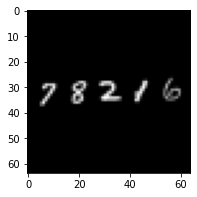

[8, 8, 2, 8, 6]


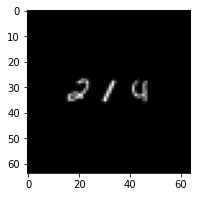

[2, 8, 4, 10, 10]


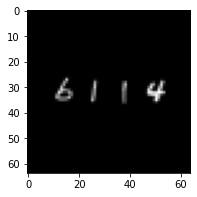

[5, 1, 1, 4, 10]


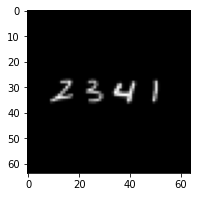

[2, 3, 4, 1, 10]


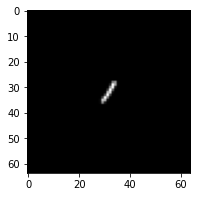

[1, 10, 10, 10, 10]


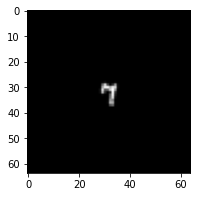

[7, 10, 10, 10, 10]


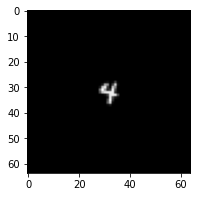

[4, 10, 10, 10, 10]


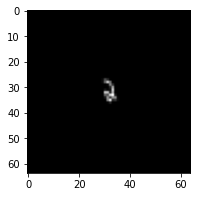

[2, 10, 10, 10, 10]


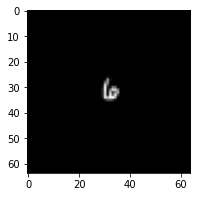

[6, 10, 10, 10, 10]


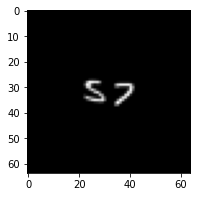

[3, 7, 10, 10, 10]


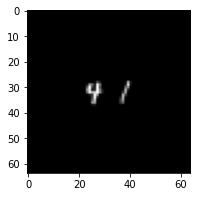

[8, 1, 10, 10, 10]


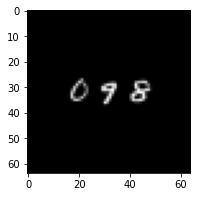

[0, 9, 8, 10, 10]


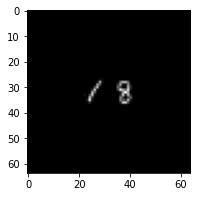

[4, 8, 10, 10, 10]


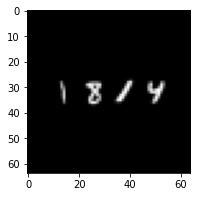

[8, 8, 1, 8, 10]


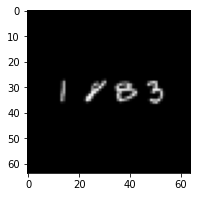

[1, 8, 7, 3, 10]


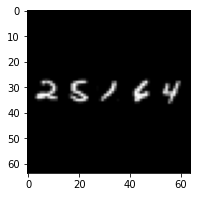

[2, 5, 1, 6, 4]


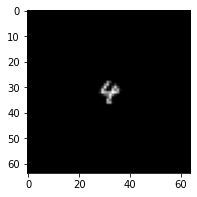

[8, 10, 10, 10, 10]


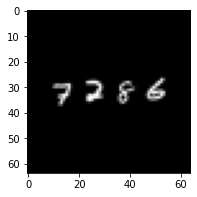

[7, 2, 8, 6, 10]


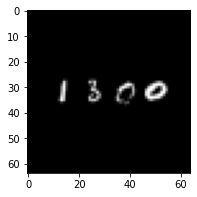

[0, 3, 0, 0, 10]


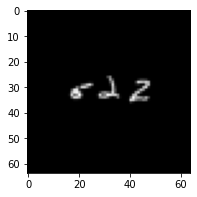

[0, 2, 8, 10, 10]


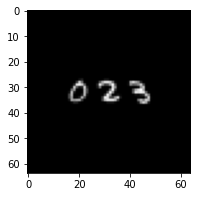

[0, 2, 3, 10, 10]


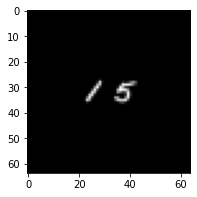

[8, 5, 10, 10, 10]


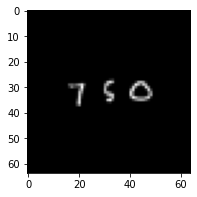

[1, 8, 5, 10, 10]


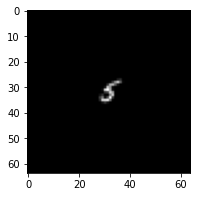

[5, 10, 10, 10, 10]


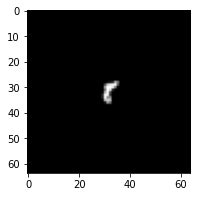

[8, 10, 10, 10, 10]


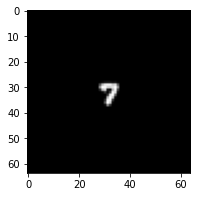

[3, 10, 10, 10, 10]


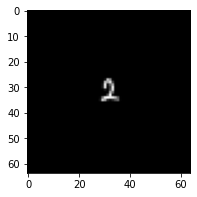

[2, 10, 10, 10, 10]


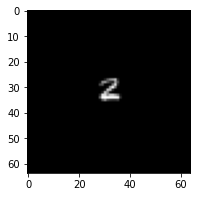

[2, 10, 10, 10, 10]


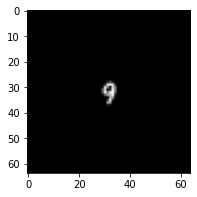

[8, 10, 10, 10, 10]


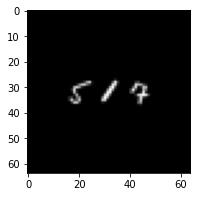

[5, 8, 7, 10, 10]


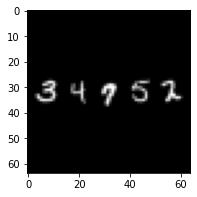

[3, 4, 8, 3, 3]


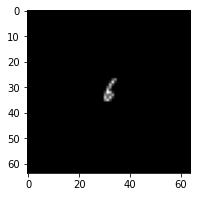

[6, 10, 10, 10, 10]


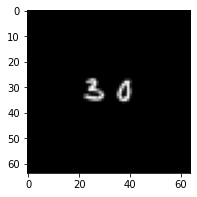

[3, 0, 10, 10, 10]


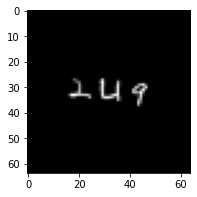

[4, 4, 9, 10, 10]


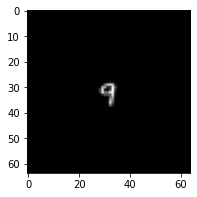

[9, 10, 10, 10, 10]


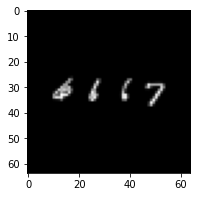

[8, 6, 6, 7, 10]


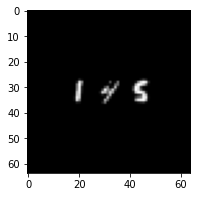

[0, 4, 8, 10, 10]


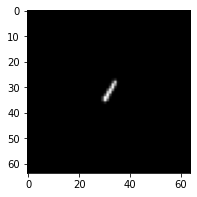

[1, 10, 10, 10, 10]


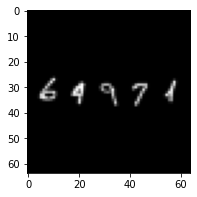

[4, 4, 8, 7, 4]


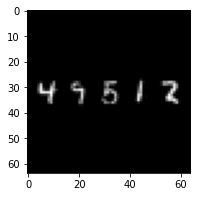

[4, 7, 5, 1, 2]


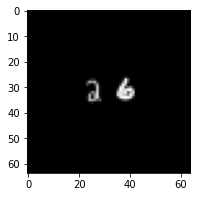

[2, 6, 10, 10, 10]


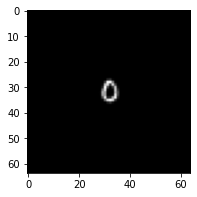

[0, 10, 10, 10, 10]


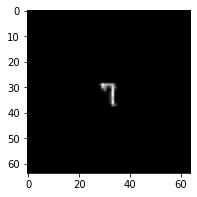

[2, 10, 10, 10, 10]


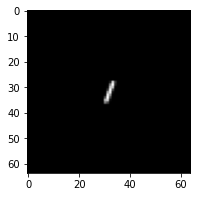

[1, 10, 10, 10, 10]


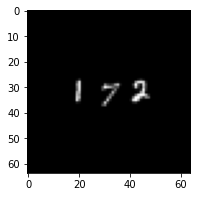

[6, 7, 2, 10, 10]


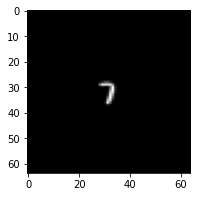

[7, 10, 10, 10, 10]


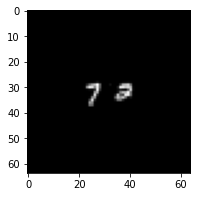

[8, 8, 10, 10, 10]


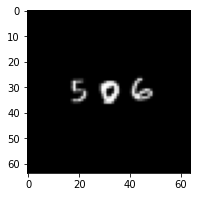

[5, 0, 6, 10, 10]


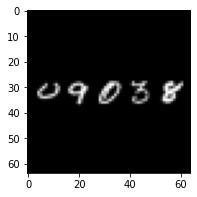

[2, 8, 8, 3, 8]


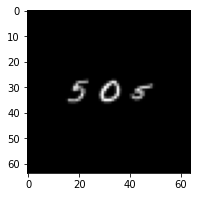

[5, 0, 5, 10, 10]


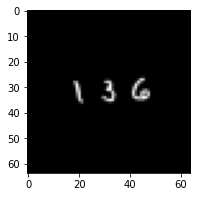

[8, 3, 6, 10, 10]


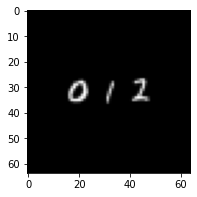

[2, 1, 2, 10, 10]


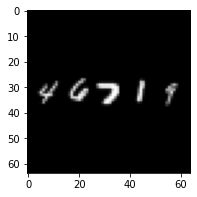

[8, 6, 7, 1, 1]


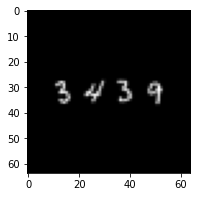

[3, 4, 3, 9, 10]


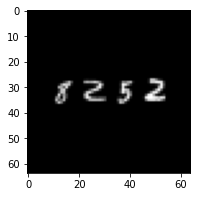

[8, 3, 5, 2, 10]


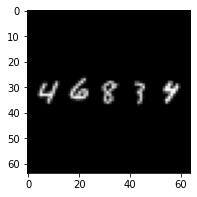

[4, 6, 8, 3, 3]


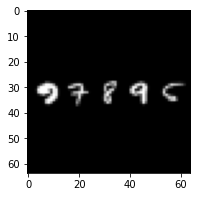

[8, 8, 8, 8, 8]


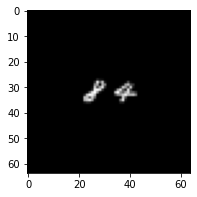

[8, 4, 10, 10, 10]


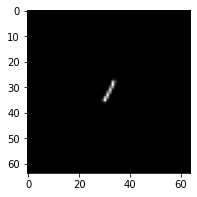

[1, 10, 10, 10, 10]


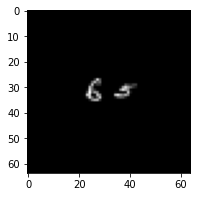

[6, 3, 10, 10, 10]


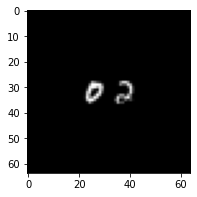

[9, 2, 10, 10, 10]


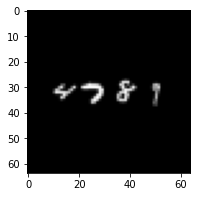

[8, 7, 8, 3, 10]


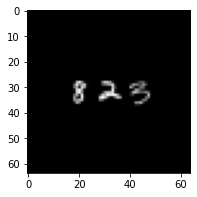

[8, 2, 8, 10, 10]


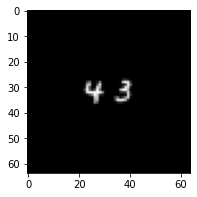

[4, 3, 10, 10, 10]


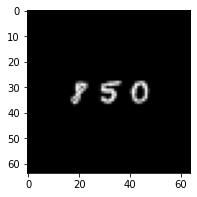

[8, 5, 0, 10, 10]


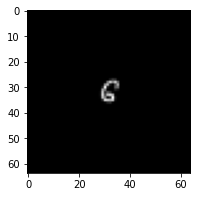

[8, 10, 10, 10, 10]


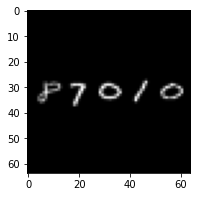

[8, 7, 9, 1, 5]


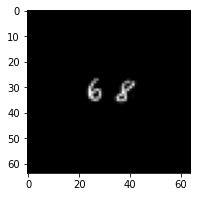

[6, 8, 10, 10, 10]


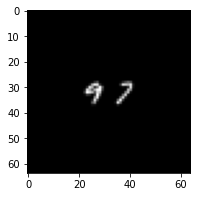

[8, 8, 10, 10, 10]


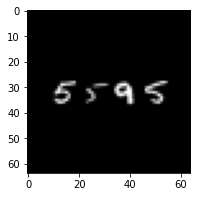

[5, 8, 8, 5, 10]


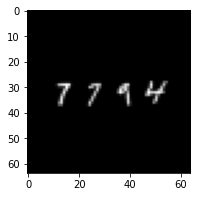

[7, 7, 9, 8, 10]


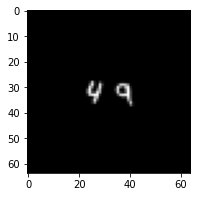

[8, 9, 10, 10, 10]


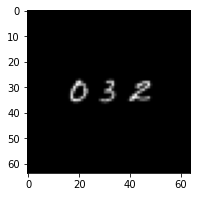

[0, 3, 8, 10, 10]


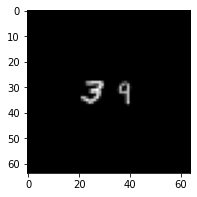

[3, 9, 10, 10, 10]


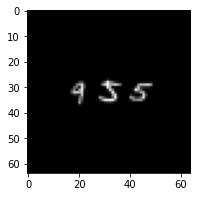

[9, 5, 5, 10, 10]


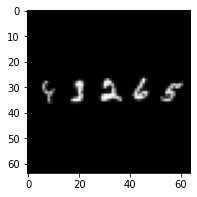

[8, 3, 2, 6, 5]


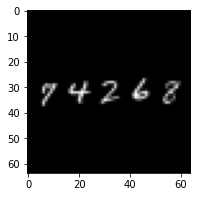

[8, 4, 2, 6, 8]


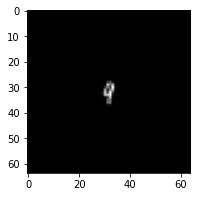

[8, 10, 10, 10, 10]


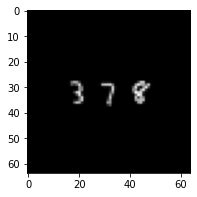

[3, 7, 8, 10, 10]


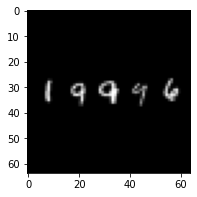

[6, 9, 8, 7, 4]


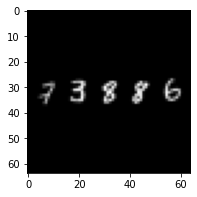

[7, 3, 8, 8, 8]


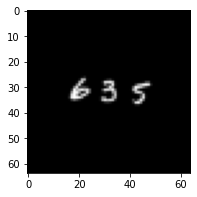

[6, 3, 5, 10, 10]


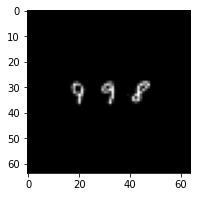

[7, 9, 8, 10, 10]


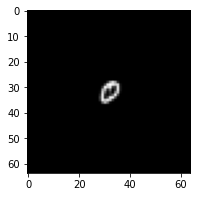

[8, 10, 10, 10, 10]


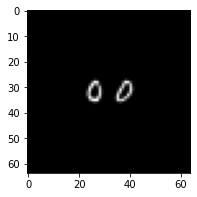

[0, 0, 10, 10, 10]


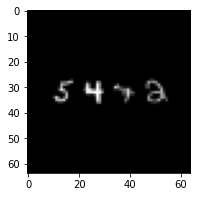

[5, 4, 7, 2, 10]


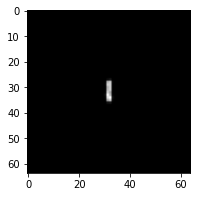

[1, 10, 10, 10, 10]


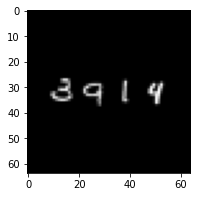

[3, 7, 1, 8, 10]


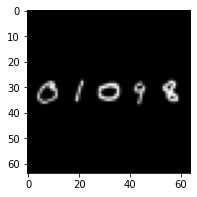

[3, 1, 0, 9, 8]


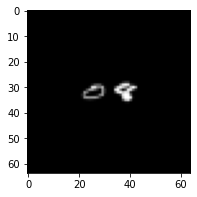

[0, 8, 10, 10, 10]


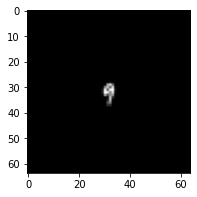

[8, 10, 10, 10, 10]


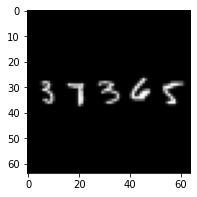

[1, 7, 3, 9, 5]


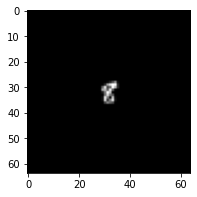

[8, 10, 10, 10, 10]


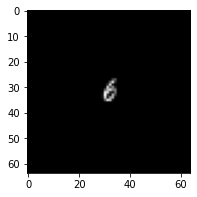

[6, 10, 10, 10, 10]


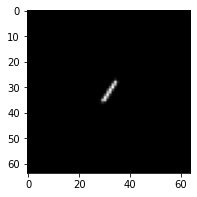

[1, 10, 10, 10, 10]


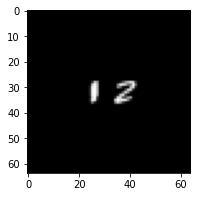

[8, 8, 10, 10, 10]


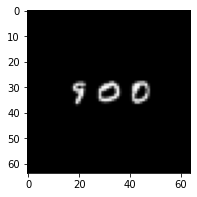

[8, 9, 0, 10, 10]


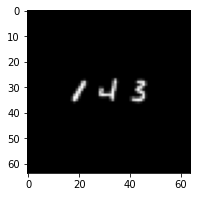

[8, 4, 3, 10, 10]


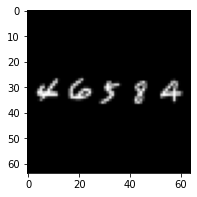

[4, 6, 8, 8, 4]


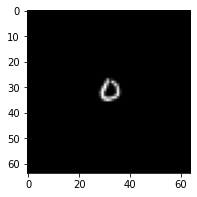

[0, 10, 10, 10, 10]


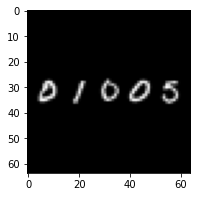

[0, 1, 0, 0, 5]


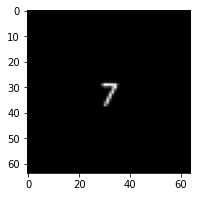

[1, 10, 10, 10, 10]


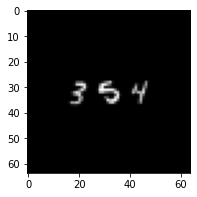

[3, 7, 4, 10, 10]


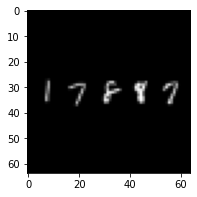

[6, 7, 8, 8, 7]


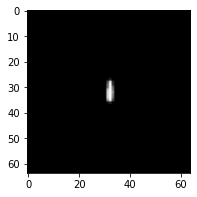

[1, 10, 10, 10, 10]


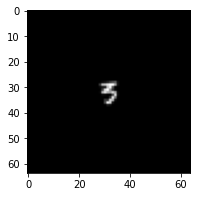

[3, 10, 10, 10, 10]


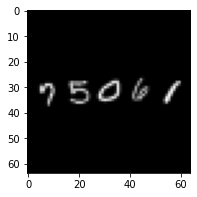

[7, 5, 2, 8, 1]


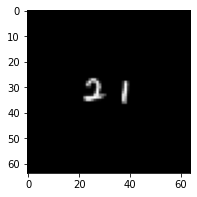

[2, 1, 10, 10, 10]


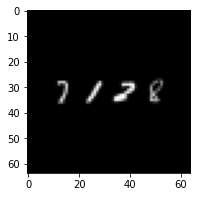

[7, 7, 8, 8, 10]


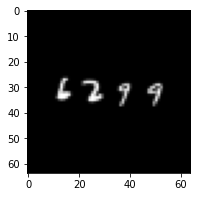

[2, 2, 8, 9, 10]


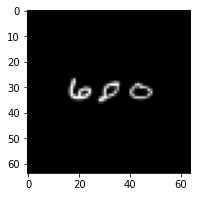

[6, 8, 0, 10, 10]


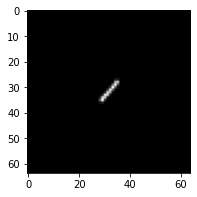

[1, 10, 10, 10, 10]


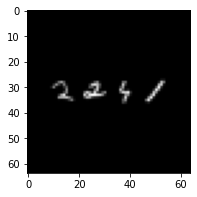

[2, 4, 9, 1, 10]


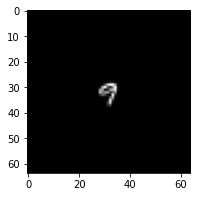

[8, 10, 10, 10, 10]


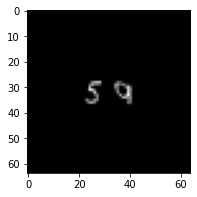

[5, 2, 10, 10, 10]


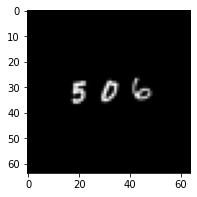

[5, 0, 6, 10, 10]


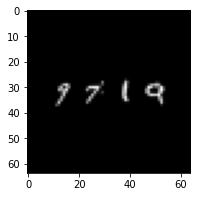

[8, 8, 1, 9, 10]


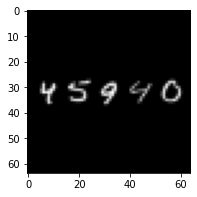

[8, 5, 9, 7, 0]


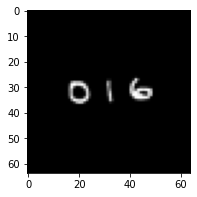

[3, 8, 6, 10, 10]


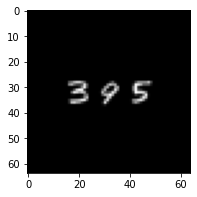

[3, 8, 5, 10, 10]


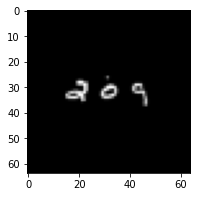

[2, 0, 9, 10, 10]


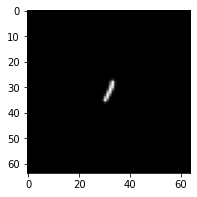

[1, 10, 10, 10, 10]


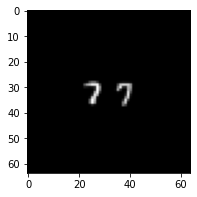

[2, 7, 10, 10, 10]


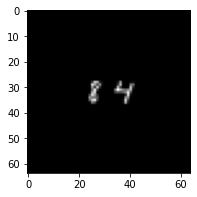

[8, 7, 10, 10, 10]


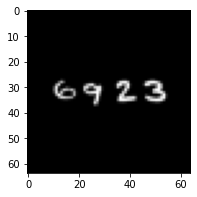

[7, 9, 2, 3, 10]


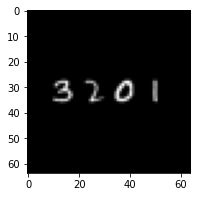

[3, 2, 0, 4, 10]


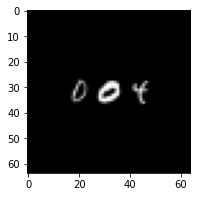

[0, 0, 4, 10, 10]


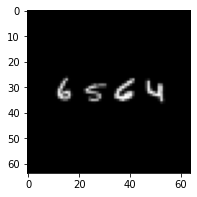

[6, 5, 6, 4, 10]


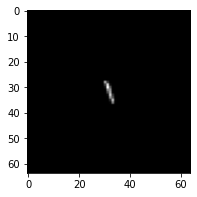

[1, 10, 10, 10, 10]


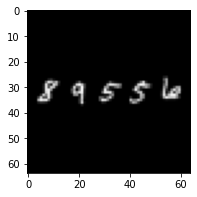

[8, 9, 5, 5, 6]


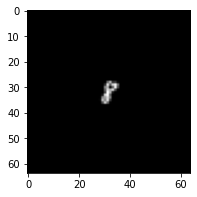

[8, 10, 10, 10, 10]


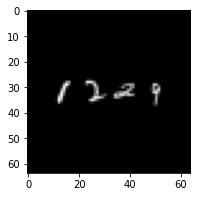

[0, 2, 4, 8, 10]


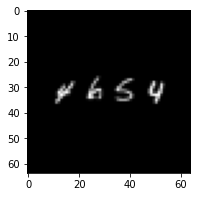

[4, 6, 5, 4, 10]


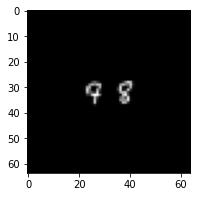

[7, 8, 10, 10, 10]


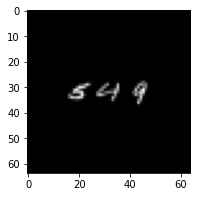

[9, 8, 9, 10, 10]


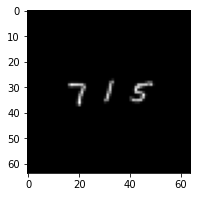

[7, 1, 5, 10, 10]


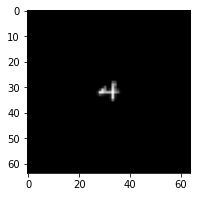

[4, 10, 10, 10, 10]


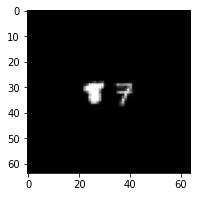

[8, 8, 10, 10, 10]


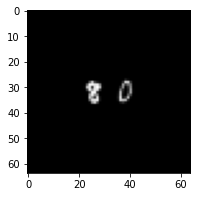

[8, 6, 10, 10, 10]


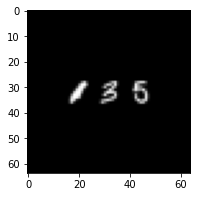

[8, 3, 6, 10, 10]


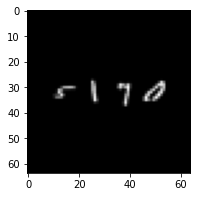

[7, 1, 7, 8, 10]


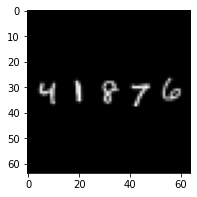

[4, 1, 8, 7, 6]


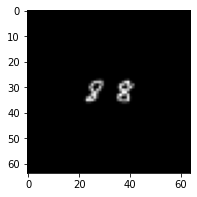

[8, 8, 10, 10, 10]


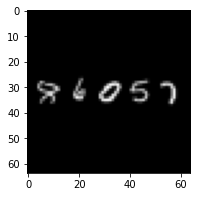

[8, 6, 0, 5, 9]


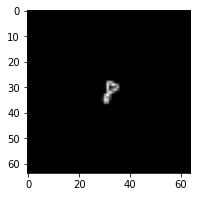

[8, 10, 10, 10, 10]


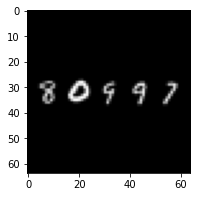

[8, 0, 9, 9, 7]


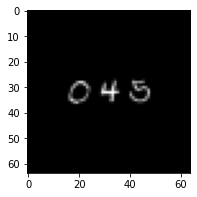

[2, 4, 8, 10, 10]


KeyboardInterrupt: 

In [18]:
for i, sample in enumerate(test_dataset):
    displayGreyWindows(sample, "")
    print(results[i])